<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## Contents

#### 1. [Load and Explore the Data](#part1)
#### 2. [Data Wrangling on multiple tables](#part2)
#### 3. [Data Cleansing and Transformation](#part3)
#### 4. [Machine Learning Modelling](#part4)
#### [Report](#part5)

In [1]:
# import the packages
import pandas as pd
import numpy as np

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
#from dateutil.relativedelta import *

# sklearn Train test split
from sklearn.model_selection import train_test_split

# feature engine
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.outliers import Winsorizer,ArbitraryOutlierCapper
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.encoding import CountFrequencyEncoder
# with open-source packages
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import LogTransformer

# to impute missing data with sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.imputation import MeanMedianImputer
# to impute missing data with feature-engine
from feature_engine.imputation import ArbitraryNumberImputer

# Import scaler 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
#PCA
from sklearn.decomposition import PCA


# Step 1: Problem Formulation <a id="part1"></a>

### Problem Statement: Predicting whether a Formula 1 driver will finish in the top 5 positions in a race based on their performance in previous races and team standings?

In [2]:
# Load Data
missing_values = ["\\N"," "] #to identify missing values
drivers = pd.read_csv('drivers_mod.csv', na_values = missing_values)
driver_standings = pd.read_csv('driver_standings_mod.csv', na_values = missing_values)
races = pd.read_csv('races_mod.csv', na_values = missing_values)
results = pd.read_csv('results_mod.csv', na_values = missing_values)
constructor_standings = pd.read_csv('constructor_standings_mod.csv', na_values = missing_values)
constructors = pd.read_csv('constructors_mod.csv', na_values = missing_values)

## EDA 

Variable Study:
- .info
- missing value 
- nulls
- categories 
- relationship 
- interesting columns


### Exploring dataset

In [3]:
print("drivers.info\n")
drivers.info()
print("\nresults.info\n")
results.info()
print("\nraces.info\n")
races.info()
print("\ndrivers_standings.info\n")
driver_standings.info()
print("\nconstructor_standings.info\n")
constructor_standings.info()
print("\nconstructors.info\n")
constructors.info()


drivers.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   driverId     854 non-null    int64  
 1   driverRef    854 non-null    object 
 2   number       50 non-null     float64
 3   code         97 non-null     object 
 4   forename     854 non-null    object 
 5   surname      854 non-null    object 
 6   dob          854 non-null    object 
 7   nationality  854 non-null    object 
 8   url          854 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 60.2+ KB

results.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3 

In [4]:
#Exploring drivers.csv

drivers.head()

driverId   driverRef  number code  forename     surname         dob  \
0         1    hamilton    44.0  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     NaN  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg     6.0  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso    14.0  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     NaN  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen

In [5]:
# Check for null values
drivers.isnull().any()

driverId       False
driverRef      False
number          True
code            True
forename       False
surname        False
dob            False
nationality    False
url            False
dtype: bool

In [6]:
drivers['nationality'].unique()

array(['British', 'German', 'Spanish', 'Finnish', 'Japanese', 'French',
       'Polish', 'Brazilian', 'Italian', 'Australian', 'Austrian',
       'American', 'Dutch', 'Colombian', 'Portuguese', 'Canadian',
       'Indian', 'Hungarian', 'Irish', 'Danish', 'Argentine', 'Czech',
       'Malaysian', 'Swiss', 'Belgian', 'Monegasque', 'Swedish',
       'Venezuelan', 'New Zealander', 'Chilean', 'Mexican',
       'South African', 'Liechtensteiner', 'Rhodesian',
       'American-Italian', 'Uruguayan', 'Argentine-Italian', 'Thai',
       'East German', 'Russian', 'Indonesian', 'Chinese'], dtype=object)

In [7]:
#Exploring results.csv

results.head()

resultId  raceId  driverId  constructorId  number  grid  position  \
0         1      18         1              1    22.0     1       1.0   
1         2      18         2              2     3.0     5       2.0   
2         3      18         3              3     7.0     7       3.0   
3         4      18         4              4     5.0    11       4.0   
4         5      18         5              1    23.0     3       5.0   

  positionText  positionOrder  points  laps     time  milliseconds  \
0            1              1    10.0    58  34:50.6     5690616.0   
1            2              2     8.0    58    5.478     5696094.0   
2            3              3     6.0    58    8.163     5698779.0   
3            4              4     5.0    58   17.181     5707797.0   
4            5              5     4.0    58   18.014     5708630.0   

   fastestLap  rank fastestLapTime  fastestLapSpeed  statusId  
0        39.0   2.0        01:27.5          218.300         1  
1        41.0   3.0        01:27.7          217.586         1  
2        41.0   5.0        01:28.1          216.719         1  
3        58.0   7.0        01:28.6          215.464         1  
4        43.0   1.0        01:27.4          218.385         1

In [8]:
# Check for null values
results.isnull().any()

resultId           False
raceId             False
driverId           False
constructorId      False
number              True
grid               False
position            True
positionText       False
positionOrder      False
points             False
laps               False
time                True
milliseconds        True
fastestLap          True
rank                True
fastestLapTime      True
fastestLapSpeed     True
statusId           False
dtype: bool

In [9]:
results['position'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., nan,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 99., 20., 21., 22., 23., 24.,
       25., 26., 27., 28., 29., 30., 31., 32., 33.])

In [10]:
results['positionOrder'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 99, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int64)

What was noticed from results.csv: All position related data has a position 99 that needs to be handled

In [11]:
#Exploring races.csv

races.head()
#can see that date has problem

raceId  round  circuitId                   name       date      time  \
0       1      1          1  Australian Grand Prix  3/29/2009   6:00:00   
1       2      2          2   Malaysian Grand Prix  4/5/12009   9:00:00   
2       3      3         17     Chinese Grand Prix  4/19/2009   7:00:00   
3       4      4          3     Bahrain Grand Prix  4/26/2009  12:00:00   
4       5      5          4     Spanish Grand Prix  5/10/2009  12:00:00   

                                                 url  
0  http://en.wikipedia.org/wiki/2009_Australian_G...  
1  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4  http://en.wikipedia.org/wiki/2009_Spanish_Gran...

In [12]:
# Check for null values
races.isnull().any()

raceId       False
round        False
circuitId    False
name         False
date          True
time          True
url          False
dtype: bool

In [13]:
# Extract unique years from the 'date' column in the 'races' dataset
# exploring years data

unique_years = races['date'].str[-5:].dropna().unique()
years = [int(year.replace('/', '')) for year in unique_years]

# Sort the list of years in ascending order
years.sort()

# Display the sorted list of years
print(years)


[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 12005, 12009, 12011, 12015, 12017, 12018, 12020, 12021]


In [14]:
#Exploring driver_standings.csv

driver_standings.head()

driverStandingsId  raceId  driverId points  position positionText  wins
0                  1      18         1     10         1            1     1
1                  2      18         2      8         2            2     0
2                  3      18         3      6         3            3     0
3                  4      18         4      5         4            4     0
4                  5      18         5      4         5            5     0

In [15]:
# Check for null values
driver_standings.isnull().any()

driverStandingsId    False
raceId               False
driverId             False
points                True
position             False
positionText         False
wins                 False
dtype: bool

In [16]:
driver_standings['positionText'].unique()

#noticed theres a '-' 

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '27', '26', 'D', '28', '29', '30', '31', '33', '32',
       '34', '36', '35', '38', '39', '37', '45', '41', '46', '42', '40',
       '43', '44', '47', '49', '48', '51', '50', '52', '53', '55', '54',
       '57', '56', '58', '59', '61', '60', '62', '66', '65', '63', '64',
       '69', '68', '67', '73', '72', '71', '70', '75', '74', '77', '76',
       '78', '83', '81', '80', '88', '87', '84', '82', '86', '85', '79',
       '91', '90', '89', '92', '93', '94', '95', '96', '97', '98', '103',
       '102', '101', '99', '100', '104', '108', '107', '105', '106', '-'],
      dtype=object)

In [17]:
driver_standings['points'].unique()

#noticed there are nan and 'O' (text) data

array(['10', '8', '6', '5', '4', '3', '2', '1', '14', '11', '0', '16',
       '7', '19', '20', '29', '9', '18', '28', '35', '24', '38', '15',
       '32', '34', '42', '12', '43', '46', '48', '36', '13', '58', '41',
       '51', '54', '62', '57', '49', '22', '70', '55', '26', '64', '76',
       '23', '74', '78', '53', '77', '84', '56', '17', '27', '63', '72',
       '30', '21', '79', '87', '75', '69', '60', '94', '98', '61', '31',
       '97', '25', '33', '40', '39', '47', '50', '59', '73', '52', '89',
       '95', '80', '86', '103', '110', '109', '44', '37', '88', '96',
       '100', '90', '108', '106', '45', '116', '126', '65', '121', '134',
       '71', '111', '117', '123', '104', '133', '112', '68', '82', '120',
       '128', '136', '85', '146', '114', '148', '92', '83', '93', '91',
       '122', '144', '107', '113', '67', '66', '81', '102', '99', '1.5',
       '3.5', '8.5', '26.5', '0.5', '9.5', '14.5', '4.5', '15.5', '19.5',
       '7.5', '27.5', '11.5', '35.5', '21.5', '20.5', '4

In [18]:
#Exploring constructor_standings.csv

constructor_standings.head()

constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   
4                       5      18              5     2.0         5   

  positionText  wins  
0            1     1  
1            3     0  
2            2     0  
3            4     0  
4            5     0

In [19]:
# Check for null values
constructor_standings.isnull().any()

constructorStandingsId    False
raceId                    False
constructorId             False
points                    False
position                  False
positionText              False
wins                      False
dtype: bool

In [20]:
#Exploring constructors.csv

constructors.head()

constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

In [21]:
# Check for null values
constructors.isnull().any()

constructorId     False
constructorRef    False
name              False
nationality       False
url               False
dtype: bool

### Exploring with Charts

In [22]:
# Additional EDA at a later part

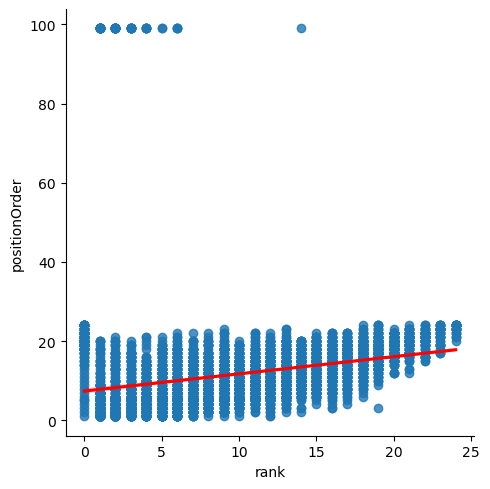

In [23]:
sns.lmplot(x='rank', y='positionOrder', data=results, line_kws={'color': 'red'})
plt.show()  # Display the plot

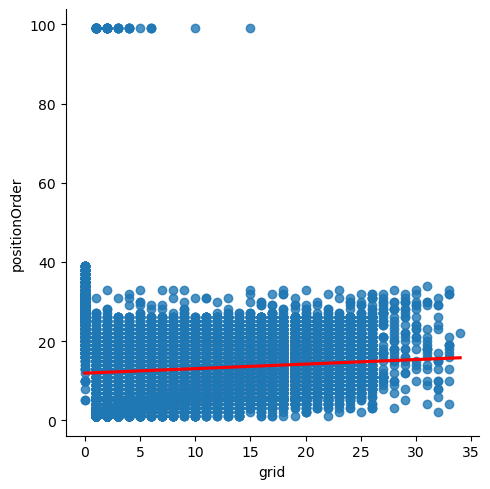

In [24]:
#Grid (starting position before the race) vs Position

sns.lmplot(x='grid', y='positionOrder', data=results, line_kws={'color': 'red'})
plt.show()  # Display the plot

#shows that the further the starting position (grid), the later the position

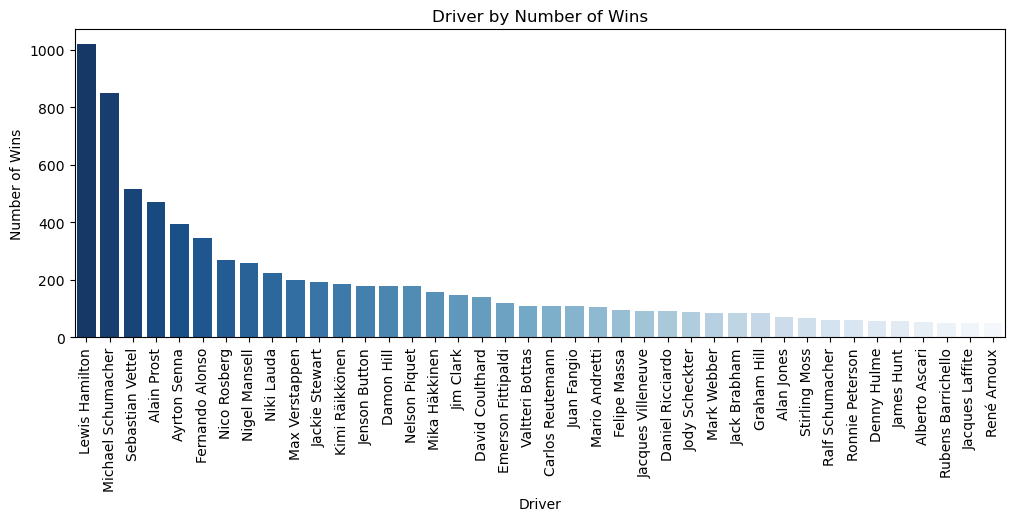

In [25]:
# Driver Winnings
drivers_and_standings = drivers.merge(right=driver_standings, on='driverId', how='left')
drivers_and_standings['driver_name'] = drivers_and_standings['forename'] + ' ' + drivers_and_standings['surname']
top_driver_wins = drivers_and_standings.groupby('driver_name').sum().sort_values('wins', ascending=False).head(40)

# Define a color palette with a gradient from dark blue to light blue
colors = sns.color_palette("Blues_r", n_colors=len(top_driver_wins))

plt.figure(figsize=(12, 4))
sns.barplot(x=top_driver_wins.index, y='wins', data=top_driver_wins, palette=colors)
plt.xticks(rotation=90)
plt.xlabel('Driver')
plt.ylabel('Number of Wins')
plt.title('Driver by Number of Wins')
plt.show()


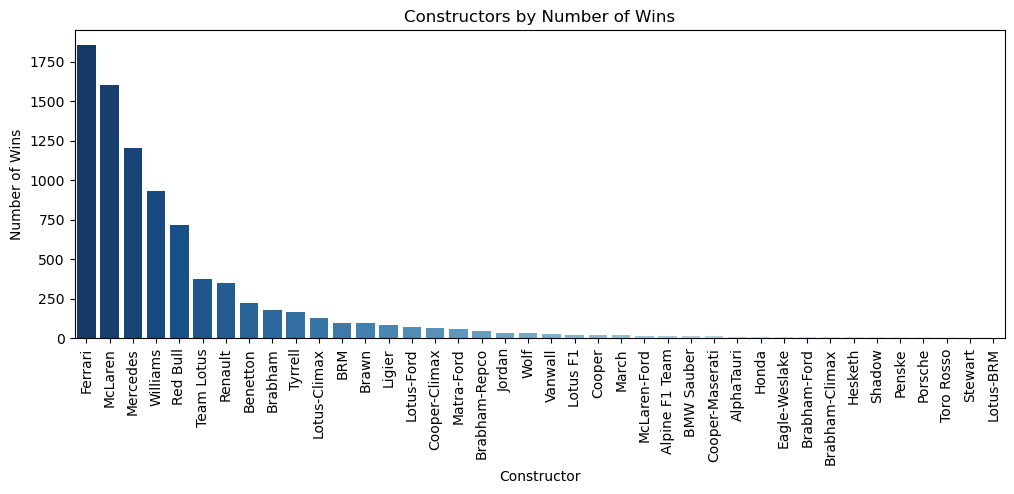

In [26]:
# Constructor wins
constructors_and_standings = constructors.merge(right=constructor_standings, on='constructorId', how='left')
top_constructor_wins = constructors_and_standings.groupby('name').sum().sort_values('wins', ascending=False).head(40)

# Define a color palette with a gradient from dark blue to light blue
colors = sns.color_palette("Blues_r", n_colors=len(top_constructor_wins))

plt.figure(figsize=(12, 4))
ax = sns.barplot(x=top_constructor_wins.index, y='wins', data=top_constructor_wins, palette=colors)
plt.xticks(rotation=90)
plt.xlabel('Constructor')
plt.ylabel('Number of Wins')
plt.title('Constructors by Number of Wins')

plt.show()


# Step 2: Data Wrangling on multiple tables <a id="part2"></a>

> Extract and Create features from different tables, Concatenate, Merge or Join the tables\- Rename Columns
- Merge Datasets
- Feature Engineering
- Position 99
- Fixing Time
- Create Target Column
- Drop unnecessary columns

In [27]:
#Fixing Invalid Years
#Observation: Comparing to the url, the invalid years just had an extra '1' infront of the year
invalidYears=[]
for i in races[races['date'].notnull()]['date'].unique():
    year=i[i.rfind('/')+1:]
    if(int(year)>2022 or int(year)<1950):
        invalidYears.append(year)
        
#Replace year in date to the correct year
for i in list(set(invalidYears)):
    races['date'].replace(i,i[1:], regex=True,inplace=True)
    
races['date']=pd.to_datetime(races['date'])


### Renaming Columns

In [28]:
#Need to rename columns that have the same name so that we won't get confused when the data is merged

races.rename({"time":"timeOfRace",'name':'raceName'},axis=1,inplace=True)

constructors.rename({"name":"constructor",'nationality':'constructorNationality'},inplace=True,axis=1)

constructor_standings.rename({"points":"constructorPoints","position":"constructorPos",
                              "positionText":"constructorPosText", "wins":"constructorWins"},inplace=True,axis=1)

driver_standings.rename({"points":"driverPoints",'position':'driverPos',
                        "positionText":"driverPosText","wins":"driverWins"},inplace=True,axis=1)

drivers.rename({'nationality':'driverNationality', "number":"driverNumber"},inplace=True,axis=1)

results.rename({"number":"resultNumber","position":"resultPos","positionText":"resultPosText","points":"resultsPoints",
                "time":"finishTime","milliseconds":"finishTime(msec)"},axis=1,inplace=True)

In [29]:
#Column for Driver's full name
drivers['driverName']=drivers['forename']+" "+drivers['surname']

### Merging Tables

Tables to Merge:
- races
- drivers
- driver_standings
- results
- constructors
- constructor_standings


In [30]:
# Merge datasets step by step
data = results.merge(drivers[['driverId', 'dob', 'driverName', 'driverNationality']], on='driverId', how='inner')  
data = data.merge(driver_standings[['driverStandingsId', 'raceId','driverId',
                                                 'driverPoints','driverPos','driverWins']], on=['raceId', 'driverId'], how='inner')
data = data.merge(constructors[['constructorId','constructor','constructorNationality']], on='constructorId', how='inner')
data = data.merge(constructor_standings[['constructorStandingsId','raceId','constructorId',
                                                      'constructorPoints','constructorPos','constructorWins']], on=['raceId', 'constructorId'], how='inner')
data = data.merge(races[['raceId','round','raceName','date']], on='raceId', how='inner')


# Display the merged dataset
data


resultId  raceId  driverId  constructorId  resultNumber  grid  \
0             1      18         1              1          22.0     1   
1             5      18         5              1          23.0     3   
2             2      18         2              2           3.0     5   
3             3      18         3              3           7.0     7   
4             6      18         6              3           8.0    13   
...         ...     ...       ...            ...           ...   ...   
23241     18056     745       434            170           3.0    17   
23242     18058     745       456            170          19.0    12   
23243     18054     745       468            170           6.0    16   
23244     18052     745       347             95          11.0    10   
23245     18048     745       364             95          12.0     7   

       resultPos resultPosText  positionOrder  resultsPoints  ...  driverWins  \
0            1.0             1              1           10.0  ...           1   
1            5.0             5              5            4.0  ...           0   
2            2.0             2              2            8.0  ...           0   
3            3.0             3              3            6.0  ...           0   
4            6.0             6              6            3.0  ...           0   
...          ...           ...            ...            ...  ...         ...   
23241       10.0            10             10            0.0  ...           0   
23242        NaN             R             12            0.0  ...           0   
23243        8.0             8              8            0.0  ...           0   
23244        6.0             6              6            1.0  ...           0   
23245        2.0             2              2            6.0  ...           0   

         constructor  constructorNationality  constructorStandingsId  \
0            McLaren                 British                       1   
1            McLaren                 British                       1   
2         BMW Sauber                  German                       2   
3           Williams                 British                       3   
4           Williams                 British                       3   
...              ...                     ...                     ...   
23241  Cooper-Climax                 British                   19388   
23242  Cooper-Climax                 British                   19388   
23243  Cooper-Climax                 British                   19388   
23244        Porsche                  German                   19387   
23245        Porsche                  German                   19387   

       constructorPoints constructorPos  constructorWins  round  \
0                   14.0              1                1      1   
1                   14.0              1                1      1   
2                    8.0              3                0      1   
3                    9.0              2                0      1   
4                    9.0              2                0      1   
...                  ...            ...              ...    ...   
23241               14.0              4                0      8   
23242               14.0              4                0      8   
23243               14.0              4                0      8   
23244               22.0              3                0      8   
23245               22.0              3                0      8   

                       raceName       date  
0         Australian Grand Prix 2008-03-16  
1         Australian Grand Prix 2008-03-16  
2         Australian Grand Prix 2008-03-16  
3         Australian Grand Prix 2008-03-16  
4         Australian Grand Prix 2008-03-16  
...                         ...        ...  
23241  United States Grand Prix 1961-10-08  
23242  United States Grand Prix 1961-10-08  
23243  United States Grand Prix 1961-10-08  
23244  United States Grand Prix 1961-10-08  
2324

### Feature Engineering: Creating Age Column

In [31]:
#Getting age by Week 12's Elapsed time btw 2 variables
data['date'] = pd.to_datetime(data['date'], format='%Y')
data['dob'] = pd.to_datetime(data['dob'])
data['driverAge']=np.floor((data['date']-data['dob'])/np.timedelta64(1, 'Y')) 

In [32]:
data

resultId  raceId  driverId  constructorId  resultNumber  grid  \
0             1      18         1              1          22.0     1   
1             5      18         5              1          23.0     3   
2             2      18         2              2           3.0     5   
3             3      18         3              3           7.0     7   
4             6      18         6              3           8.0    13   
...         ...     ...       ...            ...           ...   ...   
23241     18056     745       434            170           3.0    17   
23242     18058     745       456            170          19.0    12   
23243     18054     745       468            170           6.0    16   
23244     18052     745       347             95          11.0    10   
23245     18048     745       364             95          12.0     7   

       resultPos resultPosText  positionOrder  resultsPoints  ...  \
0            1.0             1              1           10.0  ...   
1            5.0             5              5            4.0  ...   
2            2.0             2              2            8.0  ...   
3            3.0             3              3            6.0  ...   
4            6.0             6              6            3.0  ...   
...          ...           ...            ...            ...  ...   
23241       10.0            10             10            0.0  ...   
23242        NaN             R             12            0.0  ...   
23243        8.0             8              8            0.0  ...   
23244        6.0             6              6            1.0  ...   
23245        2.0             2              2            6.0  ...   

         constructor constructorNationality  constructorStandingsId  \
0            McLaren                British                       1   
1            McLaren                British                       1   
2         BMW Sauber                 German                       2   
3           Williams                British                       3   
4           Williams                British                       3   
...              ...                    ...                     ...   
23241  Cooper-Climax                British                   19388   
23242  Cooper-Climax                British                   19388   
23243  Cooper-Climax                British                   19388   
23244        Porsche                 German                   19387   
23245        Porsche                 German                   19387   

       constructorPoints  constructorPos constructorWins  round  \
0                   14.0               1               1      1   
1                   14.0               1               1      1   
2                    8.0               3               0      1   
3                    9.0               2               0      1   
4                    9.0               2               0      1   
...                  ...             ...             ...    ...   
23241               14.0               4               0      8   
23242               14.0               4               0      8   
23243               14.0               4               0      8   
23244               22.0               3               0      8   
23245               22.0               3               0      8   

                       raceName       date driverAge  
0         Australian Grand Prix 2008-03-16      23.0  
1         Australian Grand Prix 2008-03-16      26.0  
2         Australian Grand Prix 2008-03-16      30.0  
3         Australian Grand Prix 2008-03-16      22.0  
4         Australian Grand Prix 2008-03-16      23.0  
...                         ...        ...       ...  
23241  United States Grand Prix 1961-10-08      33.0  
23242  United States Grand Prix 1961-10-08      39.0  
23243  United States Grand Prix 1961-10-08      24.0  
23244  United States Grand Prix 1961-10-08      31.0  
23245  United States Grand Prix 1961-10-08      30

#### Fixing Position 99

In [33]:
#There shouldn't be a position 99, hence we need to find out what position 99 refers to.
#Using a race (raceID 31) to check what is the missing position number. 
#If this race has a position of 99, we would be able to find out what 99 refers to.
#By checking the 'positionOrder' column
findPos99 = data[data['raceId']==31] #Italian Grand Prix 2008
findPos99

#Observation: for race 31, there are positions 2 to 20, and a position 99. Therefore, 99 is 1

resultId  raceId  driverId  constructorId  resultNumber  grid  resultPos  \
248       275      31         1              1          22.0    15        7.0   
249       270      31         5              1          23.0     2        2.0   
250       273      31         2              2           3.0    10        5.0   
251       271      31         9              2           4.0    11        3.0   
252       282      31         3              3           7.0     5       14.0   
253       280      31         6              3           8.0    18       12.0   
254       272      31         4              4           5.0     8        4.0   
255       278      31        12              4           6.0    17       10.0   
256       277      31         8              6           1.0    14        9.0   
257       274      31        13              6           2.0     6        6.0   
258       286      31         7              5          14.0     4       18.0   
259       269      31        20              5          15.0     1       99.0   
260       279      31        10              7          12.0     9       11.0   
261       281      31        15              7          11.0     7       13.0   
262       284      31        14              9           9.0    13       16.0   
263       276      31        17              9          10.0     3        8.0   
264       287      31        16             10          20.0    20       19.0   
265       288      31        21             10          21.0    12        NaN   
266       283      31        18             11          16.0    19       15.0   
267       285      31        22             11          17.0    16       17.0   

    resultPosText  positionOrder  resultsPoints  ...  constructor  \
248             7              7            2.0  ...      McLaren   
249             2              2            8.0  ...      McLaren   
250             5              5            4.0  ...   BMW Sauber   
251             3              3            6.0  ...   BMW Sauber   
252            14             14            0.0  ...     Williams   
253            12             12            0.0  ...     Williams   
254             4              4            5.0  ...      Renault   
255            10             10            0.0  ...      Renault   
256             9              9            0.0  ...      Ferrari   
257             6              6            3.0  ...      Ferrari   
258            18             18            0.0  ...   Toro Rosso   
259            99             99           10.0  ...   Toro Rosso   
260            11             11            0.0  ...       Toyota   
261            13             13            0.0  ...       Toyota   
262            16             16            0.0  ...     Red Bull   
263             8              8            1.0  ...     Red Bull   
264            19             19            0.0  ...  Force India   
265             R             20            0.0  ...  Force India   
266            15             15            0.0  ...        Honda   
267            17             17            0.0  ...        Honda   

    constructorNationality  constructorStandingsId  constructorPoints  \
248                British                     139              129.0   
249                British                     139              129.0   
250                 German                     140              117.0   
251                 German                     140              117.0   
252                British                     141               17.0   
253                British                     141               17.0   
254                 French                     142               41.0   
255                 French                     142               41.0   
256                Italian                     144              134.0   
257                Italian                     144              134.0   
258                Italian                     143

In [34]:
#checking with a difference race to confirm
findPos992 = data[data['raceId']==32] #Singapore Grand Prix 2008
findPos992

resultId  raceId  driverId  constructorId  resultNumber  grid  resultPos  \
268       291      32         1              1          22.0     2        3.0   
269       298      32         5              1          23.0     5       10.0   
270       294      32         2              2           3.0     9        6.0   
271       299      32         9              2           4.0     4       11.0   
272       290      32         3              3           7.0     8        2.0   
273       296      32         6              3           8.0    10        8.0   
274       289      32         4              4           5.0    15       99.0   
275       308      32        12              4           6.0    16        NaN   
276       303      32         8              6           1.0     3       15.0   
277       301      32        13              6           2.0     1       13.0   
278       300      32         7              5          14.0    17       12.0   
279       293      32        20              5          15.0     6        5.0   
280       292      32        10              7          12.0     7        4.0   
281       304      32        15              7          11.0    11        NaN   
282       295      32        14              9           9.0    14        7.0   
283       306      32        17              9          10.0    13        NaN   
284       305      32        16             10          20.0    19        NaN   
285       302      32        21             10          21.0    20       14.0   
286       297      32        18             11          16.0    12        9.0   
287       307      32        22             11          17.0    18        NaN   

    resultPosText  positionOrder  resultsPoints  ...  constructor  \
268             3              3            6.0  ...      McLaren   
269            10             10            0.0  ...      McLaren   
270             6              6            3.0  ...   BMW Sauber   
271            11             11            0.0  ...   BMW Sauber   
272             2              2            8.0  ...     Williams   
273             8              8            1.0  ...     Williams   
274            99             99           10.0  ...      Renault   
275             R             20            0.0  ...      Renault   
276            15             15            0.0  ...      Ferrari   
277            13             13            0.0  ...      Ferrari   
278            12             12            0.0  ...   Toro Rosso   
279             5              5            4.0  ...   Toro Rosso   
280             4              4            5.0  ...       Toyota   
281             R             16            0.0  ...       Toyota   
282             7              7            2.0  ...     Red Bull   
283             R             18            0.0  ...     Red Bull   
284             R             17            0.0  ...  Force India   
285            14             14            0.0  ...  Force India   
286             9              9            0.0  ...        Honda   
287             R             19            0.0  ...        Honda   

    constructorNationality  constructorStandingsId  constructorPoints  \
268                British                     150              135.0   
269                British                     150              135.0   
270                 German                     151              120.0   
271                 German                     151              120.0   
272                British                     152               26.0   
273                British                     152               26.0   
274                 French                     153               51.0   
275                 French                     153               51.0   
276                Italian                     155              134.0   
277                Italian                     155              134.0   
278                Italian                     154

#### Now that we can confirm that position 99 is position 1, we can fix it

In [35]:
#Change the value from 99 to 1

# Replace positionOrder value 99 with 1
data['positionOrder'] = np.where(data['positionOrder'] == 99, 1, data['positionOrder'])
data['resultPosText'] = np.where(data['positionOrder'] == 99, 1, data['resultPosText']) #will be dropped later

# Drop resultPos as we only need positionOrder 
columns_to_drop = ['resultPos']
data.drop(labels=columns_to_drop, axis=1, inplace=True, errors='ignore')

# Check
data


resultId  raceId  driverId  constructorId  resultNumber  grid  \
0             1      18         1              1          22.0     1   
1             5      18         5              1          23.0     3   
2             2      18         2              2           3.0     5   
3             3      18         3              3           7.0     7   
4             6      18         6              3           8.0    13   
...         ...     ...       ...            ...           ...   ...   
23241     18056     745       434            170           3.0    17   
23242     18058     745       456            170          19.0    12   
23243     18054     745       468            170           6.0    16   
23244     18052     745       347             95          11.0    10   
23245     18048     745       364             95          12.0     7   

      resultPosText  positionOrder  resultsPoints  laps  ...    constructor  \
0                 1              1           10.0    58  ...        McLaren   
1                 5              5            4.0    58  ...        McLaren   
2                 2              2            8.0    58  ...     BMW Sauber   
3                 3              3            6.0    58  ...       Williams   
4                 6              6            3.0    57  ...       Williams   
...             ...            ...            ...   ...  ...            ...   
23241            10             10            0.0    93  ...  Cooper-Climax   
23242             R             12            0.0    96  ...  Cooper-Climax   
23243             8              8            0.0    96  ...  Cooper-Climax   
23244             6              6            1.0    98  ...        Porsche   
23245             2              2            6.0   100  ...        Porsche   

       constructorNationality  constructorStandingsId  constructorPoints  \
0                     British                       1               14.0   
1                     British                       1               14.0   
2                      German                       2                8.0   
3                     British                       3                9.0   
4                     British                       3                9.0   
...                       ...                     ...                ...   
23241                 British                   19388               14.0   
23242                 British                   19388               14.0   
23243                 British                   19388               14.0   
23244                  German                   19387               22.0   
23245                  German                   19387               22.0   

      constructorPos  constructorWins  round                  raceName  \
0                  1                1      1     Australian Grand Prix   
1                  1                1      1     Australian Grand Prix   
2                  3                0      1     Australian Grand Prix   
3                  2                0      1     Australian Grand Prix   
4                  2                0      1     Australian Grand Prix   
...              ...              ...    ...                       ...   
23241              4                0      8  United States Grand Prix   
23242              4                0      8  United States Grand Prix   
23243              4                0      8  United States Grand Prix   
23244              3                0      8  United States Grand Prix   
23245              3                0      8  United States Grand Prix   

            date driverAge  
0     2008-03-16      23.0  
1     2008-03-16      26.0  
2     2008-03-16      30.0  
3     2008-03-16      22.0  
4     2008-03-16      23.0  
...          ...       ...  
23241 1961-10-08      33.0  
23242 1961-10-08      39.0  
23243 1961-10-08      24.0  
23244 1961-10-08      31.0  
23245 1961-10-08      30.0  

[23246 rows x 34 columns]

#### Fixing timings

In [36]:
data['fastestLapTime'].unique()

#realised theres a data that is already in seconds '192.074'

array(['01:27.5', '01:27.4', '01:27.7', '01:28.1', '01:29.6', '01:28.6',
       '01:27.9', '01:29.5', '01:35.5', '01:35.9', '01:35.4', '01:36.8',
       '01:37.7', '01:36.3', '01:37.0', nan, '01:36.1', '01:38.5',
       '01:38.2', '01:36.2', '01:36.7', '01:35.7', '01:33.2', '01:33.6',
       '01:33.8', '01:34.1', '01:35.2', '01:35.1', '01:33.7', '01:35.3',
       '01:34.8', '01:34.2', '01:34.3', '01:34.9', '01:22.0', '01:22.5',
       '01:22.1', '01:23.3', '01:23.5', '01:22.7', '01:25.4', '01:21.7',
       '01:21.8', '01:26.0', '01:23.0', '01:22.8', '01:24.6', '01:26.9',
       '01:22.6', '01:23.4', '01:22.4', '01:23.9', '01:26.5', '01:27.6',
       '01:27.2', '01:26.8', '01:27.8', '01:27.3', '01:26.7', '01:28.7',
       '01:28.2', '01:28.3', '01:28.0', '01:28.8', '01:18.5', '01:17.3',
       '01:20.3', '01:17.9', '01:21.3', '01:19.9', '01:31.2', '01:16.7',
       '01:41.2', '01:18.8', '01:19.6', '01:19.8', '01:42.1', '01:19.0',
       '01:32.8', '01:17.5', '01:17.4', '01:18.0', '01:18

In [37]:
# Converting fastestLapTime to seconds (float)

def time_to_seconds(time_str):
    try:
        minutes, seconds = map(float, time_str.split(':'))
        return minutes * 60 + seconds
    except:
        return float(time_str)

# Apply the conversion function to the 'fastestLapTime' column
data['fastestLapTime'] = data['fastestLapTime'].apply(time_to_seconds)

In [38]:
# Converting finishTime(msec) to seconds

data['finishTime(sec)'] = data['finishTime(msec)'].apply(lambda x: x/1000)

### More EDA

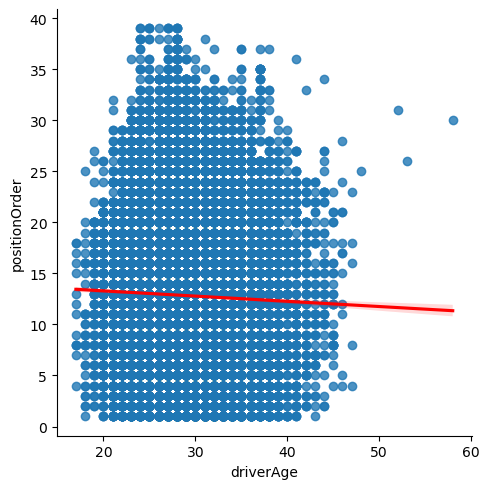

In [39]:
# Age vs Position Order

sns.lmplot(x='driverAge', y='positionOrder', data=data, line_kws={'color': 'red'})
plt.show()  # Display the plot

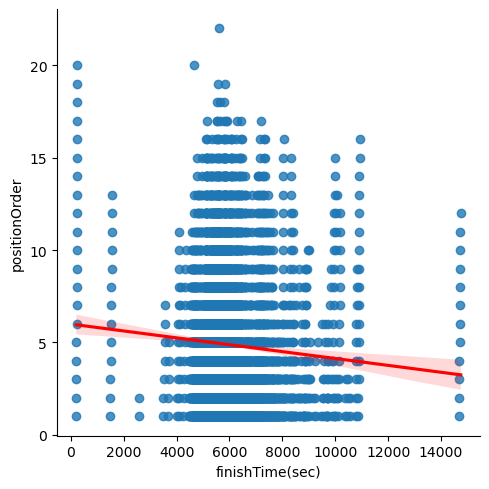

In [40]:
sns.lmplot(x='finishTime(sec)', y='positionOrder', data=data, line_kws={'color': 'red'})
plt.show()  # Display the plot

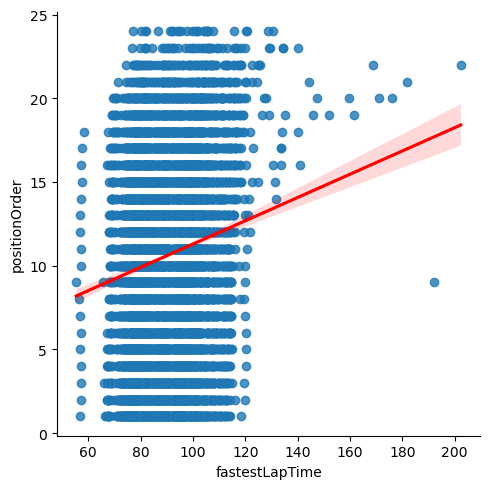

In [41]:
sns.lmplot(x='fastestLapTime', y='positionOrder', data=data, line_kws={'color': 'red'})
plt.show()  # Display the plot

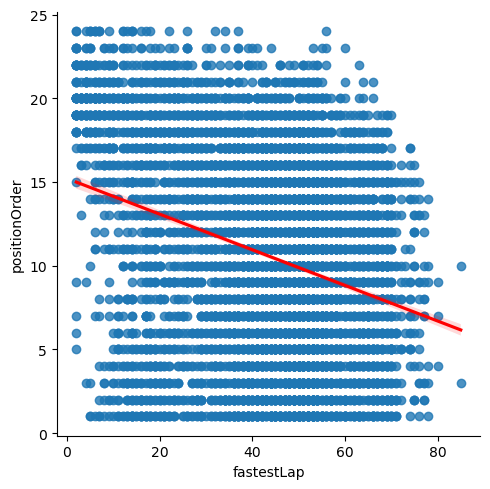

In [42]:
sns.lmplot(x='fastestLap', y='positionOrder', data=data, line_kws={'color': 'red'})
plt.show()  # Display the plot

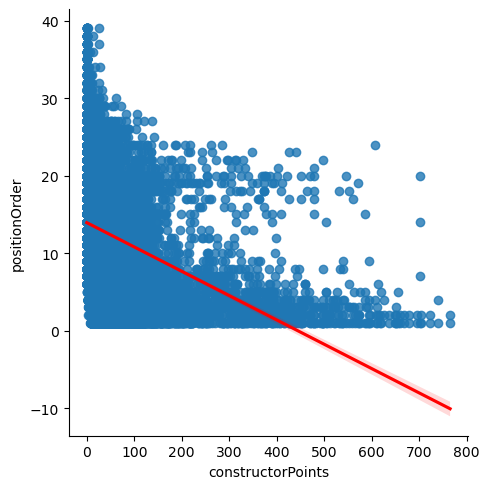

In [43]:
sns.lmplot(x='constructorPoints', y='positionOrder', data=data, line_kws={'color': 'red'})
plt.show()  # Display the plot

#### driverPoints is object, change it to correct data type

In [44]:
# Count the occurrences of 'O' in the 'driverPoints' column
count_O_values = data['driverPoints'].apply(lambda x: str(x).strip().lower() == 'o').sum()

# Display the count of 'O' values
print("Number of 'O' values:", count_O_values)

Number of 'O' values: 3


In [45]:
# Convert 'O' values to 0 in the 'driverPoints' column
data['driverPoints'] = data['driverPoints'].apply(lambda x: 0 if str(x).strip().lower() == 'o' else x)

# Count the occurrences of 'O' in the 'driverPoints' column
count_O_values = data['driverPoints'].apply(lambda x: str(x).strip().lower() == 'o').sum()

# Display the count of 'O' values
print("Number of 'O' values:", count_O_values)

# Convert the column to float type
data['driverPoints'] = data['driverPoints'].astype(float)

Number of 'O' values: 0


### Create Target Column
Predicting whether a Formula 1 driver will finish on the podium (top 3 positions) in a race based on their performance in previous races and team standings

In [46]:
# Define top 5 positions 
top5_positions = [1, 2, 3, 4, 5]

# Create the target column and initialize with 0
data['top5_finish'] = 0

# Mark podium finishes as 1 in the target column
data.loc[data['positionOrder'].isin(top5_positions), 'top5_finish'] = 1

#check
data

resultId  raceId  driverId  constructorId  resultNumber  grid  \
0             1      18         1              1          22.0     1   
1             5      18         5              1          23.0     3   
2             2      18         2              2           3.0     5   
3             3      18         3              3           7.0     7   
4             6      18         6              3           8.0    13   
...         ...     ...       ...            ...           ...   ...   
23241     18056     745       434            170           3.0    17   
23242     18058     745       456            170          19.0    12   
23243     18054     745       468            170           6.0    16   
23244     18052     745       347             95          11.0    10   
23245     18048     745       364             95          12.0     7   

      resultPosText  positionOrder  resultsPoints  laps  ...  \
0                 1              1           10.0    58  ...   
1                 5              5            4.0    58  ...   
2                 2              2            8.0    58  ...   
3                 3              3            6.0    58  ...   
4                 6              6            3.0    57  ...   
...             ...            ...            ...   ...  ...   
23241            10             10            0.0    93  ...   
23242             R             12            0.0    96  ...   
23243             8              8            0.0    96  ...   
23244             6              6            1.0    98  ...   
23245             2              2            6.0   100  ...   

      constructorStandingsId  constructorPoints  constructorPos  \
0                          1               14.0               1   
1                          1               14.0               1   
2                          2                8.0               3   
3                          3                9.0               2   
4                          3                9.0               2   
...                      ...                ...             ...   
23241                  19388               14.0               4   
23242                  19388               14.0               4   
23243                  19388               14.0               4   
23244                  19387               22.0               3   
23245                  19387               22.0               3   

       constructorWins  round                  raceName       date driverAge  \
0                    1      1     Australian Grand Prix 2008-03-16      23.0   
1                    1      1     Australian Grand Prix 2008-03-16      26.0   
2                    0      1     Australian Grand Prix 2008-03-16      30.0   
3                    0      1     Australian Grand Prix 2008-03-16      22.0   
4                    0      1     Australian Grand Prix 2008-03-16      23.0   
...                ...    ...                       ...        ...       ...   
23241                0      8  United States Grand Prix 1961-10-08      33.0   
23242                0      8  United States Grand Prix 1961-10-08      39.0   
23243                0      8  United States Grand Prix 1961-10-08      24.0   
23244                0      8  United States Grand Prix 1961-10-08      31.0   
23245                0      8  United States Grand Prix 1961-10-08      30.0   

      finishTime(sec) top5_finish  
0            5690.616           1  
1            5708.630           1  
2            5696.094           1  
3            5698.779           1  
4                 NaN           0  
...               ...         ...  
23241             NaN           0  
23242             NaN           0  
23243             NaN           0  
23244             NaN           0  
23245        8030.100           1  

[23246 rows x 36 columns]

### Dropping redundant columns

In [47]:
data=data.drop(labels=['resultId','raceId','driverId','constructorId','resultNumber','finishTime','finishTime(msec)',
                      'statusId','dob','driverStandingsId','constructorStandingsId','constructorNationality',
                       'driverNationality','date','driverPos','constructorPos','round','laps','fastestLap', 'positionOrder']
          ,axis=1,errors='ignore')

data.shape

#dropped driver and construcotr positions because their points are the ones that give the position, so Ill just use points

(23246, 16)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23246 entries, 0 to 23245
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   grid               23246 non-null  int64  
 1   resultPosText      23246 non-null  object 
 2   resultsPoints      23246 non-null  float64
 3   rank               7087 non-null   float64
 4   fastestLapTime     6894 non-null   float64
 5   fastestLapSpeed    6894 non-null   float64
 6   driverName         23246 non-null  object 
 7   driverPoints       23241 non-null  float64
 8   driverWins         23246 non-null  int64  
 9   constructor        23246 non-null  object 
 10  constructorPoints  23246 non-null  float64
 11  constructorWins    23246 non-null  int64  
 12  raceName           23246 non-null  object 
 13  driverAge          23040 non-null  float64
 14  finishTime(sec)    6522 non-null   float64
 15  top5_finish        23246 non-null  int64  
dtypes: float64(8), int64(4

### Dropping redundant rows 
Drivers with these position texts will not be taken into account as they will not help in our prediction because we only want active drivers

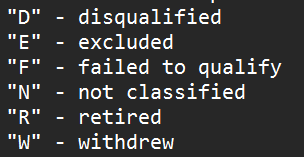

In [49]:
# List of values to drop
values_to_drop = ['D', 'E', 'F', 'N', 'R', 'W']

# Drop rows from "positionOrder" based on values in "resultPosText"
data = data[~data['resultPosText'].isin(values_to_drop)]

In [50]:
data.shape #rows dropped from 23246 to 13759

(13759, 16)

In [51]:
#Drop resultPosText column as it is not needed anymore
data=data.drop(labels=['resultPosText'],axis=1,errors='ignore')

In [52]:
#check if imbalanced
top5_value_counts = data['top5_finish'].value_counts()
top5_value_counts

0    8808
1    4951
Name: top5_finish, dtype: int64

In [53]:
data_model = data

## Handling Outliers

### Without handling outliers

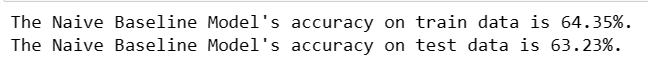

Logistic Regression results 
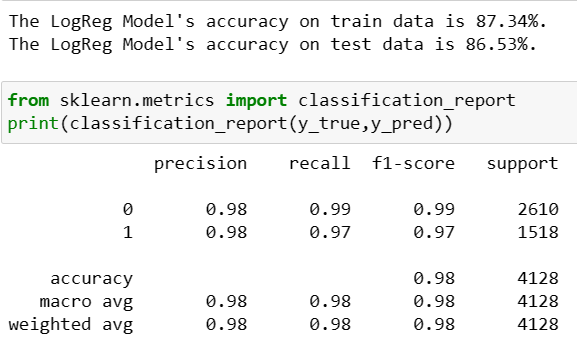

Scaled Logistic Regression Results:
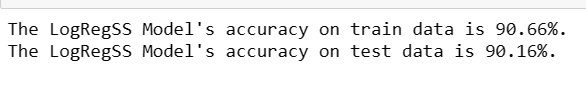

Decision Tree Results:
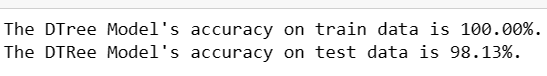

Not handling outliers gave the lowest performance in Logistic Regression Models out of the rest of the methods tested. Mainly Logistic Regression performance would be taken into account as a target variable with binary values (which is true in this case), works better with Logistic Regression.

In [54]:
num_cols = [c for c in data.columns if data[c].dtypes != 'O' and c != 'top5_finish'] #exclude target
num_cols

['grid',
 'resultsPoints',
 'rank',
 'fastestLapTime',
 'fastestLapSpeed',
 'driverPoints',
 'driverWins',
 'constructorPoints',
 'constructorWins',
 'driverAge',
 'finishTime(sec)']

### Winsorisation Method

In [55]:
# function to create histogram, Q-Q plot and
# boxplot.


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


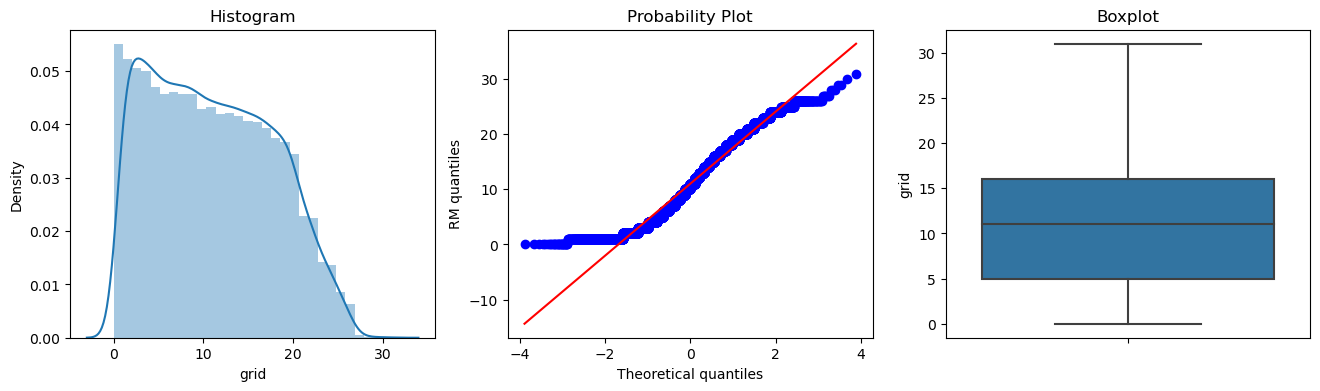

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


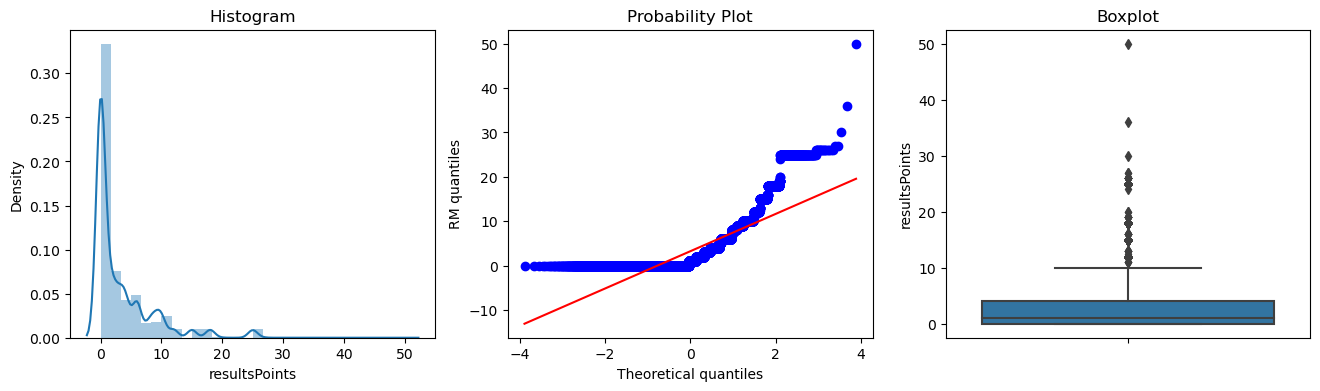

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


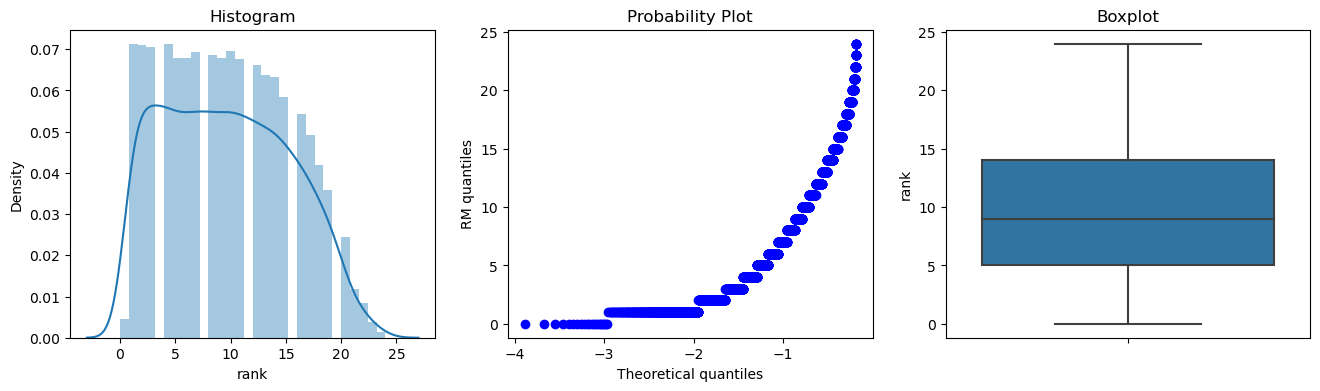

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


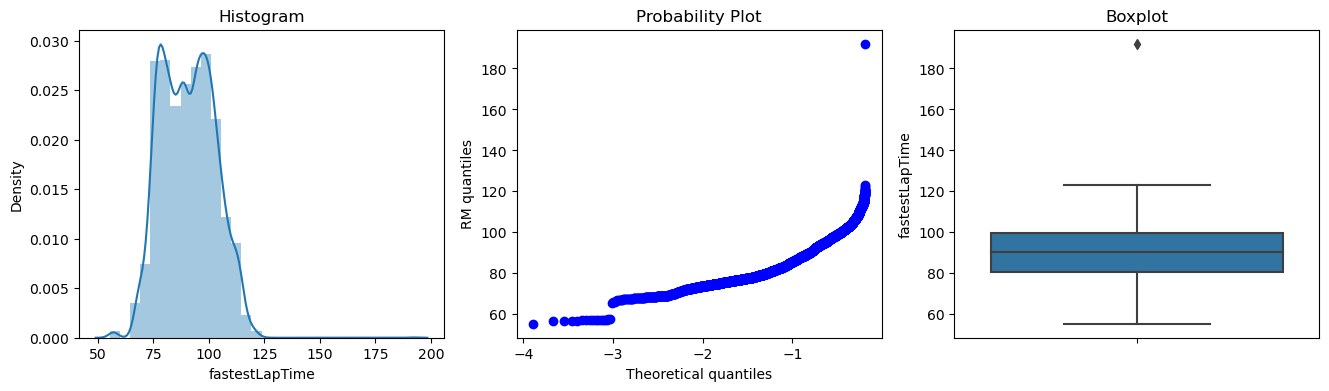

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


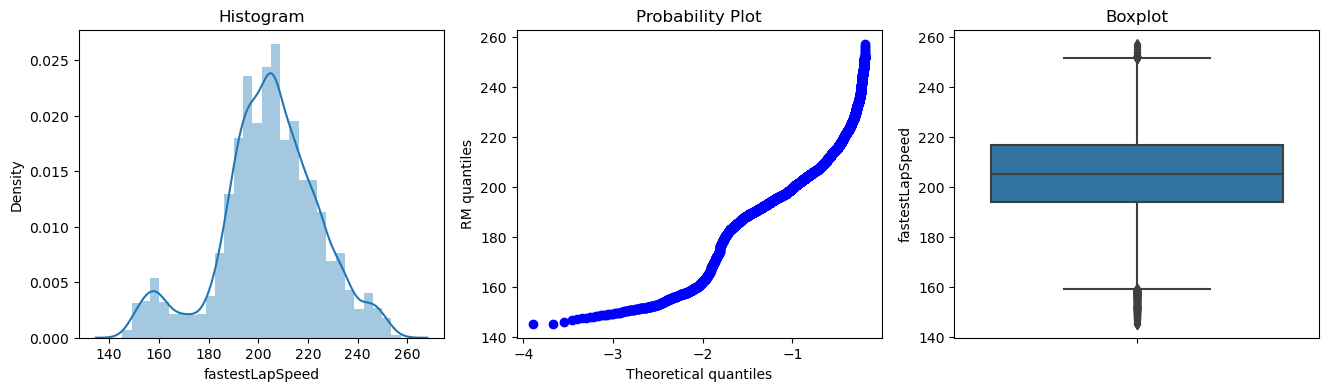

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


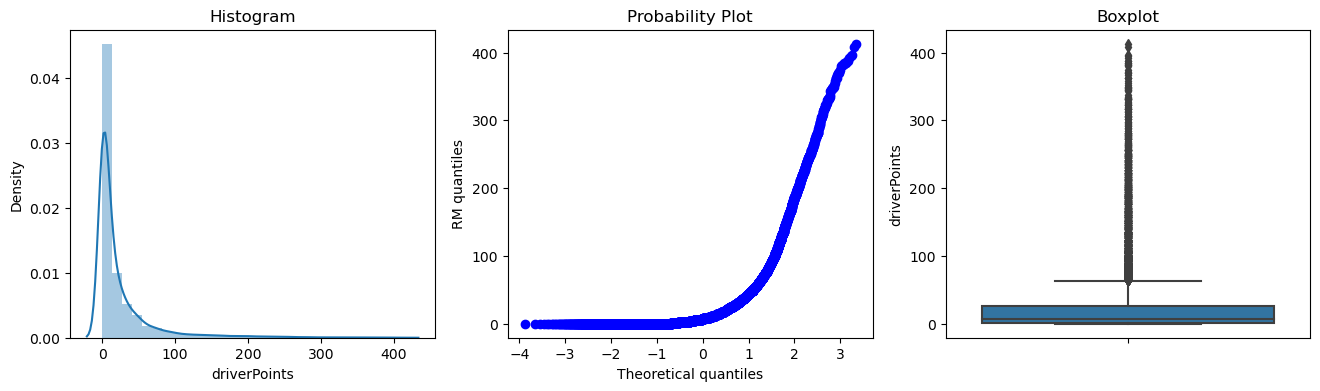

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


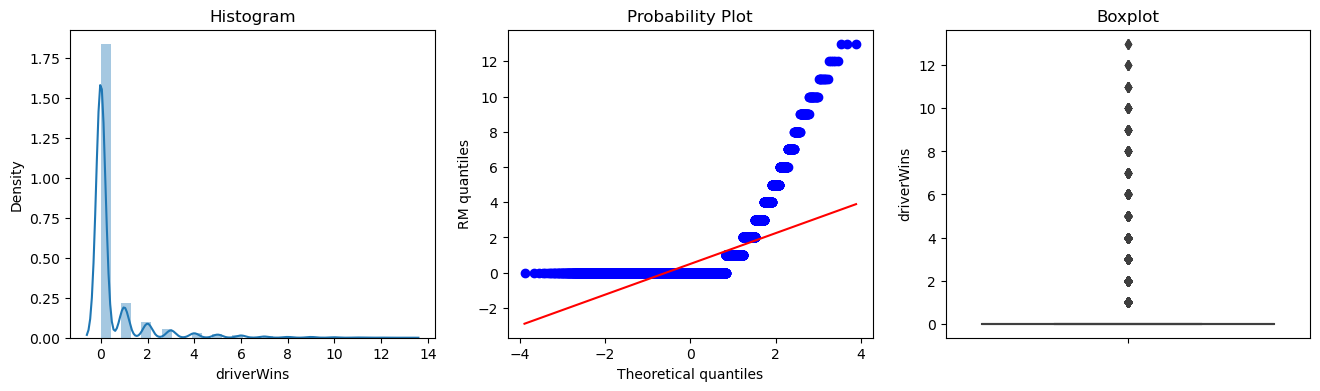

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


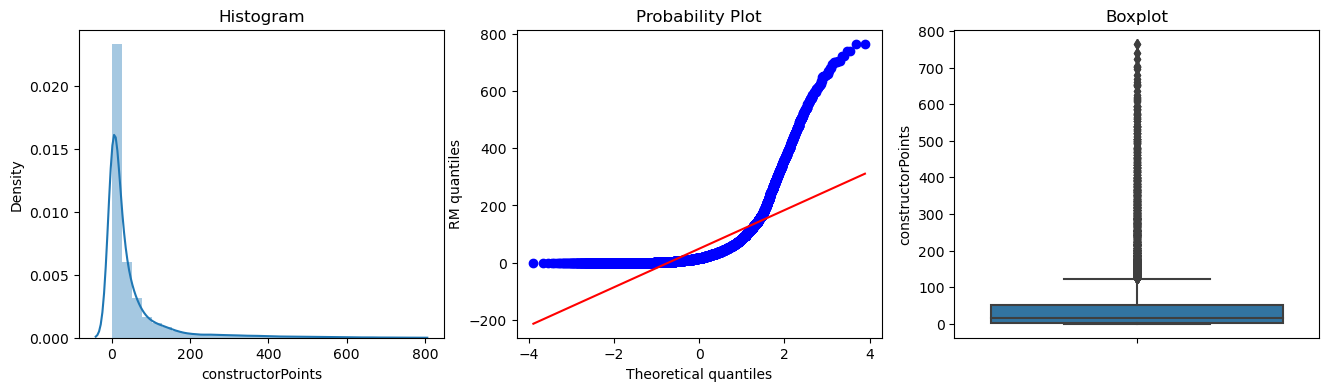

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


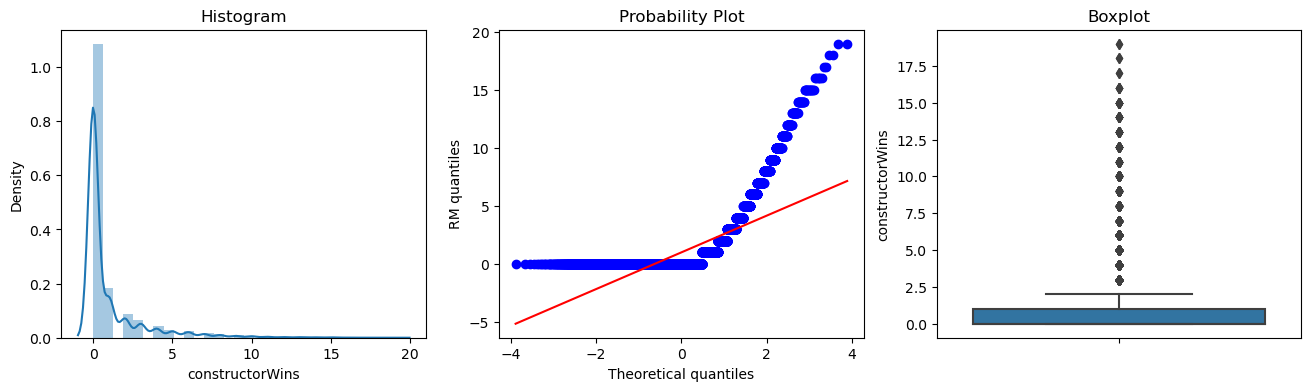

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


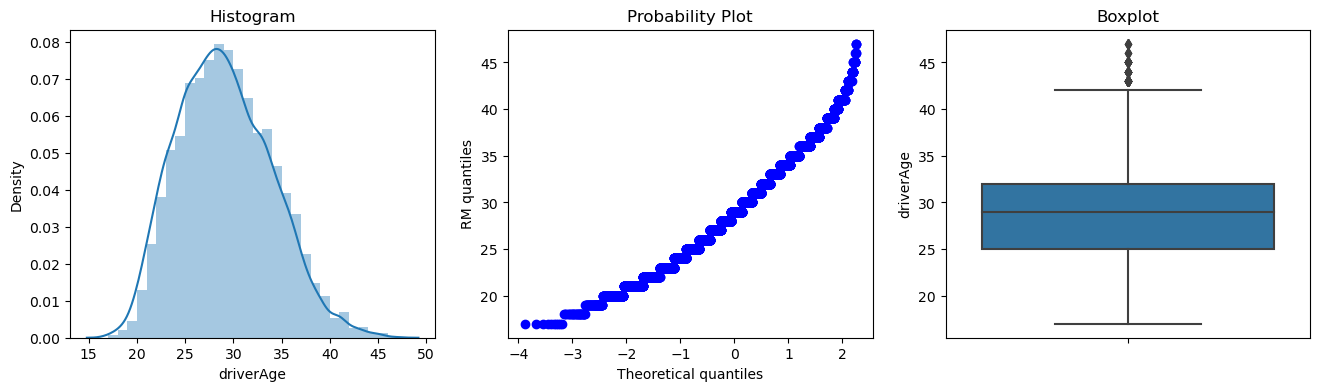

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


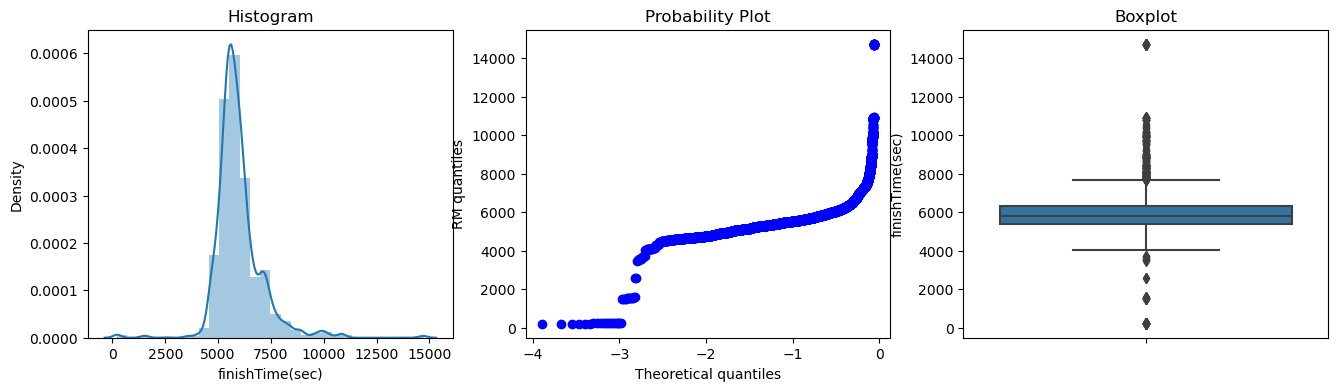

In [56]:
#before
for i in num_cols:
        diagnostic_plots(data,i)

In [57]:
def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))


data_model['grid']= winsorise(data_model, 'grid', data_model['grid'].quantile(0.95), data_model['grid'].quantile(0.05))
data_model['resultsPoints']= winsorise(data_model, 'resultsPoints', data_model['resultsPoints'].quantile(0.95), data_model['resultsPoints'].quantile(0.05))
data_model['rank']= winsorise(data_model, 'rank', data_model['rank'].quantile(0.95), data_model['rank'].quantile(0.05))
data_model['fastestLapTime']= winsorise(data_model, 'fastestLapTime', data_model['fastestLapTime'].quantile(0.95), data_model['fastestLapTime'].quantile(0.05))
data_model['fastestLapSpeed']= winsorise(data_model, 'fastestLapSpeed', data_model['fastestLapSpeed'].quantile(0.95), data_model['fastestLapSpeed'].quantile(0.05))
data_model['driverPoints']= winsorise(data_model, 'driverPoints', data_model['driverPoints'].quantile(0.95), data_model['driverPoints'].quantile(0.05))
data_model['driverWins']= winsorise(data_model, 'driverWins', data_model['driverWins'].quantile(0.95), data_model['driverWins'].quantile(0.05))
data_model['constructorPoints']= winsorise(data_model, 'constructorPoints', data_model['constructorPoints'].quantile(0.95), data_model['constructorPoints'].quantile(0.05))
data_model['constructorWins']= winsorise(data_model, 'constructorWins', data_model['constructorWins'].quantile(0.95), data_model['constructorWins'].quantile(0.05))
data_model['driverAge']= winsorise(data_model, 'driverAge', data_model['driverAge'].quantile(0.95), data_model['driverAge'].quantile(0.05))
data_model['finishTime(sec)']= winsorise(data_model, 'finishTime(sec)', data_model['finishTime(sec)'].quantile(0.95), data_model['finishTime(sec)'].quantile(0.05))



C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


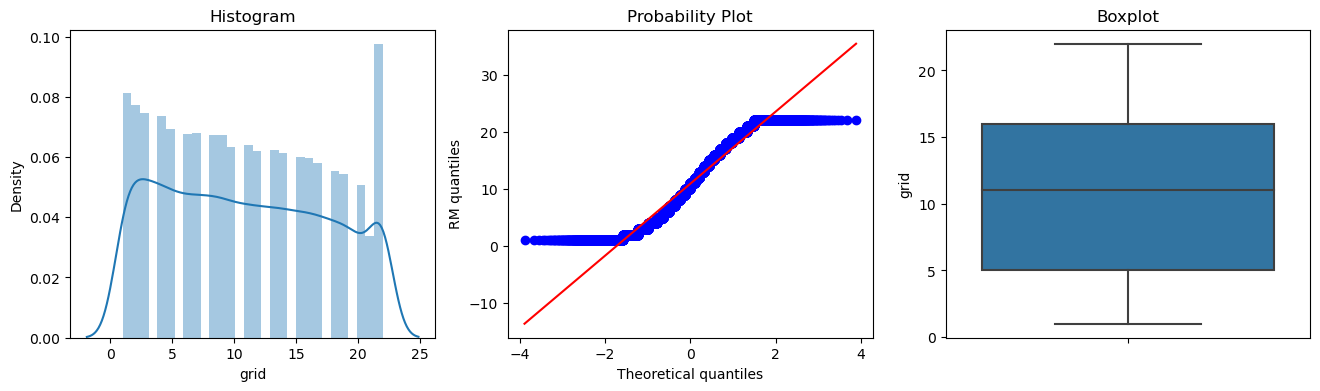

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


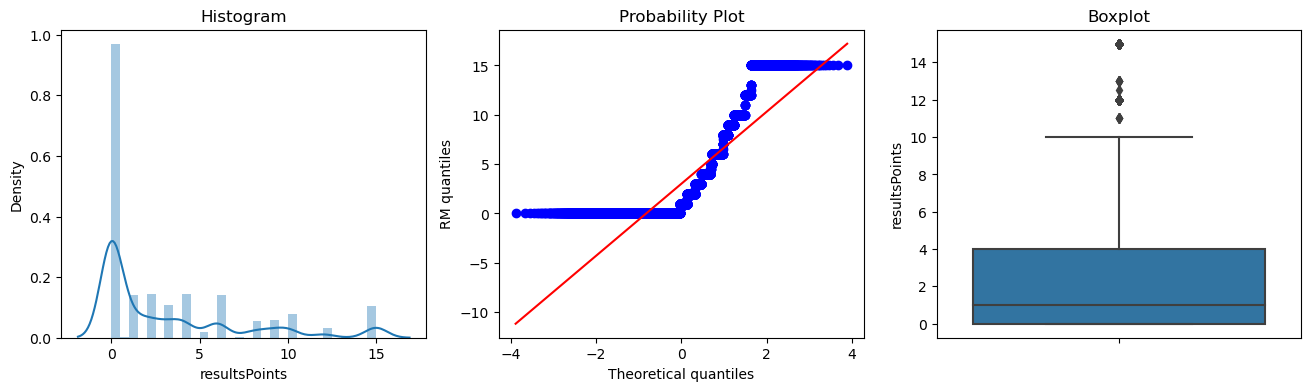

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


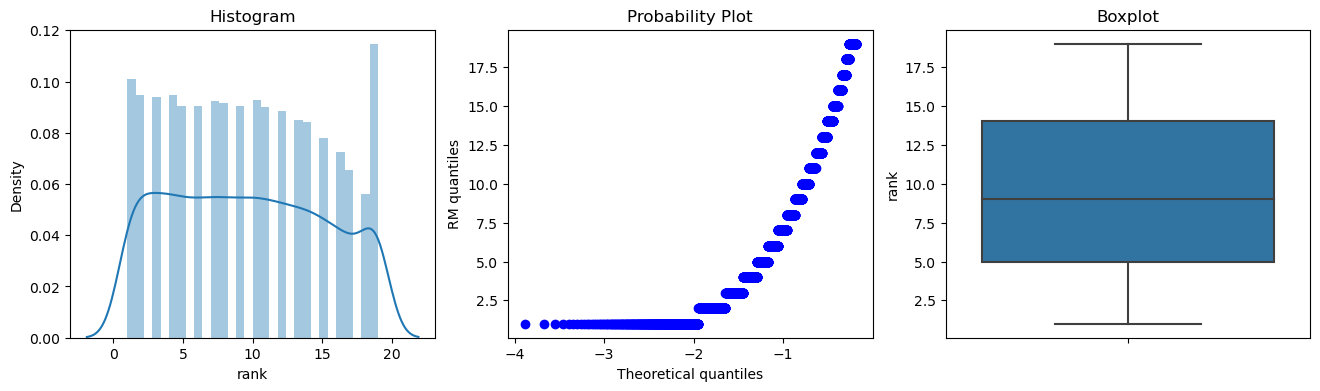

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


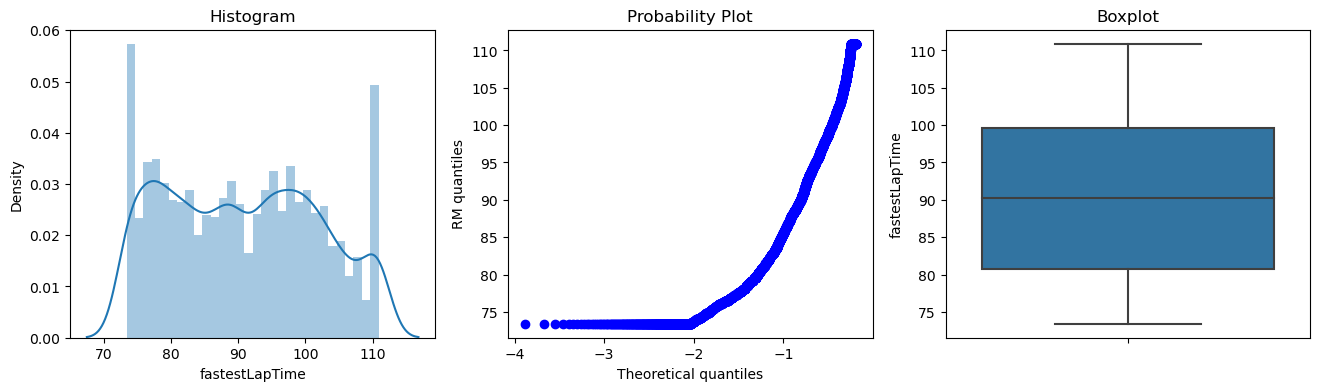

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


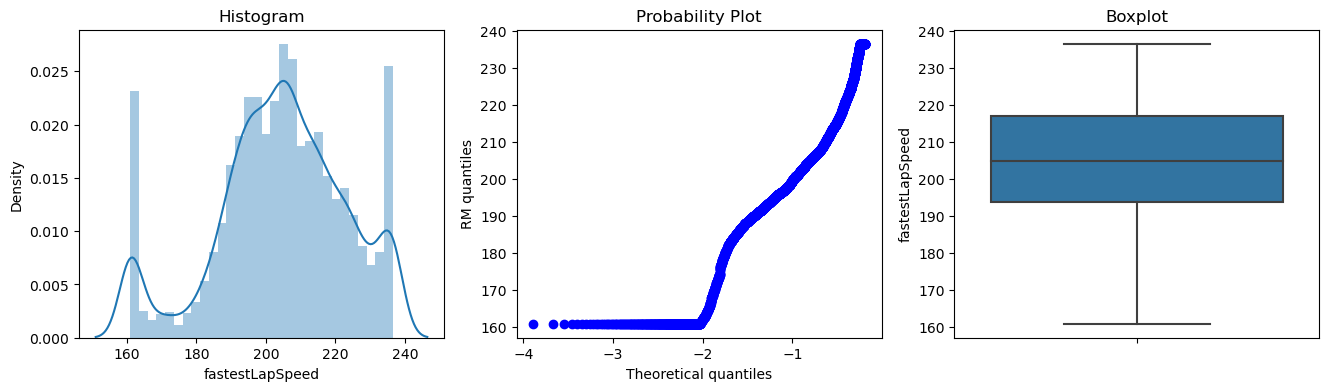

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


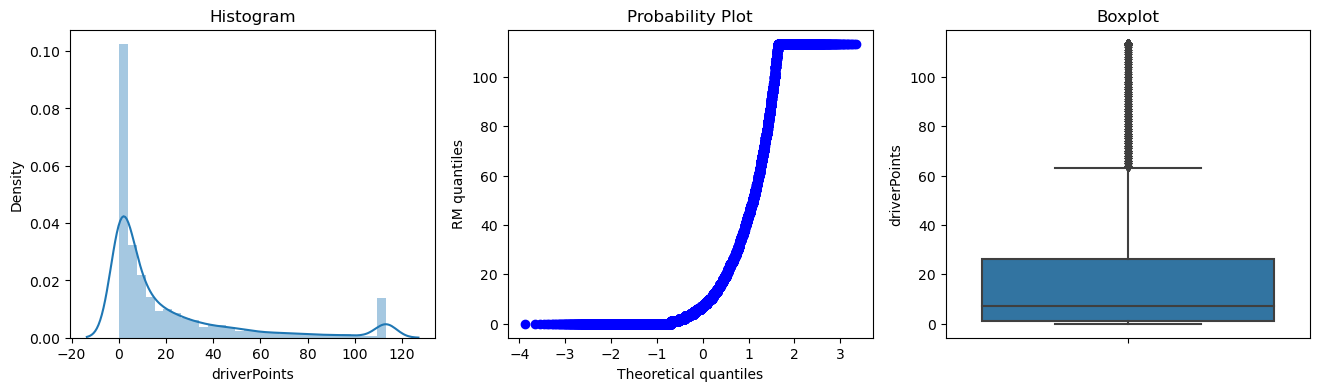

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


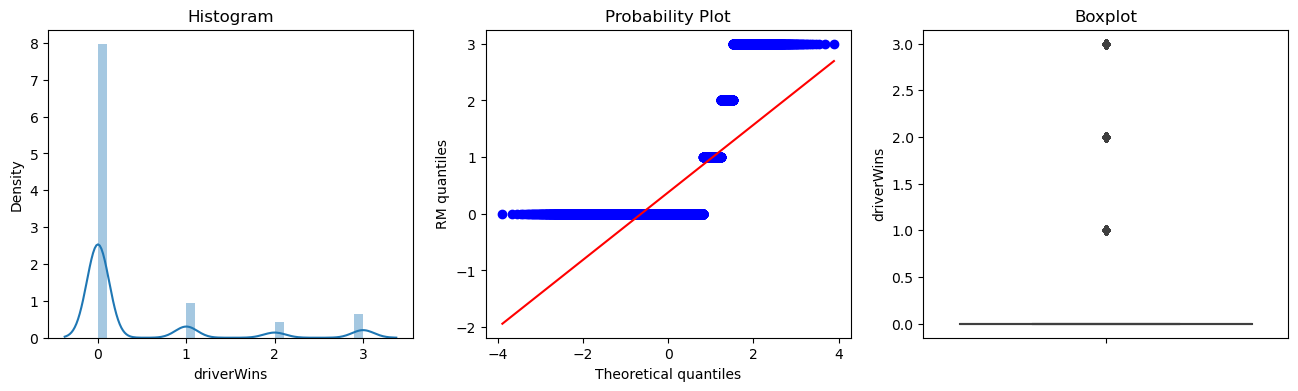

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


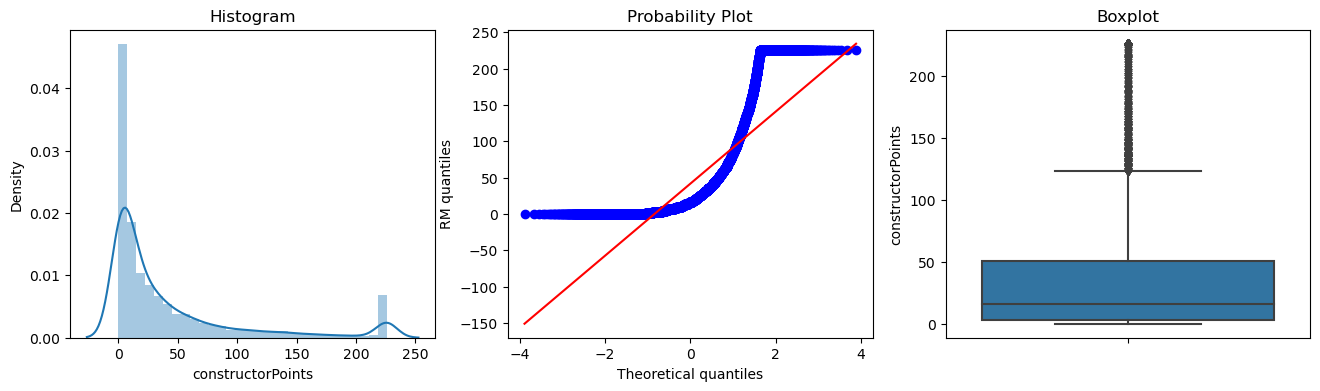

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


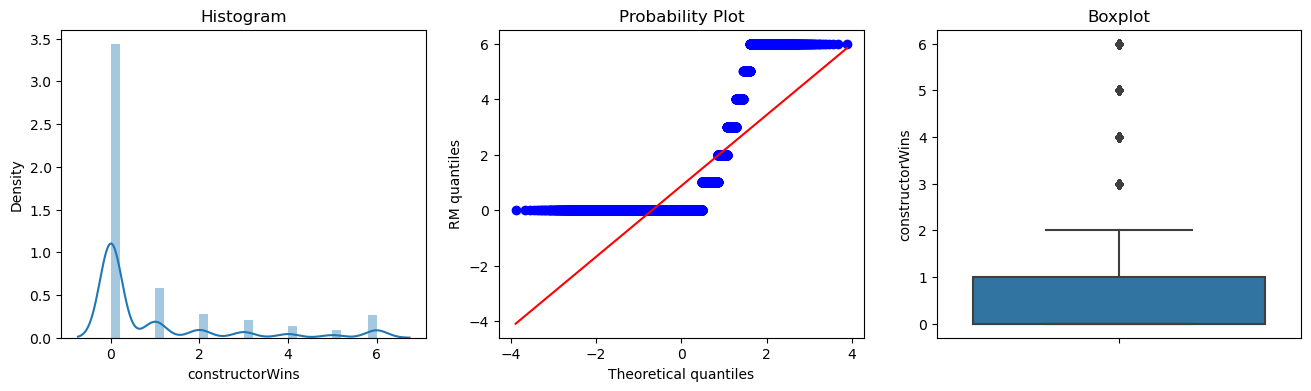

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


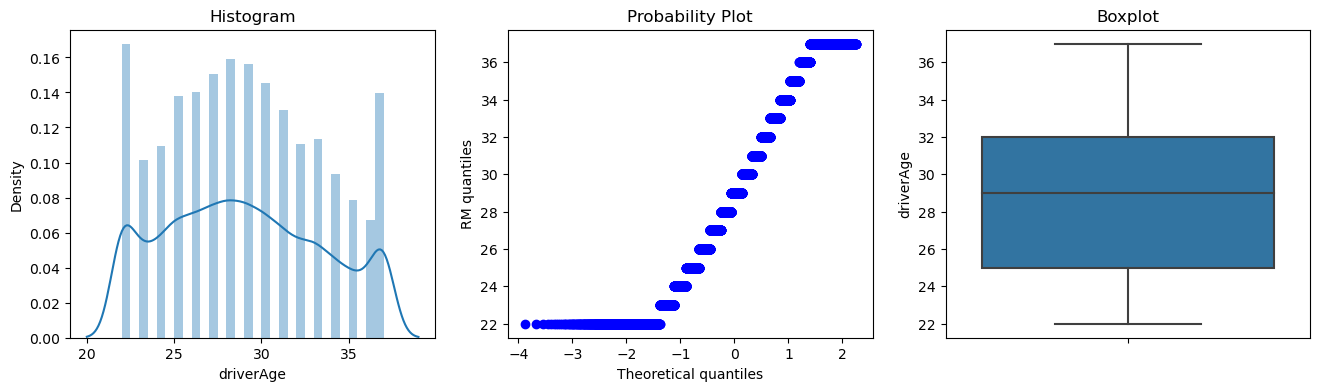

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


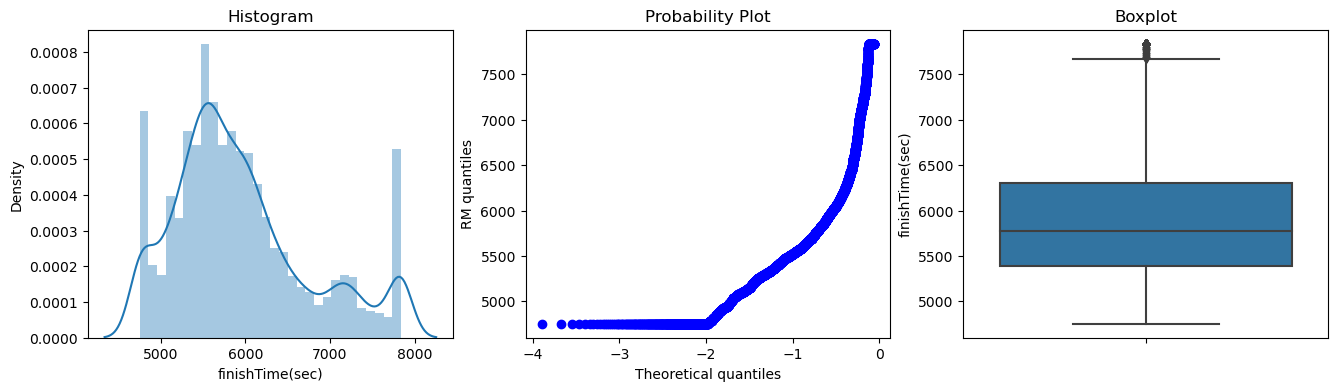

In [58]:
#after
for i in num_cols:
        diagnostic_plots(data_model,i)

Logistic Regression Results: 
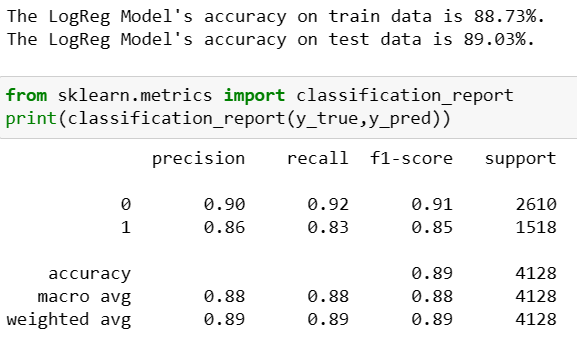

Scaled Logistic Regression Results:
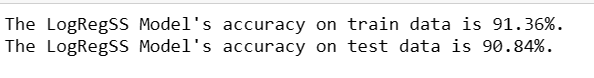

DTree Results:
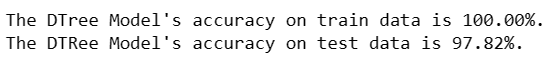

As Winsorisation gave the highest Model Accuracy for the Logistic Regression models, Winsorisation would be applied.

### Trimming

def find_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

#### find limits

g_upper_limit, g_lower_limit = find_boundaries(data_model, 'grid', 1.5)
outliers_g = np.where(data_model['grid'] > g_upper_limit, True,
                       np.where(data_model['grid'] < g_lower_limit, True, False))

rp_upper_limit, rp_lower_limit = find_boundaries(data_model, 'resultsPoints', 1.5)
outliers_rp = np.where(data_model['resultsPoints'] > rp_upper_limit, True,
                       np.where(data_model['resultsPoints'] < rp_lower_limit, True, False))

r_upper_limit, r_lower_limit = find_boundaries(data_model, 'rank', 1.5)
outliers_r = np.where(data_model['rank'] > r_upper_limit, True,
                       np.where(data_model['rank'] < r_lower_limit, True, False))

lt_upper_limit, lt_lower_limit = find_boundaries(data_model, 'fastestLapTime', 1.5)
outliers_lt = np.where(data_model['fastestLapTime'] > lt_upper_limit, True,
                       np.where(data_model['fastestLapTime'] < lt_lower_limit, True, False))

ls_upper_limit, ls_lower_limit = find_boundaries(data_model, 'fastestLapSpeed', 1.5)
outliers_ls = np.where(data_model['fastestLapSpeed'] > ls_upper_limit, True,
                       np.where(data_model['fastestLapSpeed'] < ls_lower_limit, True, False))

dp_upper_limit, dp_lower_limit = find_boundaries(data_model, 'driverPoints', 1.5)
outliers_dp = np.where(data_model['driverPoints'] > dp_upper_limit, True,
                       np.where(data_model['driverPoints'] < dp_lower_limit, True, False))

dw_upper_limit, dw_lower_limit = find_boundaries(data_model, 'driverWins', 1.5)
outliers_dw = np.where(data_model['driverWins'] > dw_upper_limit, True,
                       np.where(data_model['driverWins'] < dw_lower_limit, True, False))

cp_upper_limit, cp_lower_limit = find_boundaries(data_model, 'constructorPoints', 1.5)
outliers_cp = np.where(data_model['constructorPoints'] > cp_upper_limit, True,
                       np.where(data_model['constructorPoints'] < cp_lower_limit, True, False))

da_upper_limit, da_lower_limit = find_boundaries(data_model, 'driverAge', 1.5)
outliers_da = np.where(data_model['driverAge'] > da_upper_limit, True,
                       np.where(data_model['driverAge'] < da_lower_limit, True, False))

ft_upper_limit, ft_lower_limit = find_boundaries(data_model, 'finishTime(sec)', 1.5)
outliers_ft = np.where(data_model['finishTime(sec)'] > ft_upper_limit, True,
                       np.where(data_model['finishTime(sec)'] < ft_lower_limit, True, False))

#### let's trim the dataset of outliers across multiple variables

data_model_trimmed = data_model.loc[~(outliers_g + outliers_rp + outliers_r + outliers_lt + outliers_ls + outliers_dp +
                                     outliers_dw + outliers_cp + outliers_da + outliers_ft), ]

data_model.shape, data_model_trimmed.shape

data_model = data_model_trimmed

Naiive Baseline Result:
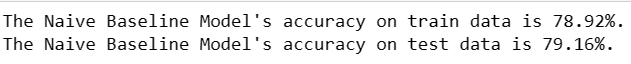

Logistic Regression Results:
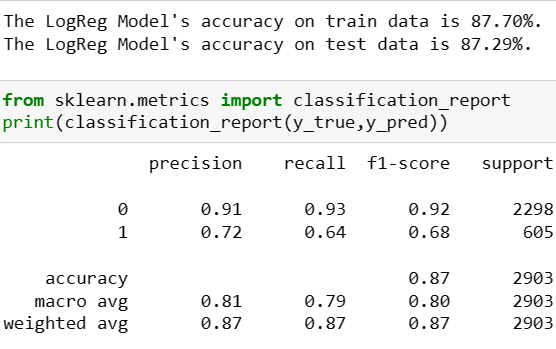

Scaled Log Reg Results:
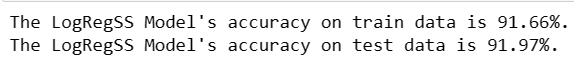

Decision Tree Result:
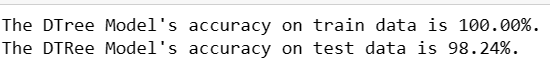

Although the Naiive Baseline and Decision Tree result increased, the Logistic Regression performance went down. 
Additionally, I do not want to reduce my data with trimming. Therefore, I will not be using Trimming.

# Train-Test Split

In [59]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data_model.drop('top5_finish', axis=1), data_model['top5_finish'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((9631, 14), (4128, 14))

In [60]:
y_train.shape, y_test.shape

((9631,), (4128,))

# Step 3: Data Cleansing and Transformation <a id="part3"></a>

## Imputing Missing Data

### Performing Median Imputation

In [61]:
X_train.isnull().sum()

grid                    0
resultsPoints           0
rank                 5492
fastestLapTime       5506
fastestLapSpeed      5506
driverName              0
driverPoints            3
driverWins              0
constructor             0
constructorPoints       0
constructorWins         0
raceName                0
driverAge             119
finishTime(sec)      5051
dtype: int64

#### let's create a median imputer

median_imputer = MeanMedianImputer(imputation_method='median',
                                   variables=['fastestLapTime', 'fastestLapSpeed', 'driverPoints', 'driverAge',
                                             'finishTime(sec)','rank'])

median_imputer.fit(X_train)

#### let's inspect the dictionary with the mappings for each variable (just to show the value)
median_imputer.imputer_dict_ 

#### transform the data
X_train = median_imputer.transform(X_train) 
X_test = median_imputer.transform(X_test)

#### check
X_train.isnull().sum()

Naiive Baseline:
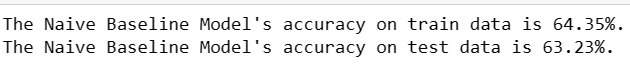

Logistic Regression:
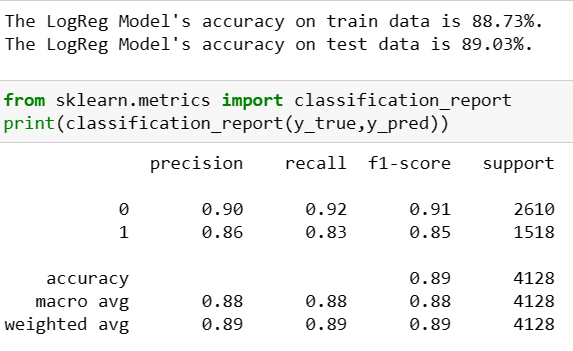

Scaled Logistic Regression:
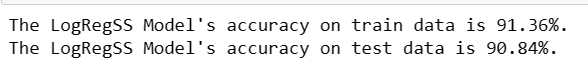

Decision Tree:
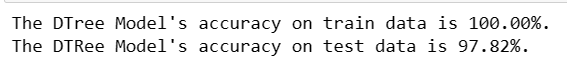

### Replacing missing values by an arbitrary number
-1 is used as the arbitrary number as it is common practice to indicate value and would not be mistaken as a data in any of the variables that I intend to impute.

In [62]:
# let's create an arbitrary value imputer

imputer = ArbitraryNumberImputer(
    arbitrary_number=-1, variables=['fastestLapTime', 'fastestLapSpeed', 'driverPoints', 'driverAge',
                                             'finishTime(sec)','rank'])

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-1,
                       variables=['fastestLapTime', 'fastestLapSpeed',
                                  'driverPoints', 'driverAge',
                                  'finishTime(sec)', 'rank'])

In [63]:
# dictionary with the mappings for each variable
imputer.arbitrary_number

# transform the data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [64]:
X_train.isnull().sum()

grid                 0
resultsPoints        0
rank                 0
fastestLapTime       0
fastestLapSpeed      0
driverName           0
driverPoints         0
driverWins           0
constructor          0
constructorPoints    0
constructorWins      0
raceName             0
driverAge            0
finishTime(sec)      0
dtype: int64

Logistic Regression:
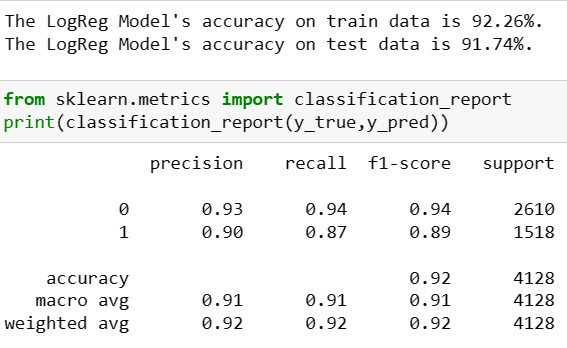

Scaled Logistic Regression:
    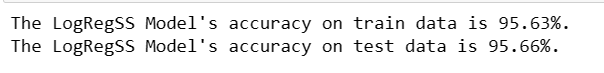

Decision Tree:
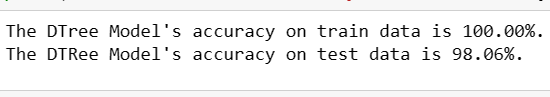

All accuracy from Logistic Regression Models and Decision Tree Model improved when imputing with an arbitrary number was used. Hence, this method will be used.

## Transforming Numerical Variables 

### Without Transformation

Naiive Baseline:
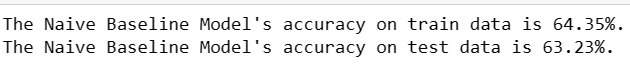

Logistic Regression:
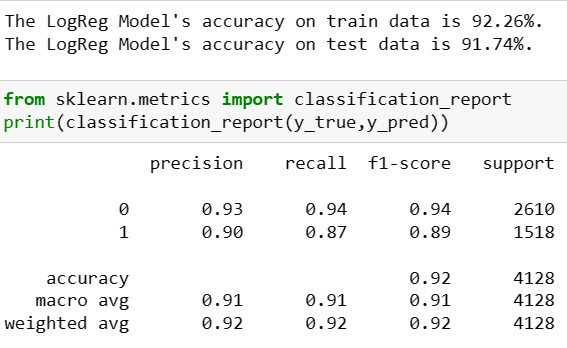

Scaled Logistic Regression:
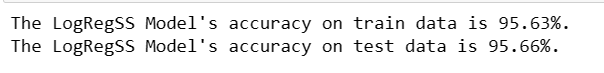

Decision Tree:
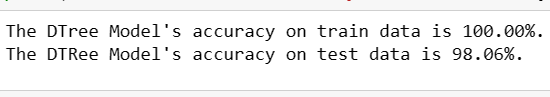

### Yeo-Johnson Transformation

In [65]:
  def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

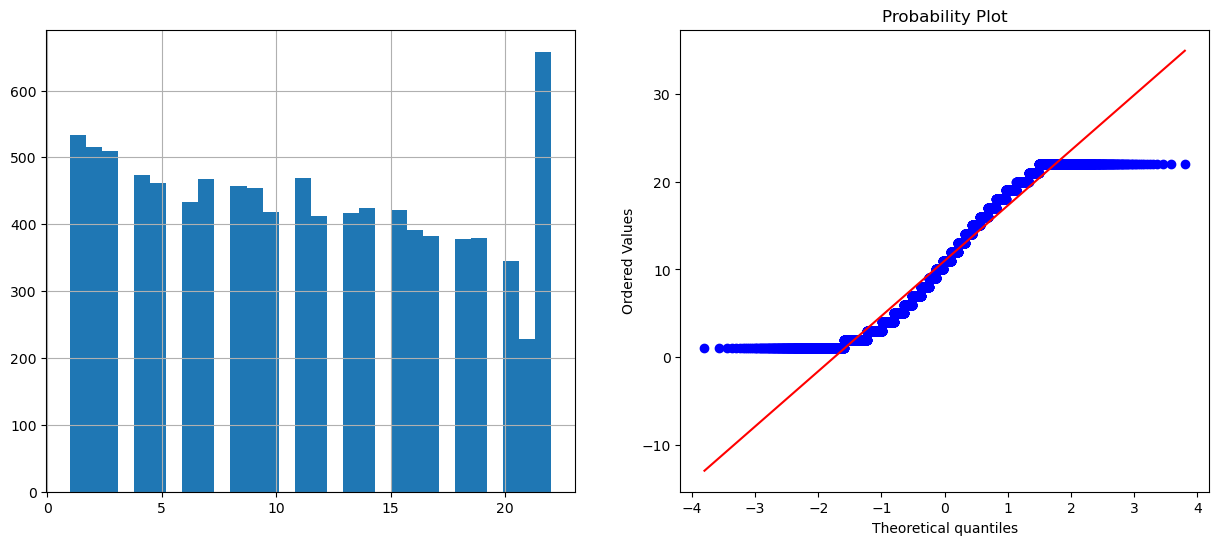

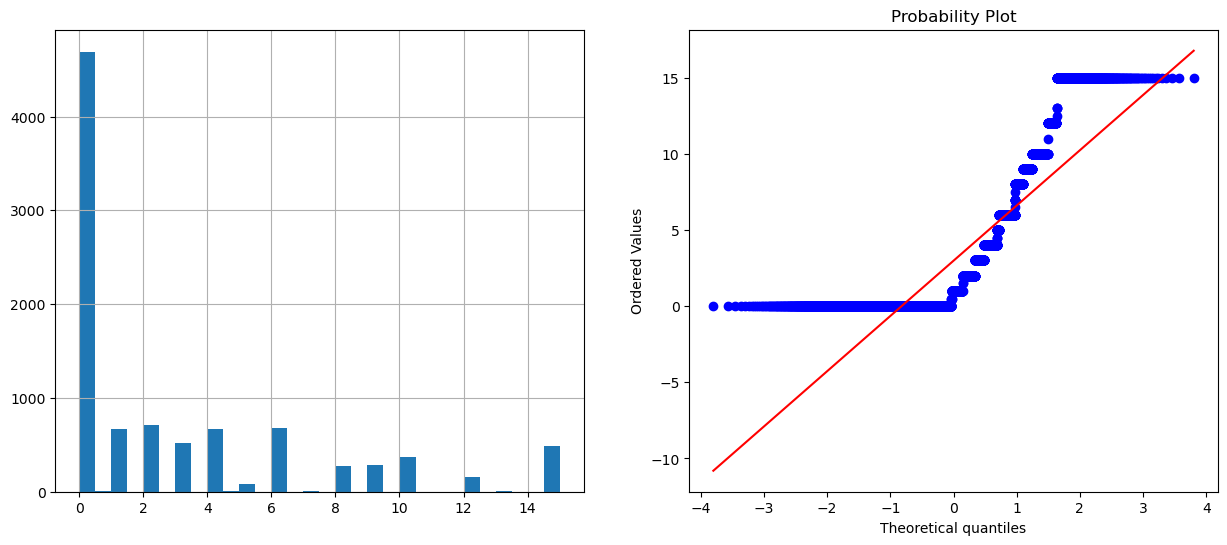

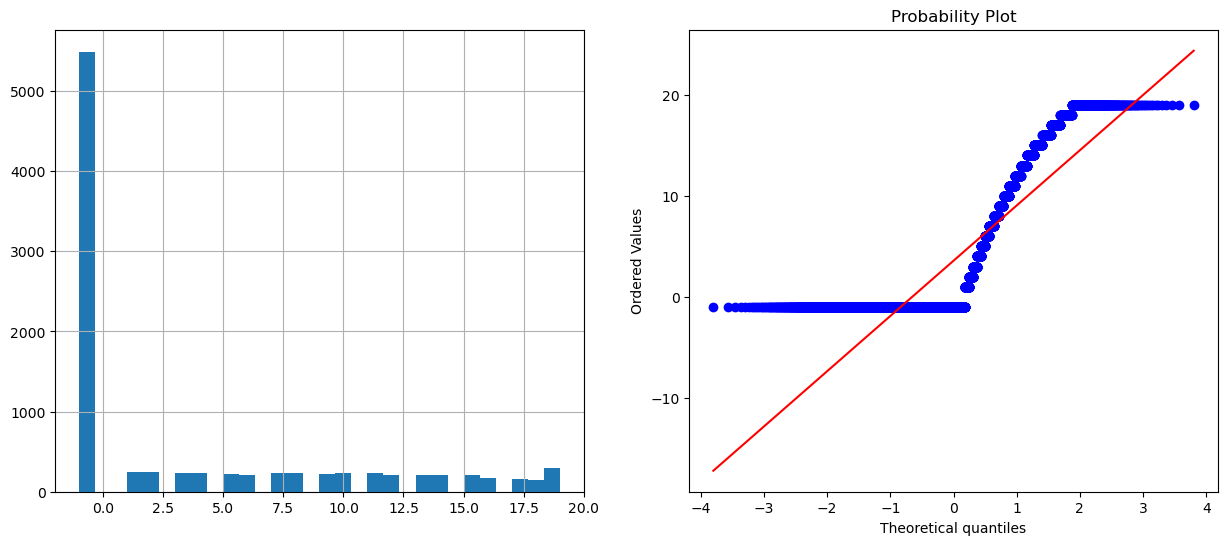

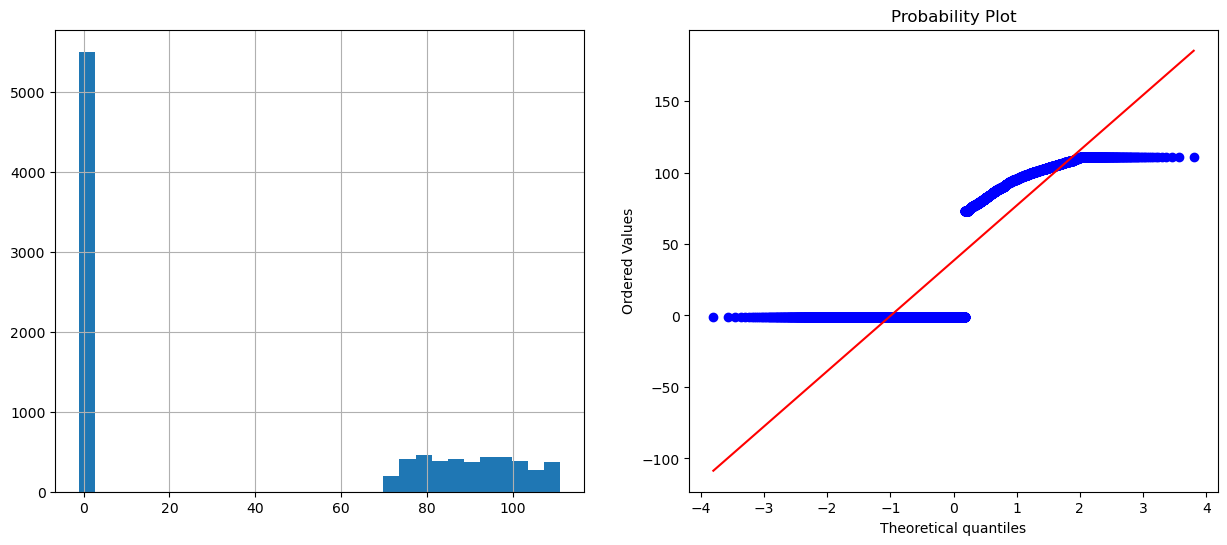

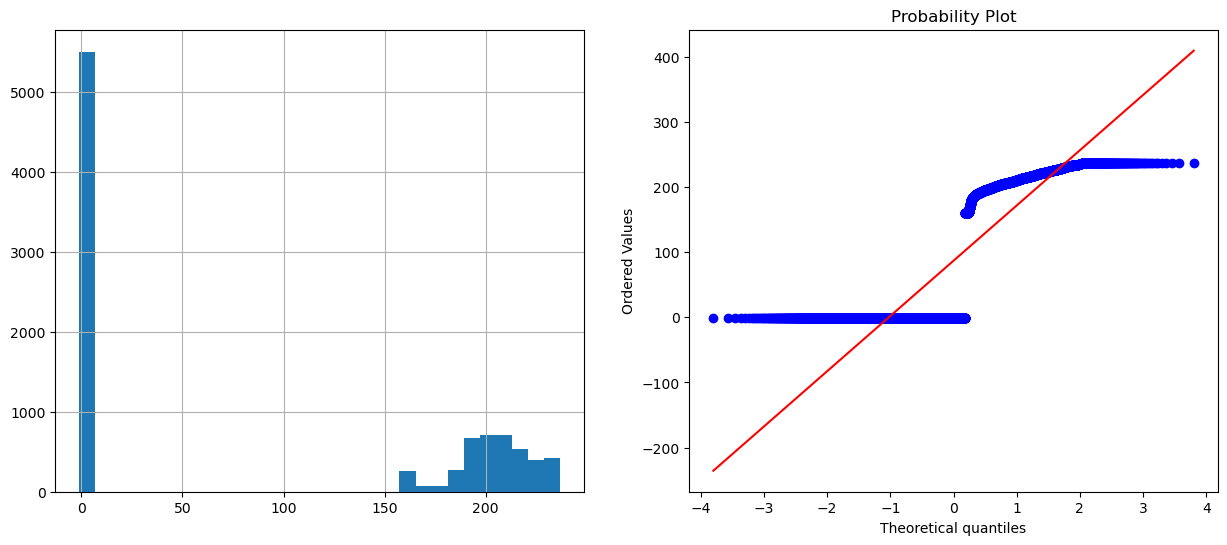

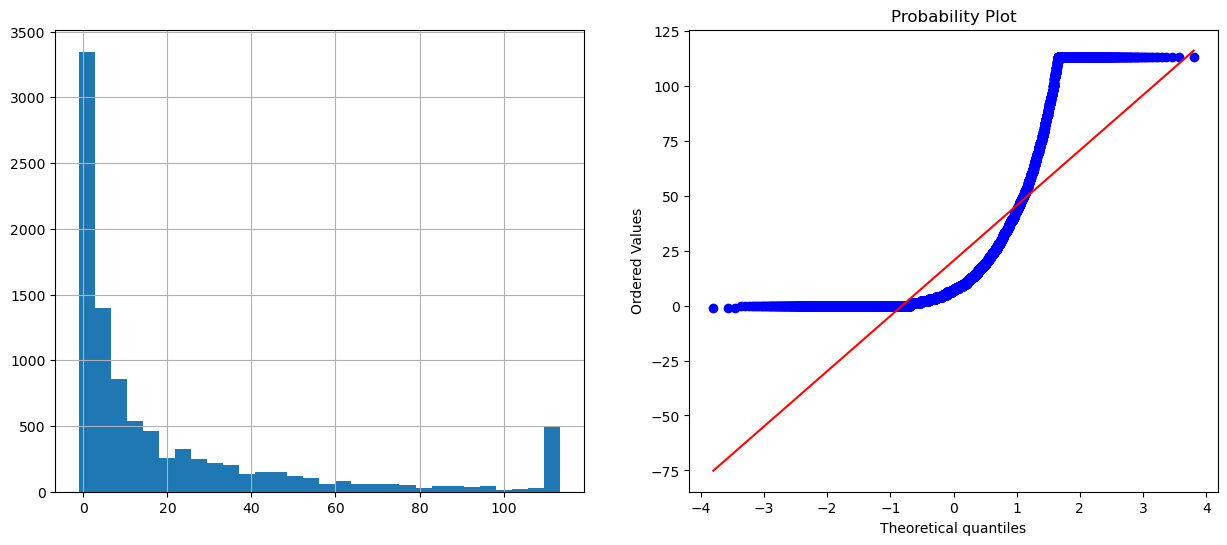

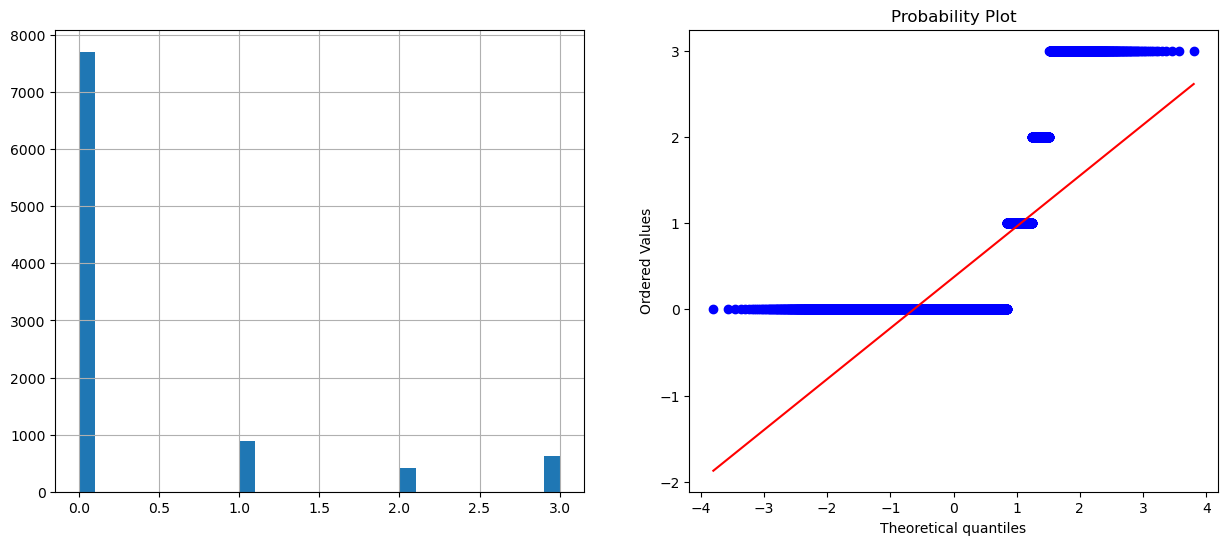

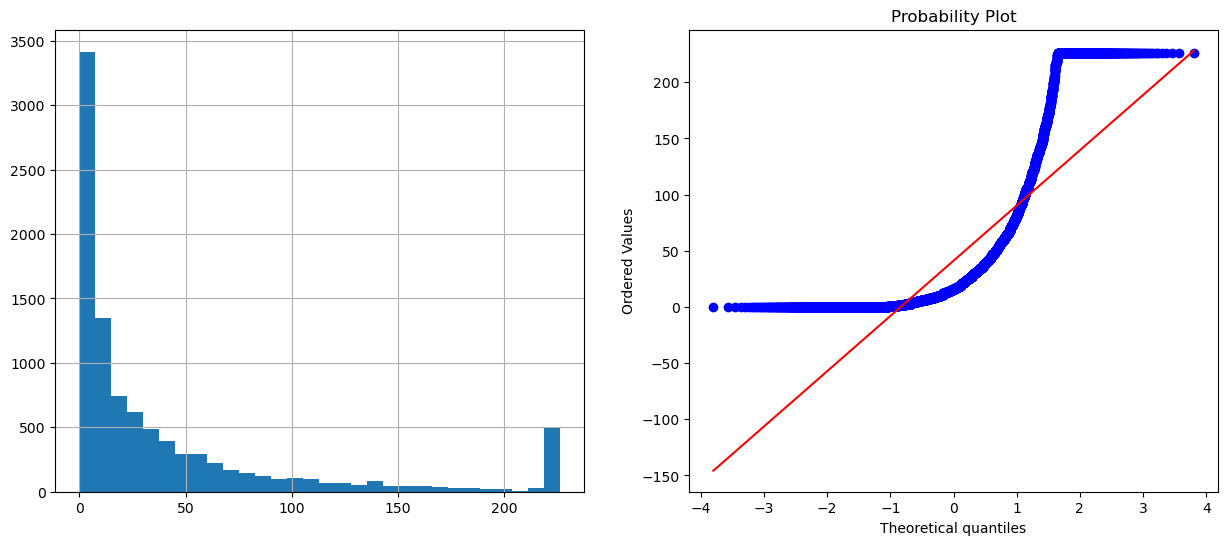

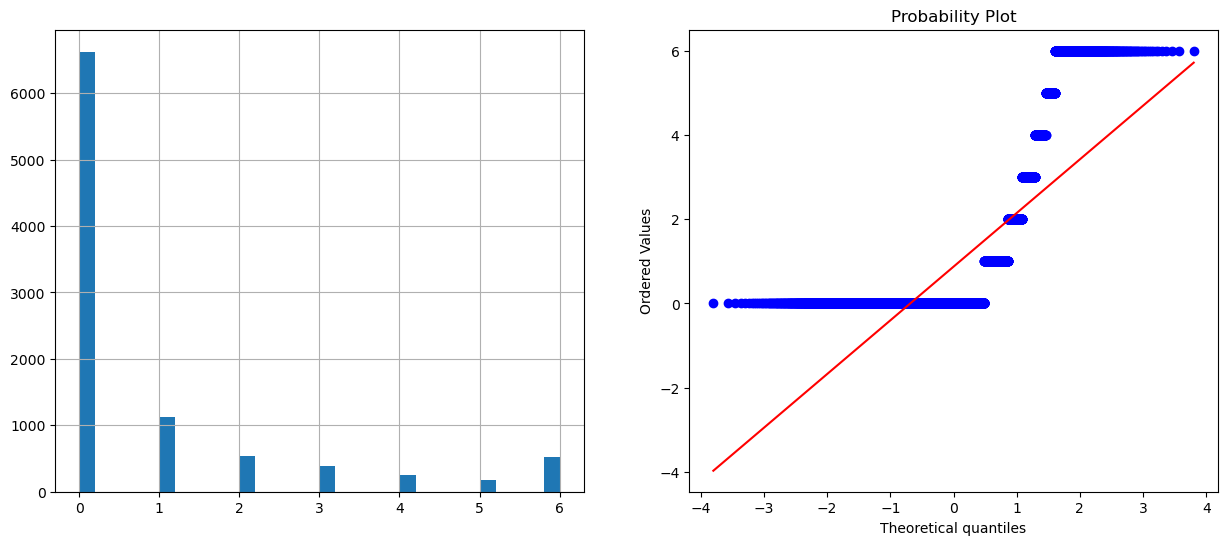

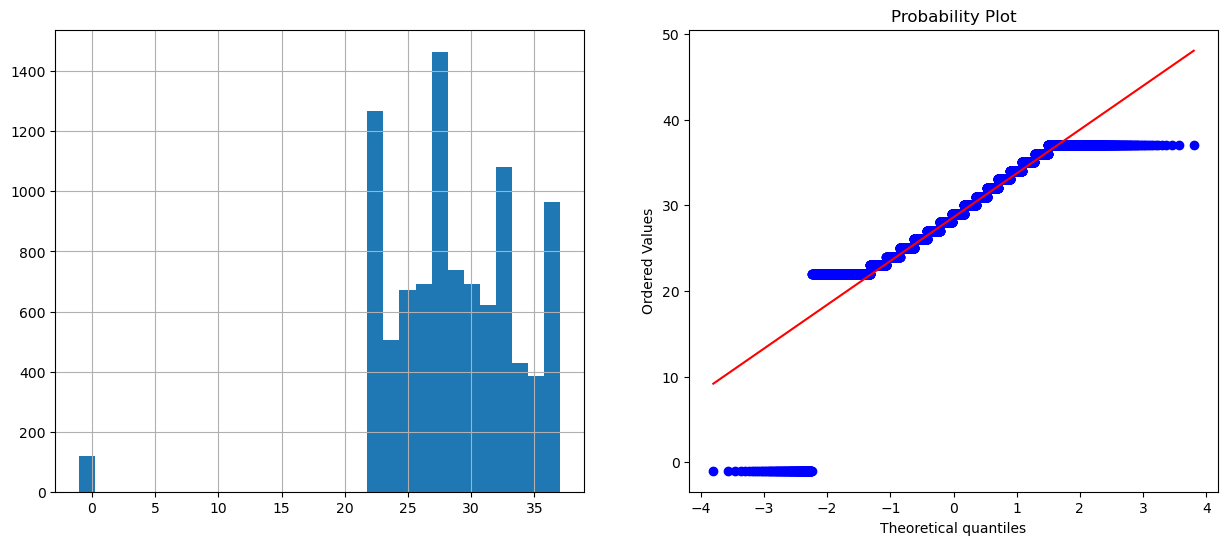

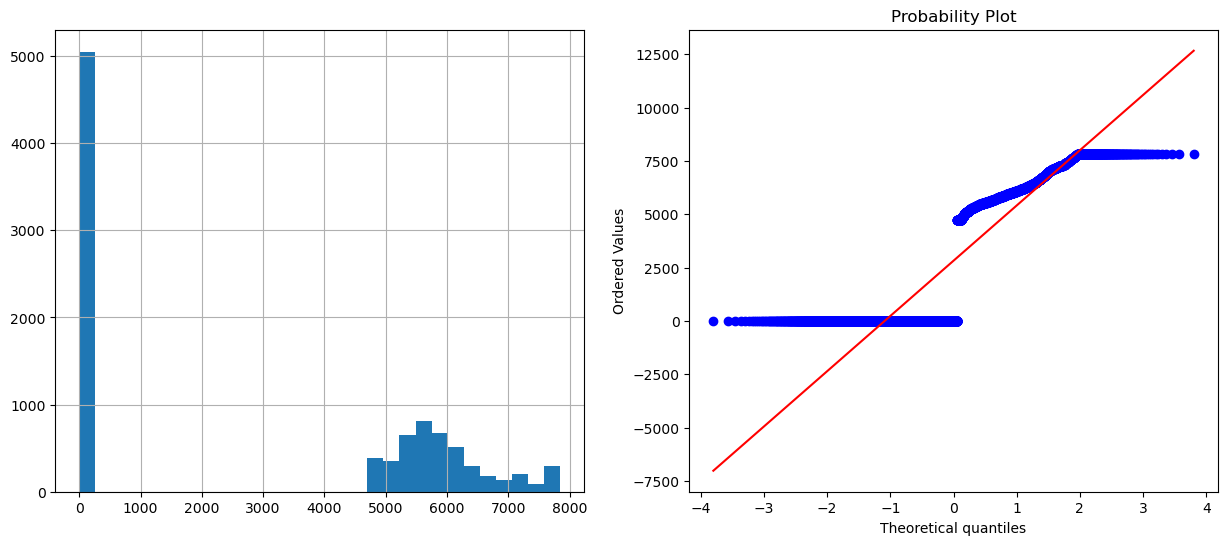

In [66]:
#before
for i in num_cols:
        diagnostic_plots(X_train,i)

In [67]:
# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = ['grid','resultsPoints',
                                         'rank','fastestLapTime','fastestLapSpeed','driverPoints','driverWins',
                                         'constructorPoints','constructorWins','driverAge',
                                         'finishTime(sec)'])

# fit transformer to the dataframe
yjt.fit(X_train)

YeoJohnsonTransformer(variables=['grid', 'resultsPoints', 'rank',
                                 'fastestLapTime', 'fastestLapSpeed',
                                 'driverPoints', 'driverWins',
                                 'constructorPoints', 'constructorWins',
                                 'driverAge', 'finishTime(sec)'])

In [68]:
# transform indicated variables

X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)

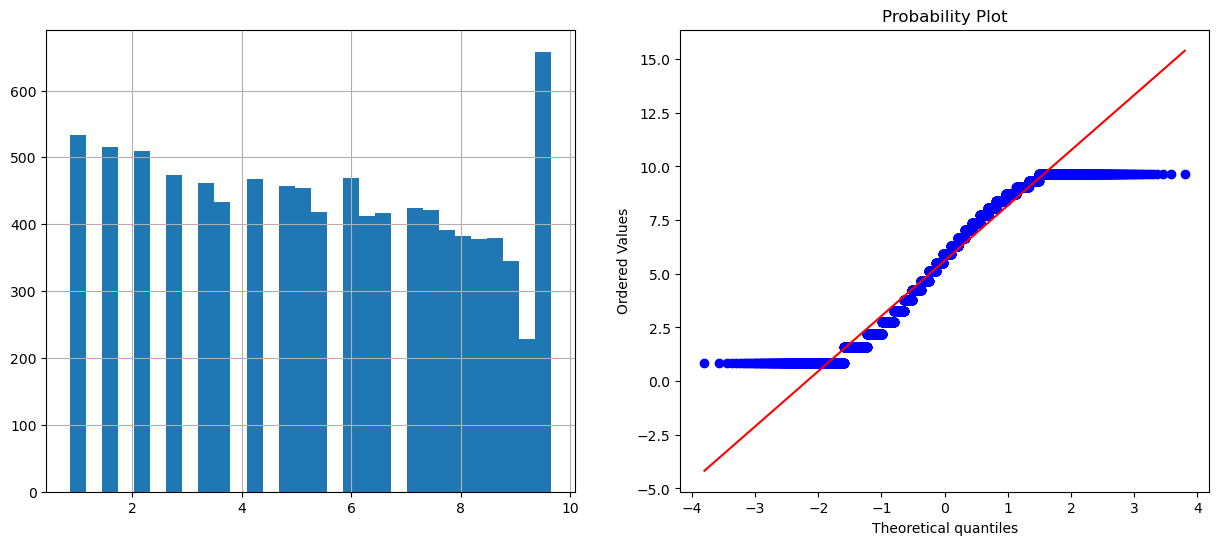

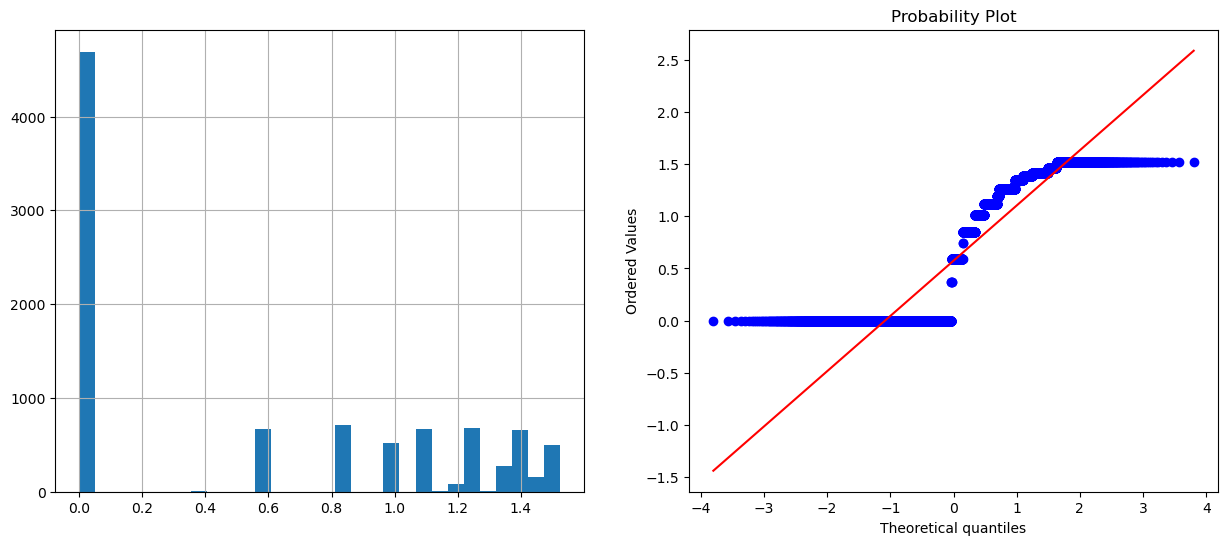

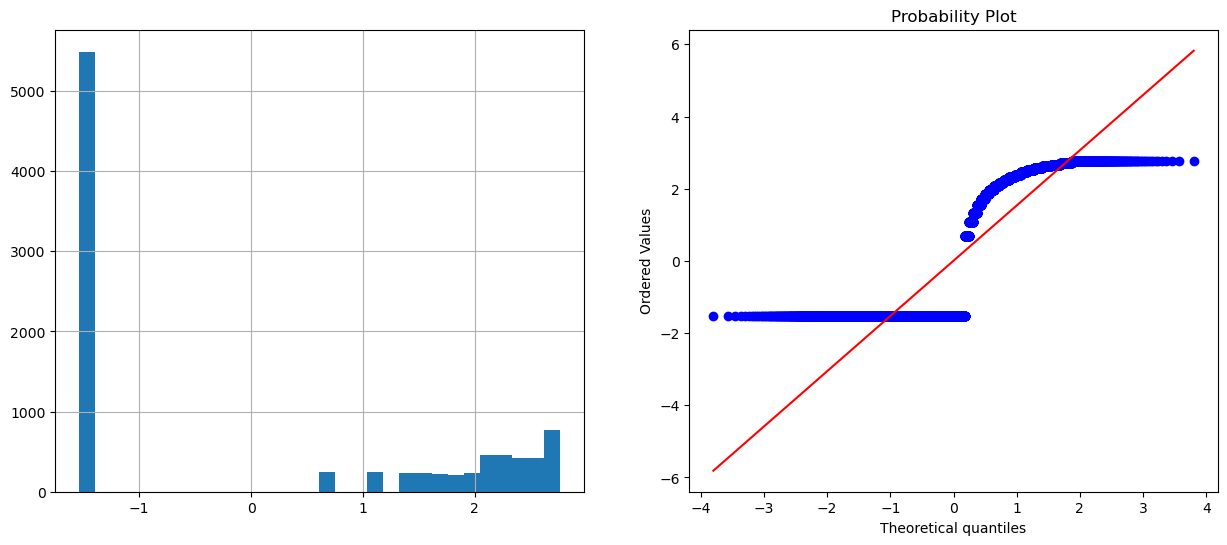

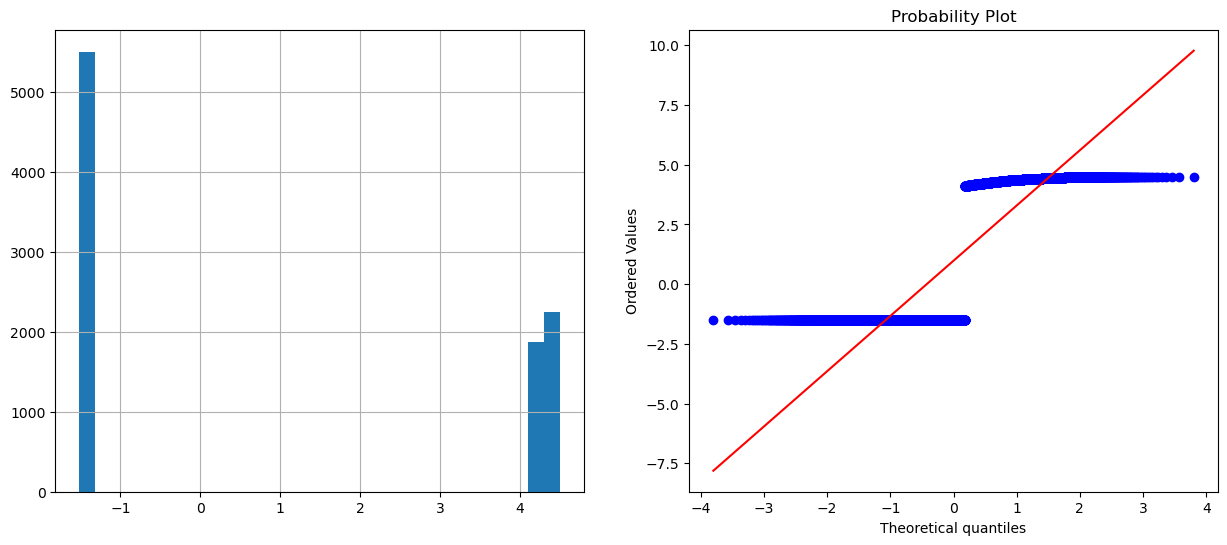

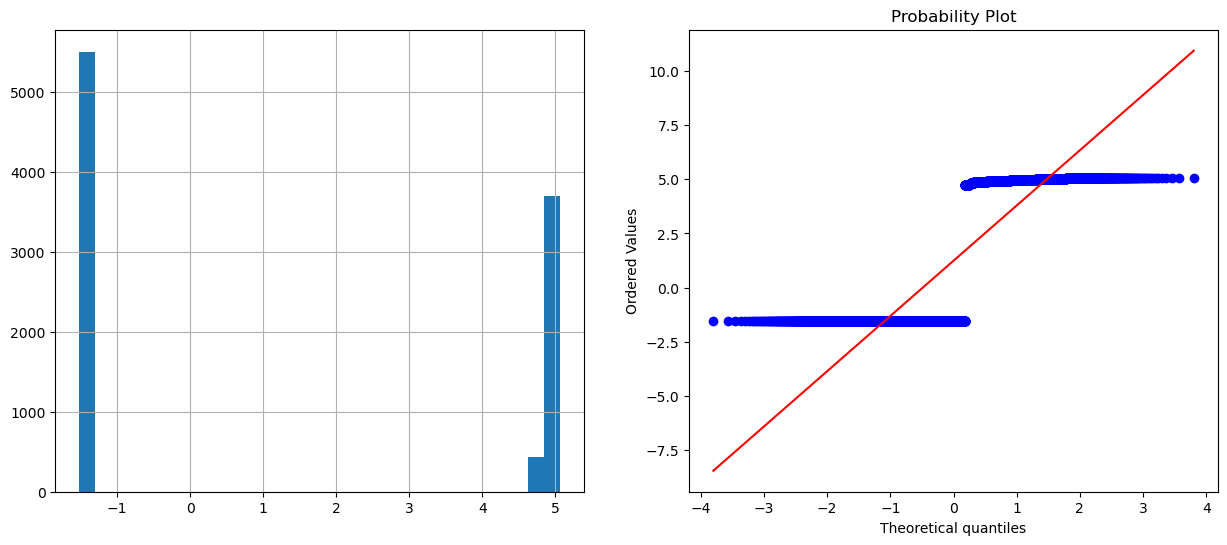

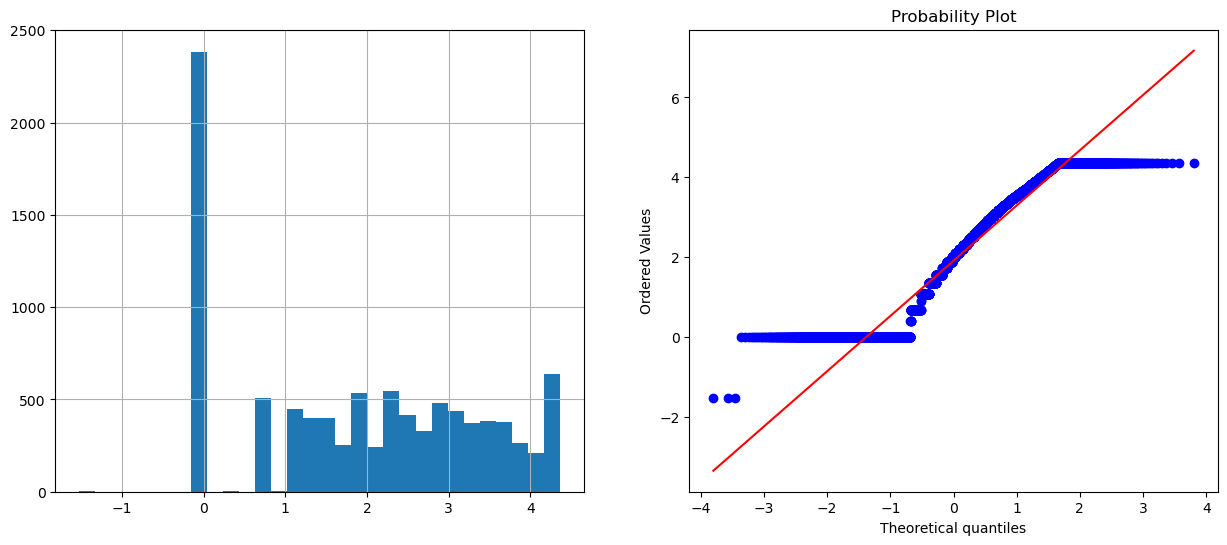

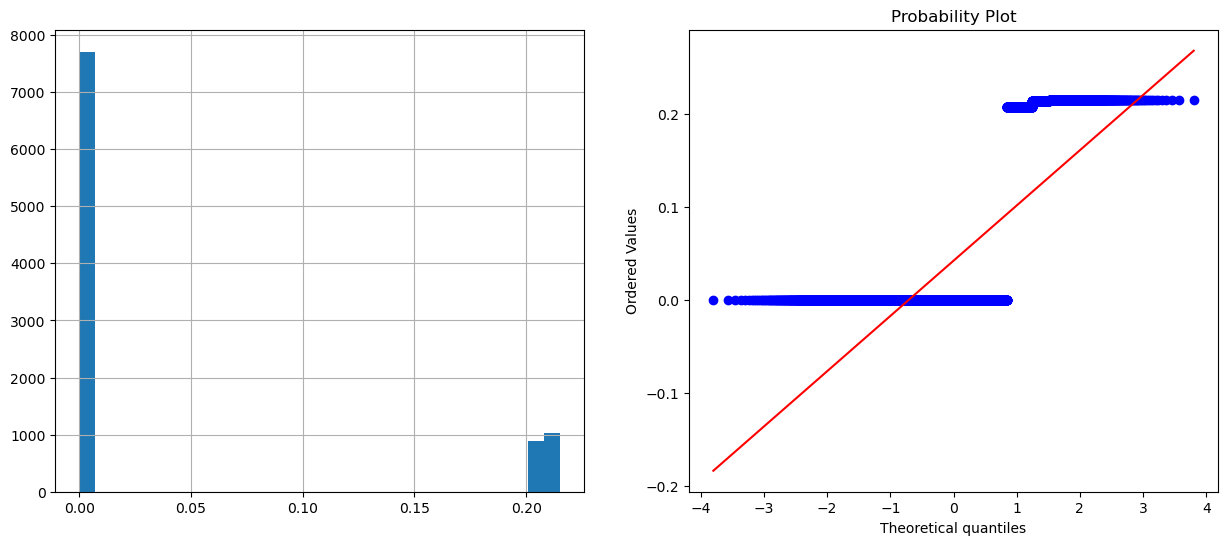

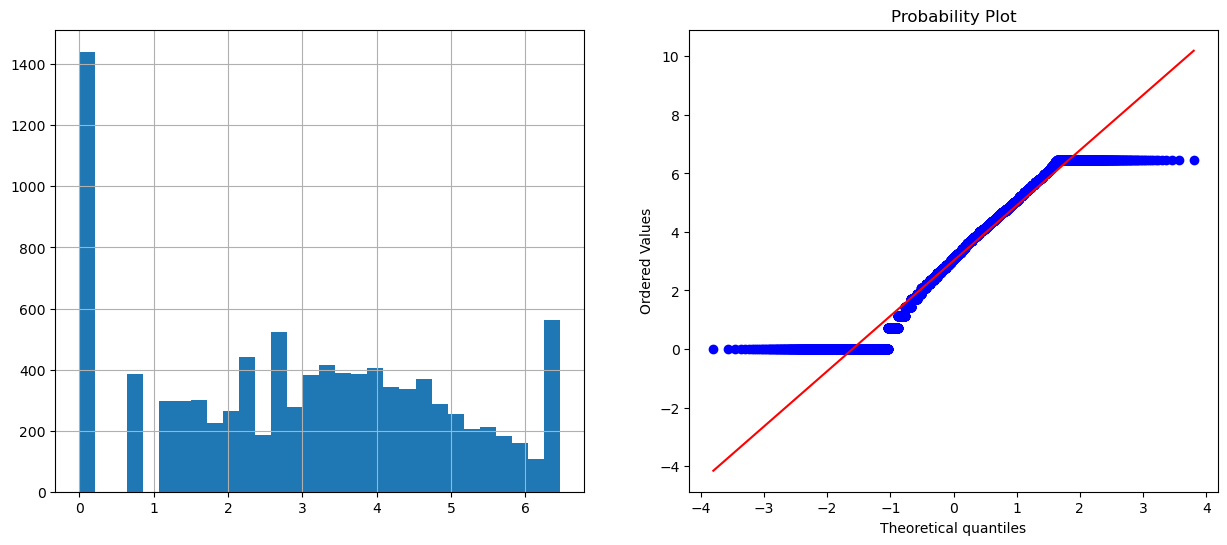

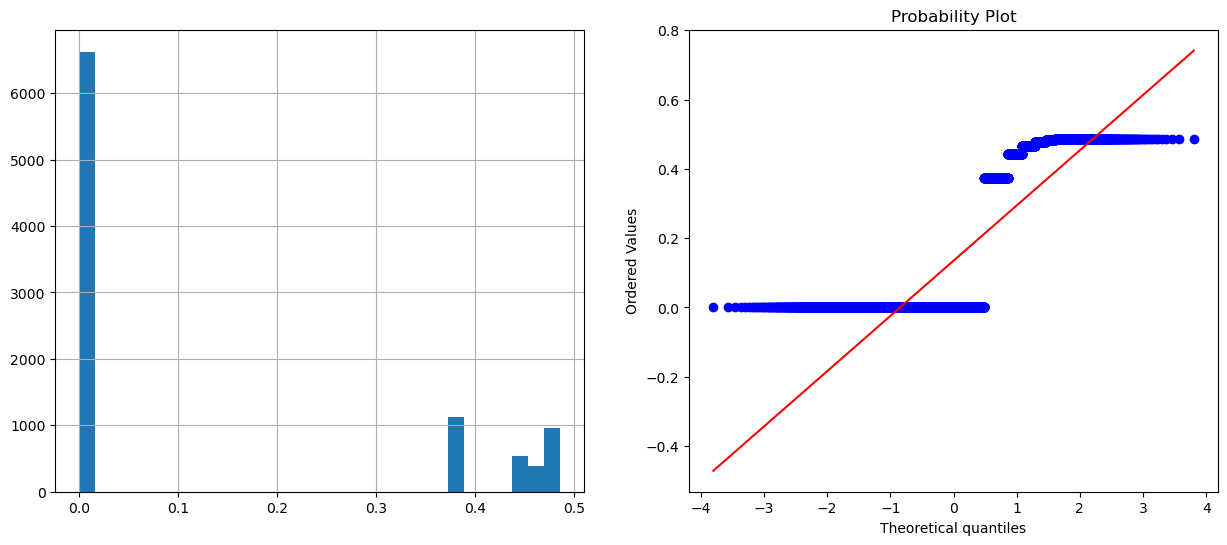

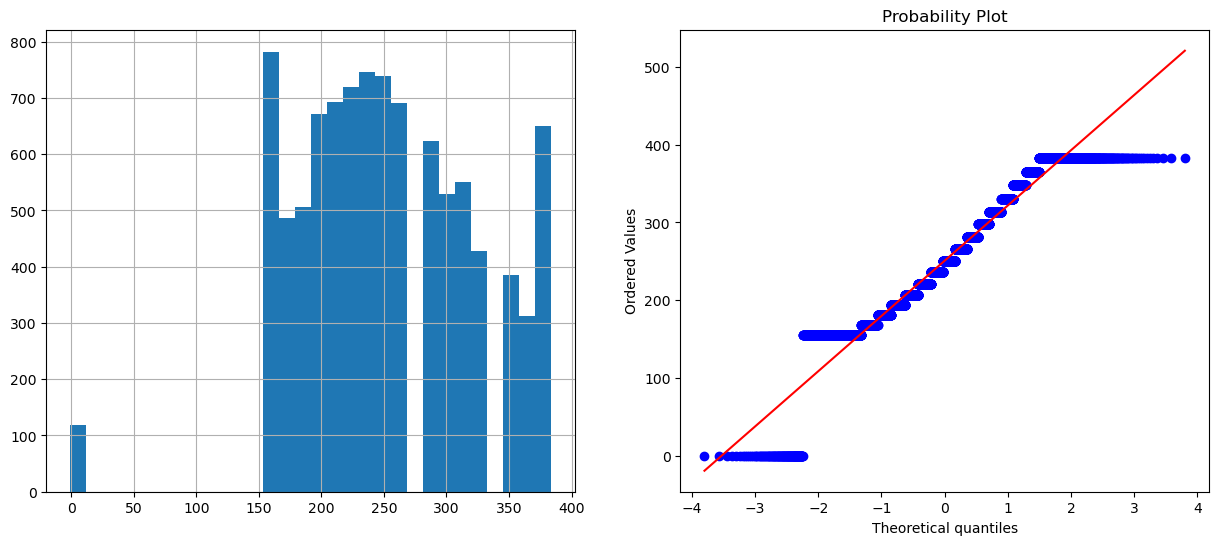

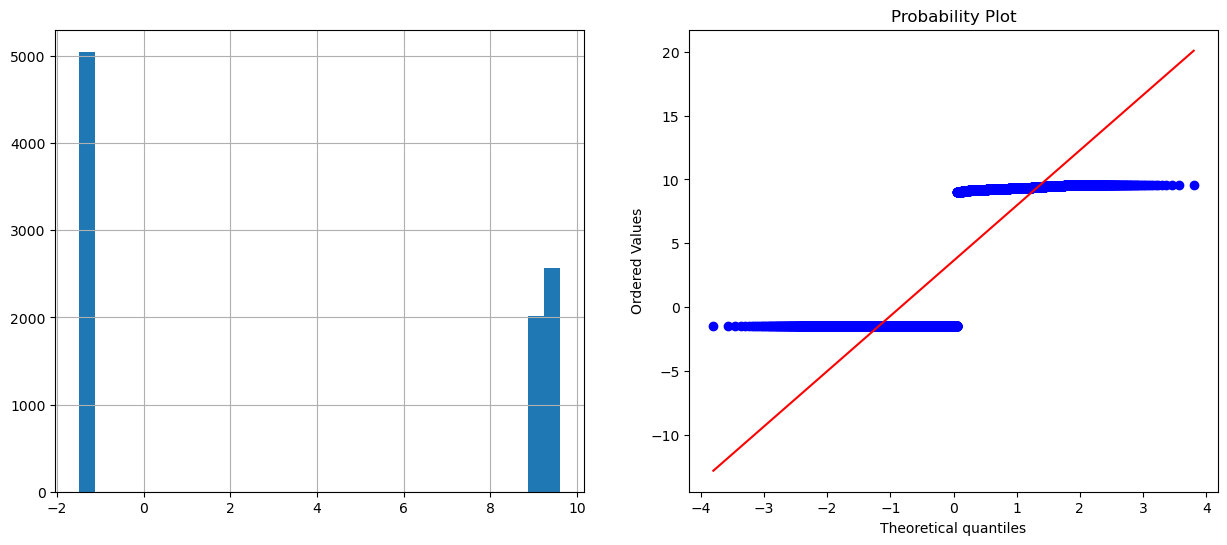

In [69]:
#after
for i in num_cols:
        diagnostic_plots(X_train,i)

Naiive Baseline scores remained the same

Logistic Regression:
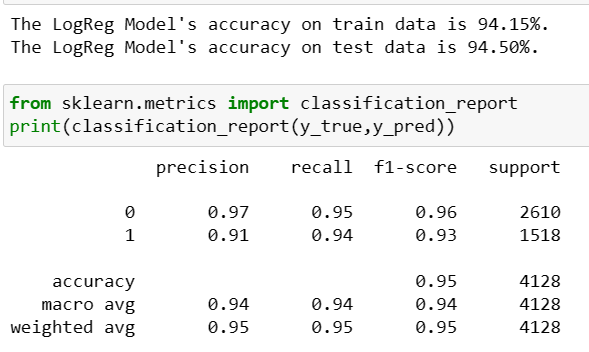

Scaled Logistic Regression:
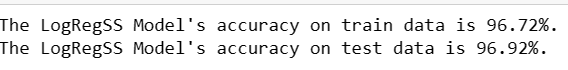

Decision Tree:
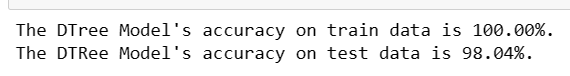

### Logarithmic Transformation

Tried using log transformation, but because I impute my missing values with -1, this transformation was not applicable.
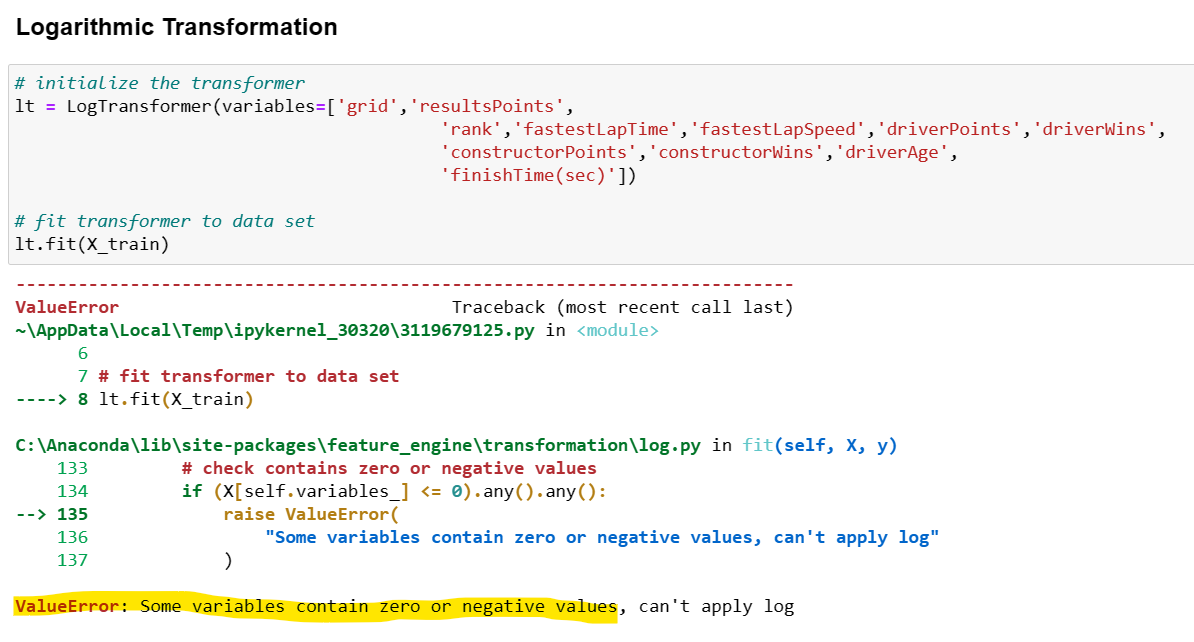


### Box Cox Transformation
Tried using Box Cox as well, but as I have the value 0 in some of my data, it cannot be applied.

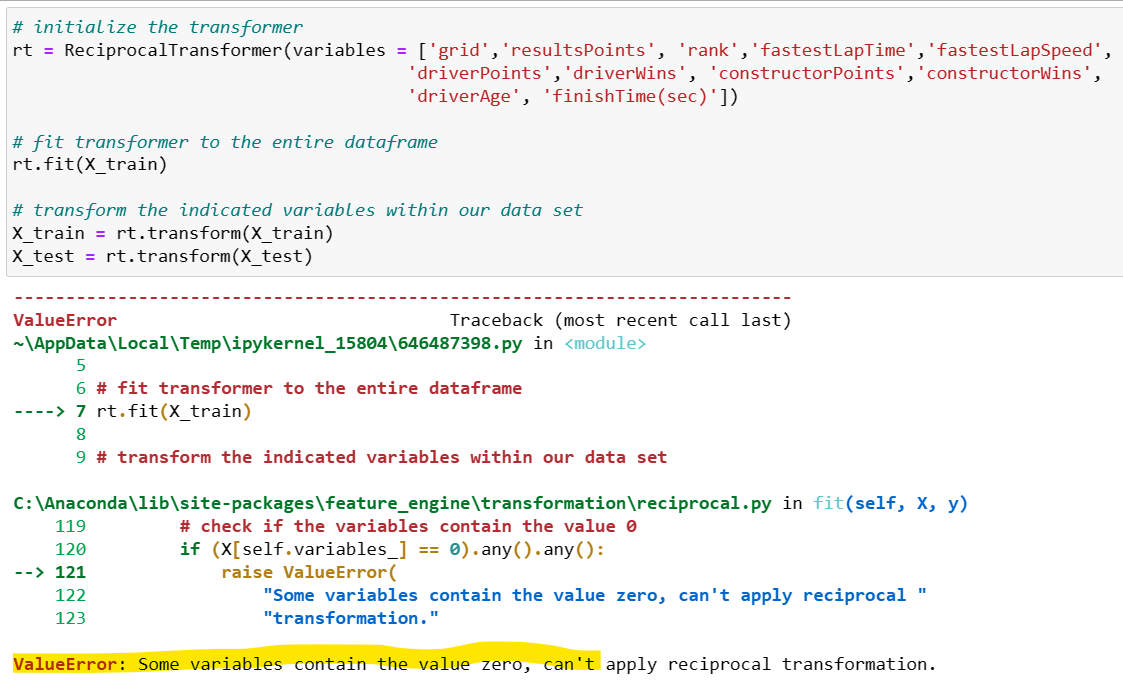

### Transforming Categorical Variables 

### Without Grouping

Without grouping rare categories, this would happen when I attempt to transform them:
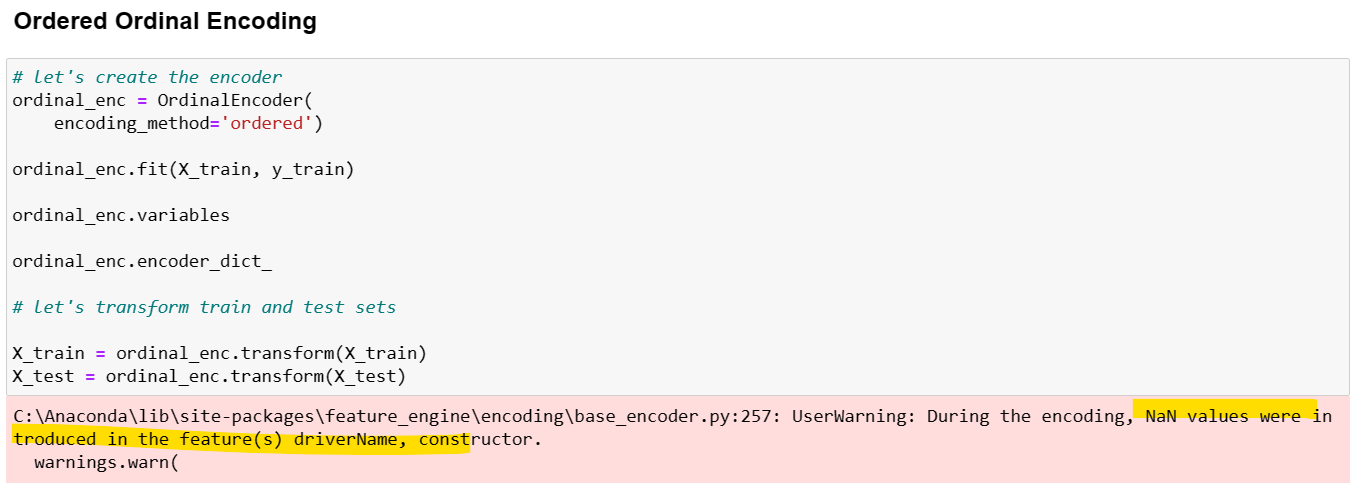

As I have also noticed that these variables have alot of unique values, I decided to introuduce grouping the rare categories together, so that there would not be too much data. Not only may the rare categories be little to the point that it is irrelevent to our prediction, having rare categories can improve the data's quality.

### Grouping rare categories

#### raceName

In [70]:
# let's inspect the frequency of labels in raceName

X_train['raceName'].value_counts() / len(X_train)

British Grand Prix               0.066556
Italian Grand Prix               0.063545
Belgian Grand Prix               0.059392
German Grand Prix                0.057730
French Grand Prix                0.054408
Spanish Grand Prix               0.050877
Monaco Grand Prix                0.050877
Canadian Grand Prix              0.048178
Brazilian Grand Prix             0.046828
Hungarian Grand Prix             0.041013
United States Grand Prix         0.039975
Japanese Grand Prix              0.037795
Austrian Grand Prix              0.032292
Australian Grand Prix            0.030630
European Grand Prix              0.026996
San Marino Grand Prix            0.024193
Dutch Grand Prix                 0.023154
Malaysian Grand Prix             0.022739
Chinese Grand Prix               0.021908
South African Grand Prix         0.021493
Bahrain Grand Prix               0.020559
Mexican Grand Prix               0.019936
Abu Dhabi Grand Prix             0.018897
Portuguese Grand Prix            0

In [71]:
def find_frequent_labels(df, variable, tolerance):
    
    temp = df[variable].value_counts()  / len(df)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

In [72]:
# frequent categories in raceName

frequent_cat = find_frequent_labels(X_train, 'raceName', 0.01)

frequent_cat

['British Grand Prix',
 'Italian Grand Prix',
 'Belgian Grand Prix',
 'German Grand Prix',
 'French Grand Prix',
 'Spanish Grand Prix',
 'Monaco Grand Prix',
 'Canadian Grand Prix',
 'Brazilian Grand Prix',
 'Hungarian Grand Prix',
 'United States Grand Prix',
 'Japanese Grand Prix',
 'Austrian Grand Prix',
 'Australian Grand Prix',
 'European Grand Prix',
 'San Marino Grand Prix',
 'Dutch Grand Prix',
 'Malaysian Grand Prix',
 'Chinese Grand Prix',
 'South African Grand Prix',
 'Bahrain Grand Prix',
 'Mexican Grand Prix',
 'Abu Dhabi Grand Prix',
 'Portuguese Grand Prix',
 'Singapore Grand Prix',
 'Argentine Grand Prix',
 'Turkish Grand Prix']

In [73]:
# let's group rare labels into a new category called rare

X_train['raceName'] = np.where(X_train['raceName'].isin(frequent_cat), X_train['raceName'], 'Rare')
    
X_test['raceName'] = np.where(X_test['raceName'].isin(frequent_cat), X_test['raceName'], 'Rare')

In [74]:
X_train['raceName'].value_counts() / len(X_train)

British Grand Prix          0.066556
Rare                        0.063856
Italian Grand Prix          0.063545
Belgian Grand Prix          0.059392
German Grand Prix           0.057730
French Grand Prix           0.054408
Monaco Grand Prix           0.050877
Spanish Grand Prix          0.050877
Canadian Grand Prix         0.048178
Brazilian Grand Prix        0.046828
Hungarian Grand Prix        0.041013
United States Grand Prix    0.039975
Japanese Grand Prix         0.037795
Austrian Grand Prix         0.032292
Australian Grand Prix       0.030630
European Grand Prix         0.026996
San Marino Grand Prix       0.024193
Dutch Grand Prix            0.023154
Malaysian Grand Prix        0.022739
Chinese Grand Prix          0.021908
South African Grand Prix    0.021493
Bahrain Grand Prix          0.020559
Mexican Grand Prix          0.019936
Abu Dhabi Grand Prix        0.018897
Portuguese Grand Prix       0.017132
Singapore Grand Prix        0.014433
Argentine Grand Prix        0.012564
T

#### driverName

In [75]:
# let's inspect the frequency of labels in driverName

X_train['driverName'].value_counts() / len(X_train)

Kimi Räikkönen        0.020143
Fernando Alonso       0.019936
Lewis Hamilton        0.019624
Michael Schumacher    0.017755
Felipe Massa          0.017340
                        ...   
Ingo Hoffmann         0.000104
André Guelfi          0.000104
David Prophet         0.000104
Fritz d'Orey          0.000104
Horace Gould          0.000104
Name: driverName, Length: 440, dtype: float64

In [76]:
# frequent categories in driverName

frequent_cat = find_frequent_labels(X_train, 'driverName', 0.007)

frequent_cat

['Kimi Räikkönen',
 'Fernando Alonso',
 'Lewis Hamilton',
 'Michael Schumacher',
 'Felipe Massa',
 'Jenson Button',
 'Sebastian Vettel',
 'Rubens Barrichello',
 'Jarno Trulli',
 'Daniel Ricciardo',
 'Sergio Pérez',
 'Nico Rosberg',
 'David Coulthard',
 'Mark Webber',
 'Valtteri Bottas',
 'Giancarlo Fisichella',
 'Riccardo Patrese',
 'Romain Grosjean',
 'Nick Heidfeld',
 'Nico Hülkenberg',
 'Alain Prost',
 'Jean Alesi',
 'Carlos Sainz',
 'Gerhard Berger',
 'Nelson Piquet',
 'Ralf Schumacher',
 'Jacques Villeneuve',
 'Max Verstappen',
 'Ayrton Senna',
 'Michele Alboreto',
 'Niki Lauda',
 'Thierry Boutsen',
 'Mika Häkkinen']

In [77]:
# let's group rare labels into a new category called rare

X_train['driverName'] = np.where(X_train['driverName'].isin(frequent_cat), X_train['driverName'], 'Rare')
    
X_test['driverName'] = np.where(X_test['driverName'].isin(frequent_cat), X_test['driverName'], 'Rare')

#### constructor

In [78]:
# let's inspect the frequency of labels in raceName

X_train['constructor'].value_counts() / len(X_train)

Ferrari          0.104247
McLaren          0.090956
Williams         0.081092
Sauber           0.038937
Red Bull         0.038210
                   ...   
Stebro           0.000104
Eagle-Weslake    0.000104
Scirocco         0.000104
Tecno            0.000104
Boro             0.000104
Name: constructor, Length: 117, dtype: float64

In [79]:
# frequent categories in constructor

frequent_cat = find_frequent_labels(X_train, 'constructor', 0.005)

frequent_cat

['Ferrari',
 'McLaren',
 'Williams',
 'Sauber',
 'Red Bull',
 'Renault',
 'Team Lotus',
 'Tyrrell',
 'Mercedes',
 'Toro Rosso',
 'Force India',
 'Benetton',
 'Minardi',
 'Brabham',
 'Ligier',
 'Arrows',
 'BRM',
 'Jordan',
 'Toyota',
 'March',
 'Haas F1 Team',
 'Alfa Romeo',
 'Cooper-Climax',
 'BAR',
 'Lotus-Climax',
 'Surtees',
 'Lotus F1',
 'BMW Sauber',
 'Shadow',
 'Honda',
 'Prost',
 'Larrousse',
 'Marussia',
 'Caterham',
 'Jaguar',
 'Footwork',
 'HRT']

In [80]:
# let's group rare labels into a new category called rare

X_train['constructor'] = np.where(X_train['constructor'].isin(frequent_cat), X_train['constructor'], 'Rare')
    
X_test['constructor'] = np.where(X_test['constructor'].isin(frequent_cat), X_test['constructor'], 'Rare')

### Target Mean Encoding

In [81]:
num_cols = [n for n in X_train.columns if X_train[n].dtypes!='O']
cat_cols= X_train.columns.drop(num_cols)

In [82]:
cat_cols

Index(['driverName', 'constructor', 'raceName'], dtype='object')

#### let's create the encoder

mean_enc = MeanEncoder(variables=None)

mean_enc.fit(X_train, y_train)
#### in the encoder dict we can observe the target mean per category
#### per variable

mean_enc.encoder_dict_


#### let's transform train and test set

X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

Logistic Regression: 
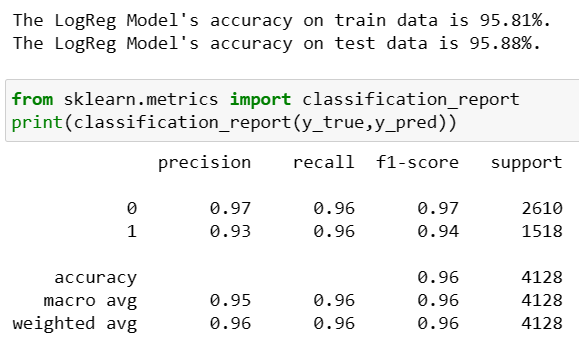

Scaled Logistic Regression:
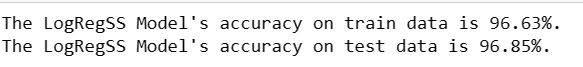

Decision Tree:
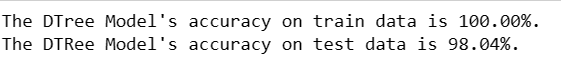

### Ordered Ordinal Encoding

In [83]:
# let's create the encoder
ordinal_enc = OrdinalEncoder(
    encoding_method='ordered')

ordinal_enc.fit(X_train, y_train)

ordinal_enc.variables

ordinal_enc.encoder_dict_

# let's transform train and test sets

X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

In [84]:
ordinal_enc.encoder_dict_

{'driverName': {'Romain Grosjean': 0,
  'Nico Hülkenberg': 1,
  'Carlos Sainz': 2,
  'Nick Heidfeld': 3,
  'Sergio Pérez': 4,
  'Jarno Trulli': 5,
  'Rare': 6,
  'Giancarlo Fisichella': 7,
  'Daniel Ricciardo': 8,
  'Jacques Villeneuve': 9,
  'Jenson Button': 10,
  'Thierry Boutsen': 11,
  'Felipe Massa': 12,
  'Michele Alboreto': 13,
  'Nico Rosberg': 14,
  'Mark Webber': 15,
  'Rubens Barrichello': 16,
  'Jean Alesi': 17,
  'Ralf Schumacher': 18,
  'Riccardo Patrese': 19,
  'Kimi Räikkönen': 20,
  'David Coulthard': 21,
  'Fernando Alonso': 22,
  'Valtteri Bottas': 23,
  'Gerhard Berger': 24,
  'Max Verstappen': 25,
  'Mika Häkkinen': 26,
  'Sebastian Vettel': 27,
  'Nelson Piquet': 28,
  'Niki Lauda': 29,
  'Michael Schumacher': 30,
  'Lewis Hamilton': 31,
  'Ayrton Senna': 32,
  'Alain Prost': 33},
 'constructor': {'HRT': 0,
  'Marussia': 1,
  'Caterham': 2,
  'Haas F1 Team': 3,
  'Larrousse': 4,
  'Minardi': 5,
  'Toro Rosso': 6,
  'Prost': 7,
  'Footwork': 8,
  'Alfa Romeo': 9,
 

Logistic Regression: 
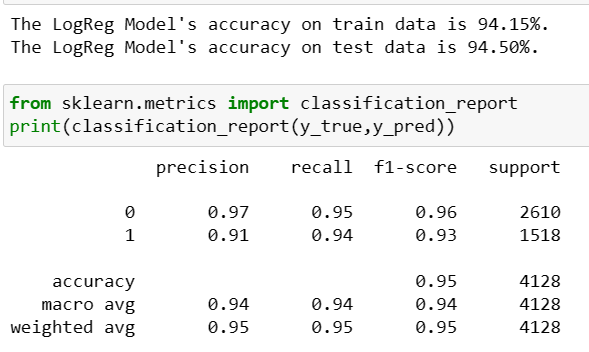

Scaled Logistic Regression:
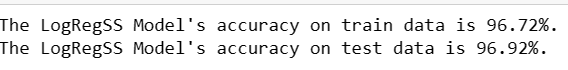

Decision Tree:
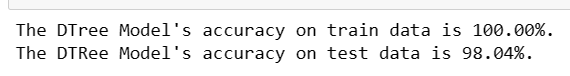

### Variable Discretization /Binning
to reduce noise for nonlinear relationships

### Equal Width Discretization

In [85]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [86]:
num_cols = [n for n in X_train.columns if X_train[n].dtypes!='O']
num_cols

['grid',
 'resultsPoints',
 'rank',
 'fastestLapTime',
 'fastestLapSpeed',
 'driverName',
 'driverPoints',
 'driverWins',
 'constructor',
 'constructorPoints',
 'constructorWins',
 'raceName',
 'driverAge',
 'finishTime(sec)']

In [87]:
# function to create histogram, Q-Q plot and
# boxplot.


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(13, 3))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    plt.show()

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


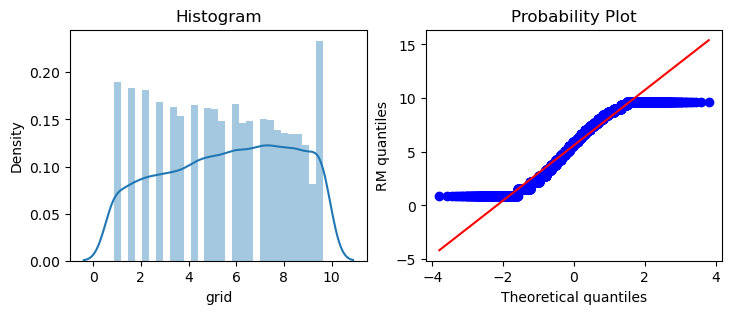

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


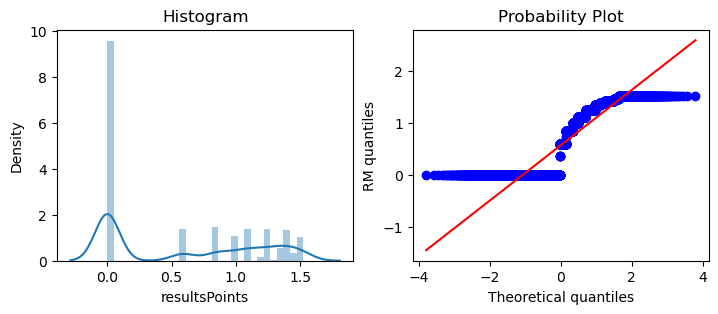

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


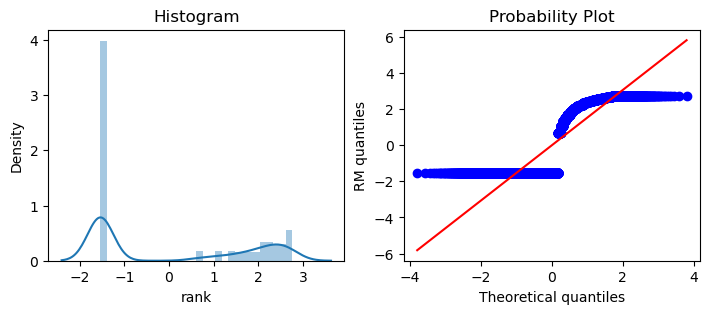

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


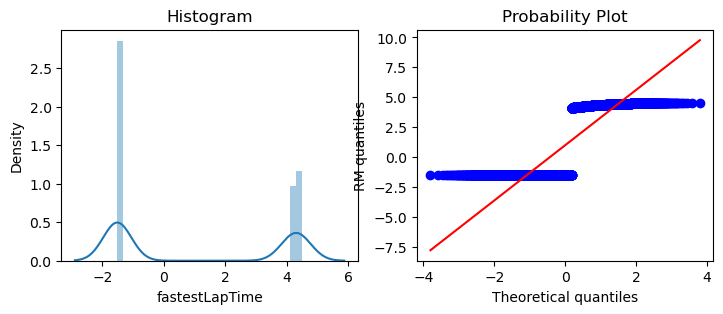

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


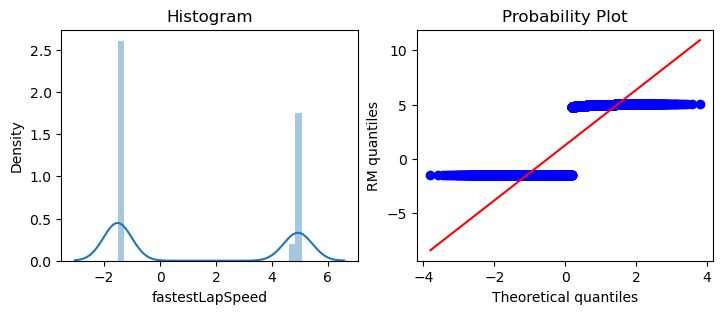

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


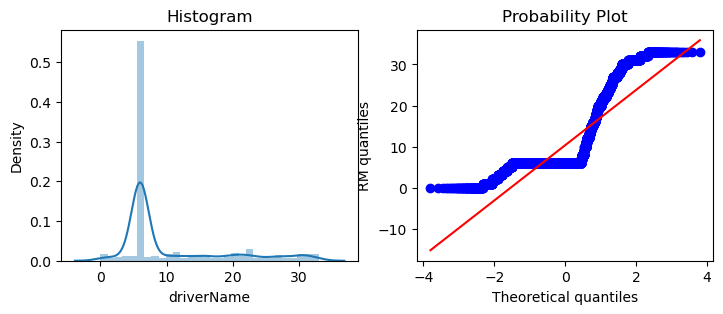

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


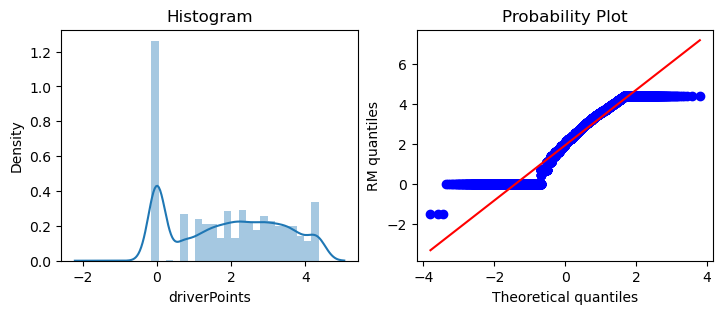

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


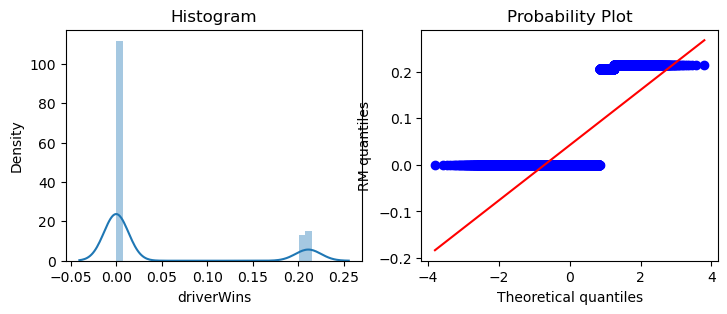

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


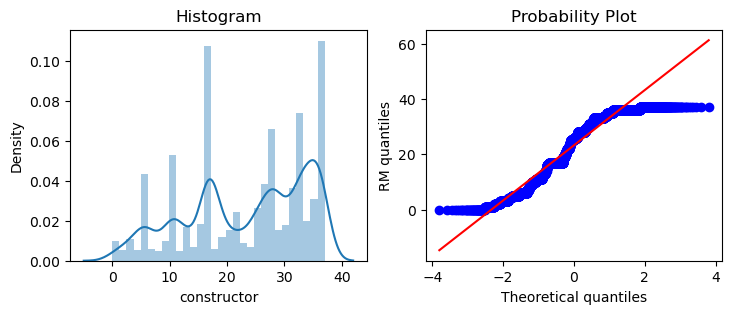

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


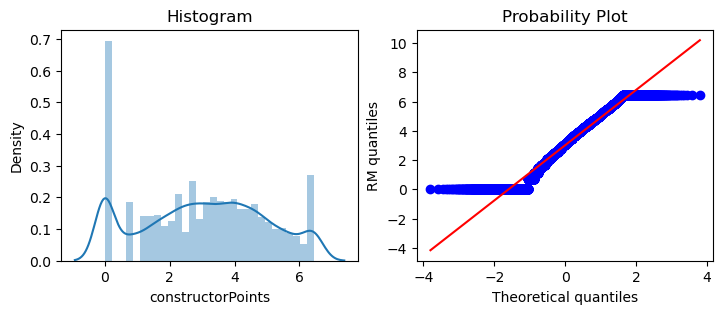

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


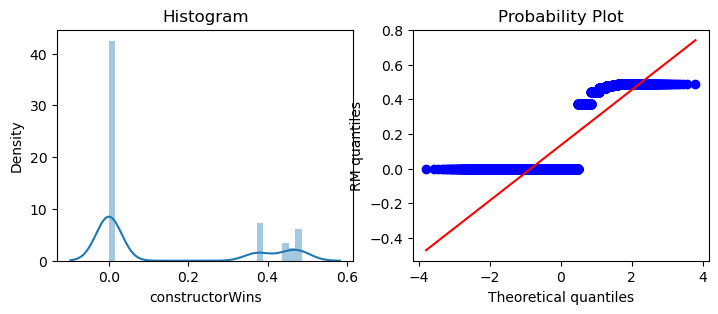

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


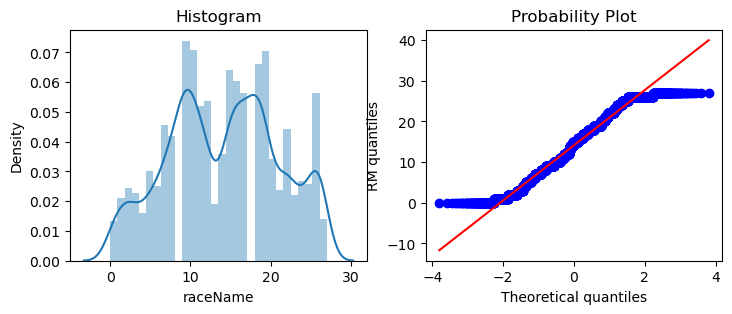

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


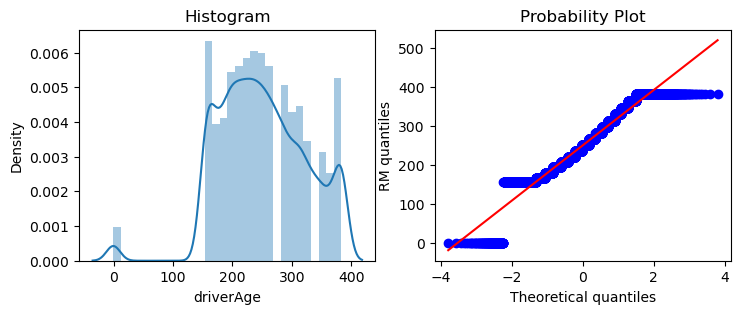

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


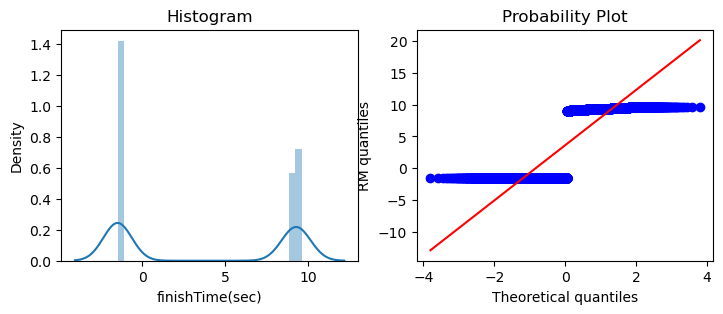

In [88]:
for i in num_cols:
        diagnostic_plots(X_train,i)

In [89]:
from feature_engine.discretisation import EqualWidthDiscretiser
disc = EqualWidthDiscretiser(bins=10, variables = ['resultsPoints','rank','fastestLapSpeed',
                                                  'driverWins','constructorWins','finishTime(sec)'])

disc.fit(X_train)
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


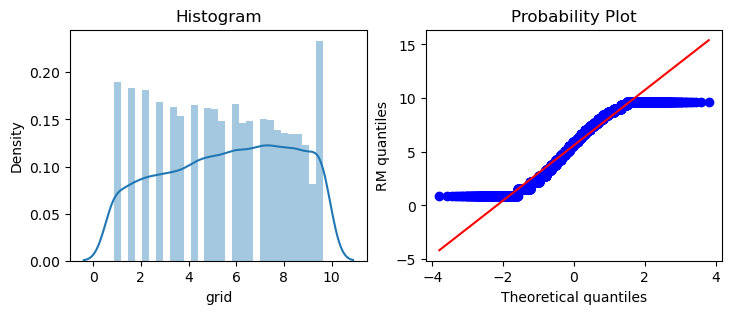

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


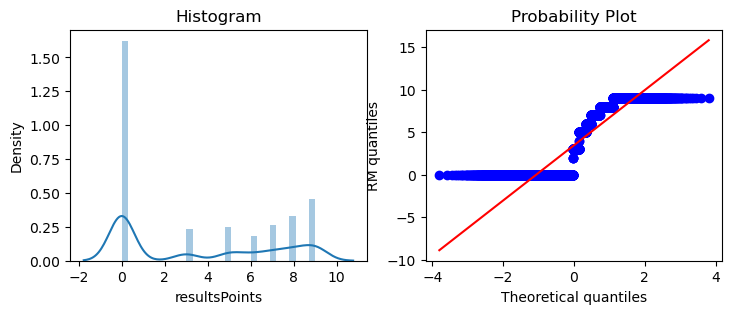

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


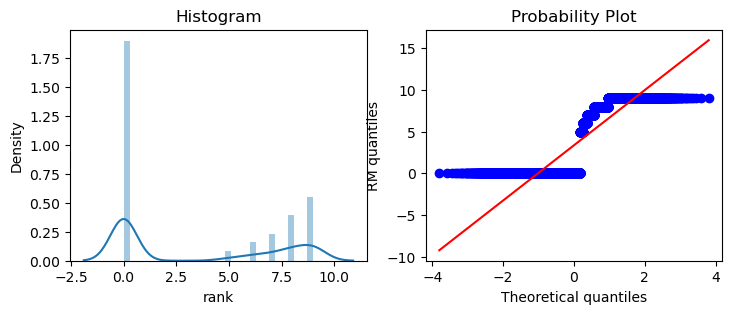

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


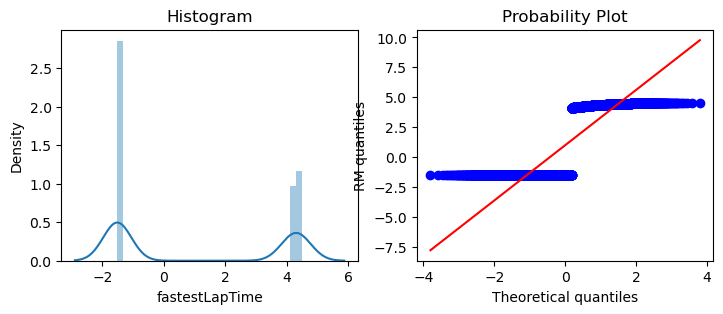

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


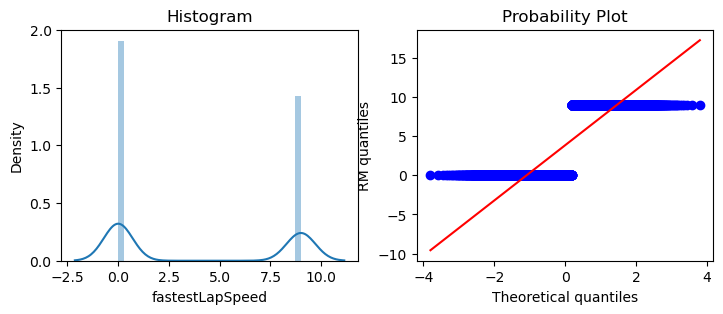

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


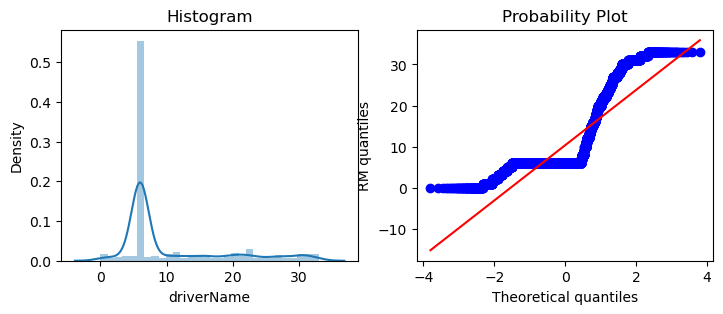

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


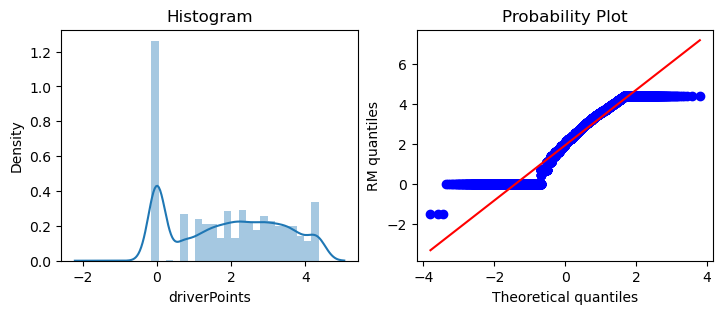

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


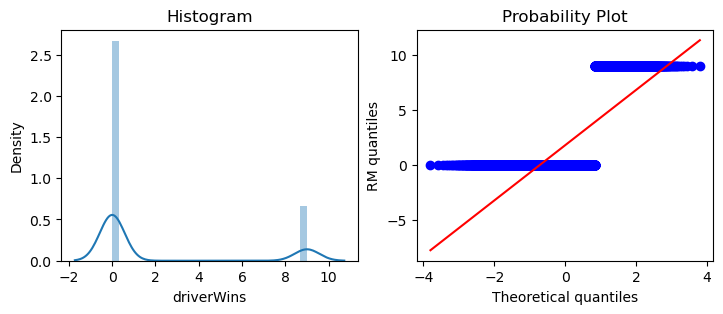

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


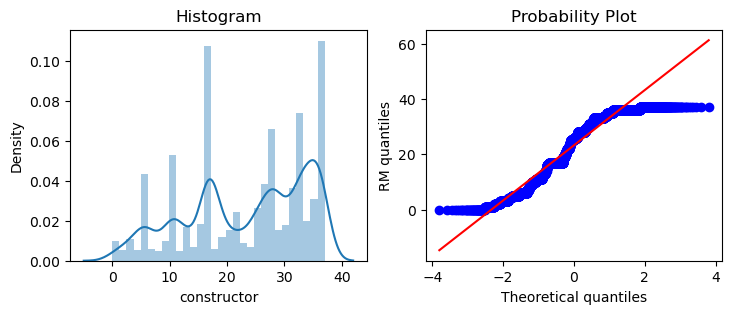

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


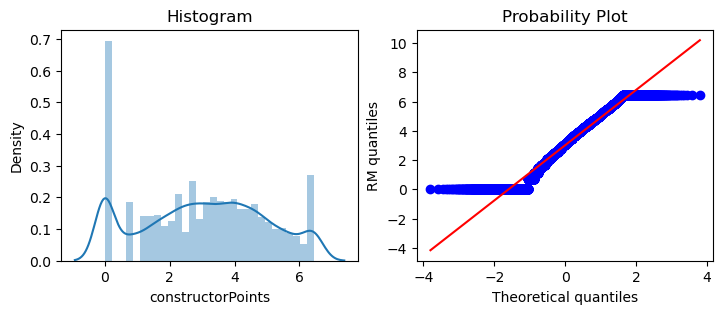

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


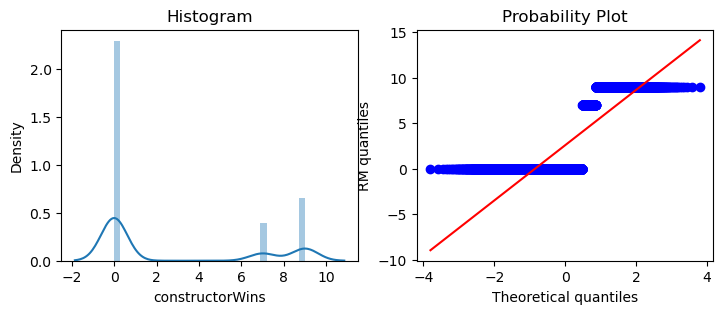

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


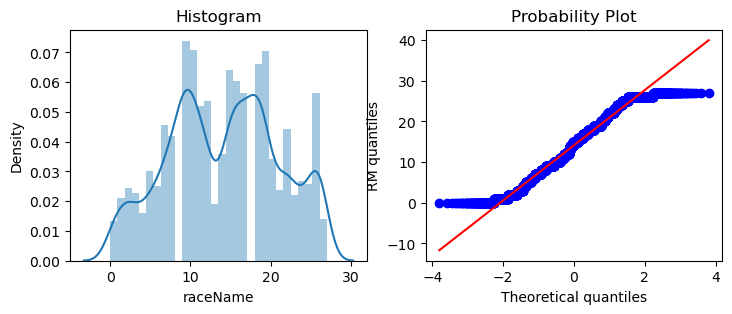

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


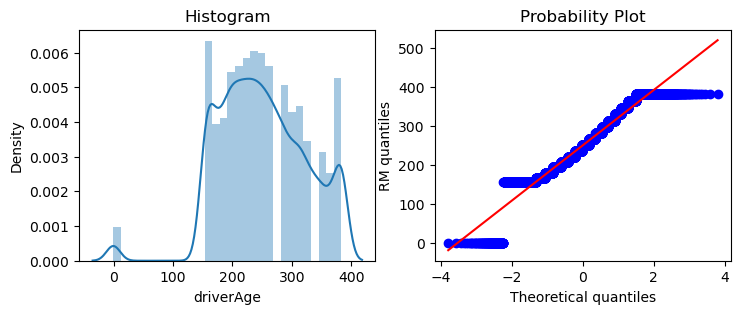

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


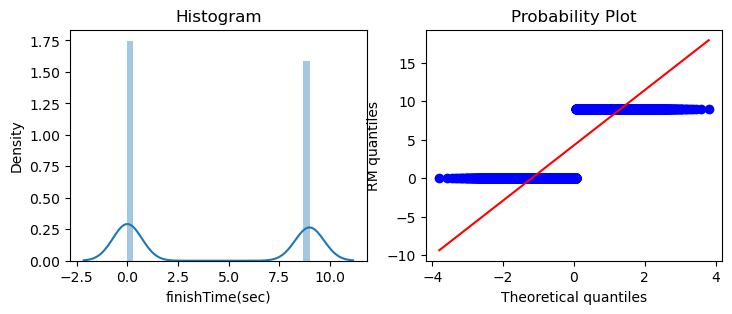

In [90]:
for i in num_cols:
        diagnostic_plots(X_train,i)

Logistic Regression:
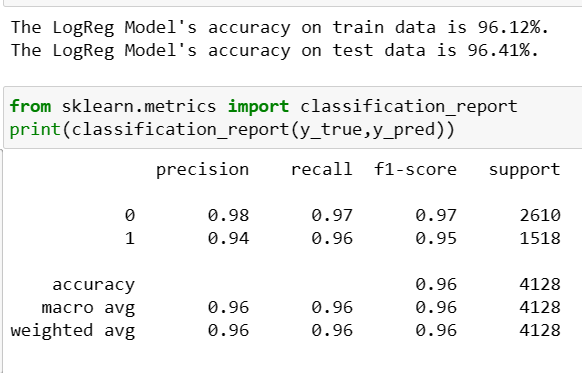

Scaled Logistic Regression:
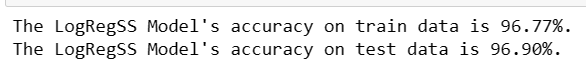

Decision Tree:
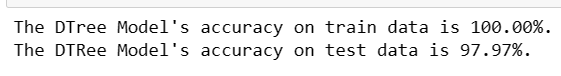

### Equal Frequency

disc = EqualFrequencyDiscretiser(q=10, variables = ['resultsPoints','rank','fastestLapTime','fastestLapSpeed',
                                                  'driverWins','constructorWins','finishTime(sec)'])

disc.fit(X_train)

#### transform train and test sets

X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

Logistic Regression:
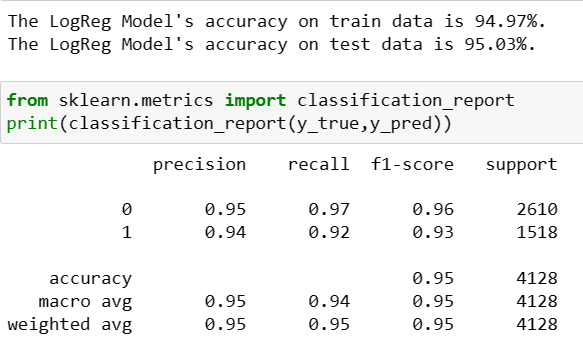

Scaled Logistic Regression:
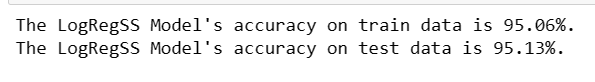

Decision Tree:
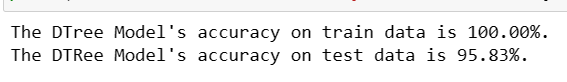

Equal Width was used in the end as it has a higher model performance

### Scaling

### MinMax Scaling

In [91]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
# the scaler stores the maximum values of the features, learned from train set
scaler.data_max_

array([  9.6438054 ,   9.        ,   9.        ,   4.49539717,
         9.        ,  33.        ,   4.35834798,   9.        ,
        37.        ,   6.46091439,   9.        ,  27.        ,
       383.3686065 ,   9.        ])

In [93]:
# tthe scaler stores the minimum values of the features, learned from train set
scaler.min_

array([-0.09862413,  0.        ,  0.        ,  0.25183797,  0.        ,
        0.        ,  0.25895832,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00193771,  0.        ])

In [94]:
# the scaler also stores the value range (max -  min)

scaler.data_range_

array([  8.77807536,   9.        ,   9.        ,   6.00858769,
         9.        ,  33.        ,   5.88138036,   9.        ,
        37.        ,   6.46091439,   9.        ,  27.        ,
       384.1129048 ,   9.        ])

In [95]:
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train = X_train_scaled
X_test = X_test_scaled

Logistic Regression:
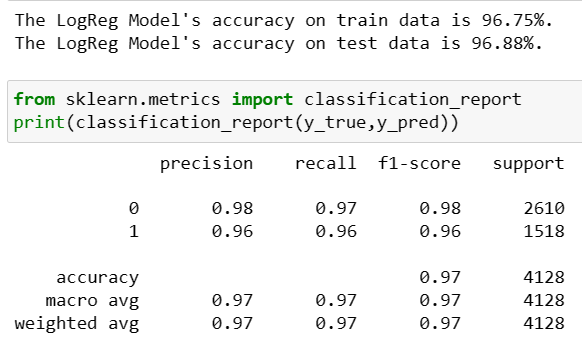

Scaled Regression Model:
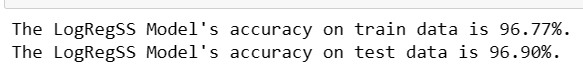

Decision Tree:
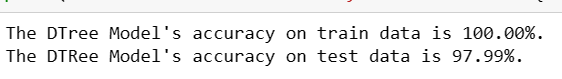

### Robust Scaling

#### set up the scaler
scaler = RobustScaler()

#### fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

#### transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### the scaler stores the median values of the features as learned from train set
scaler.center_

#### the scaler stores the IQR values of the features as learned from train set

scaler.scale_

#### let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train = X_train_scaled
X_test = X_test_scaled

Logistic Regression:
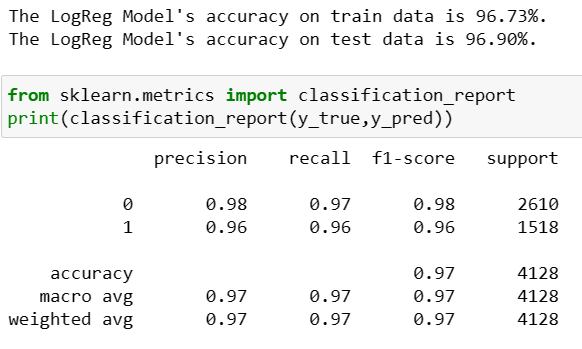

Scaled Logistic Regression:
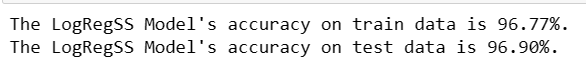

Decision Tree:
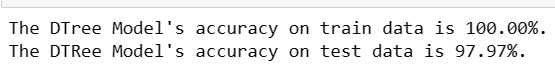

# Polynomial Expansion

In [96]:
from sklearn.preprocessing import PolynomialFeatures

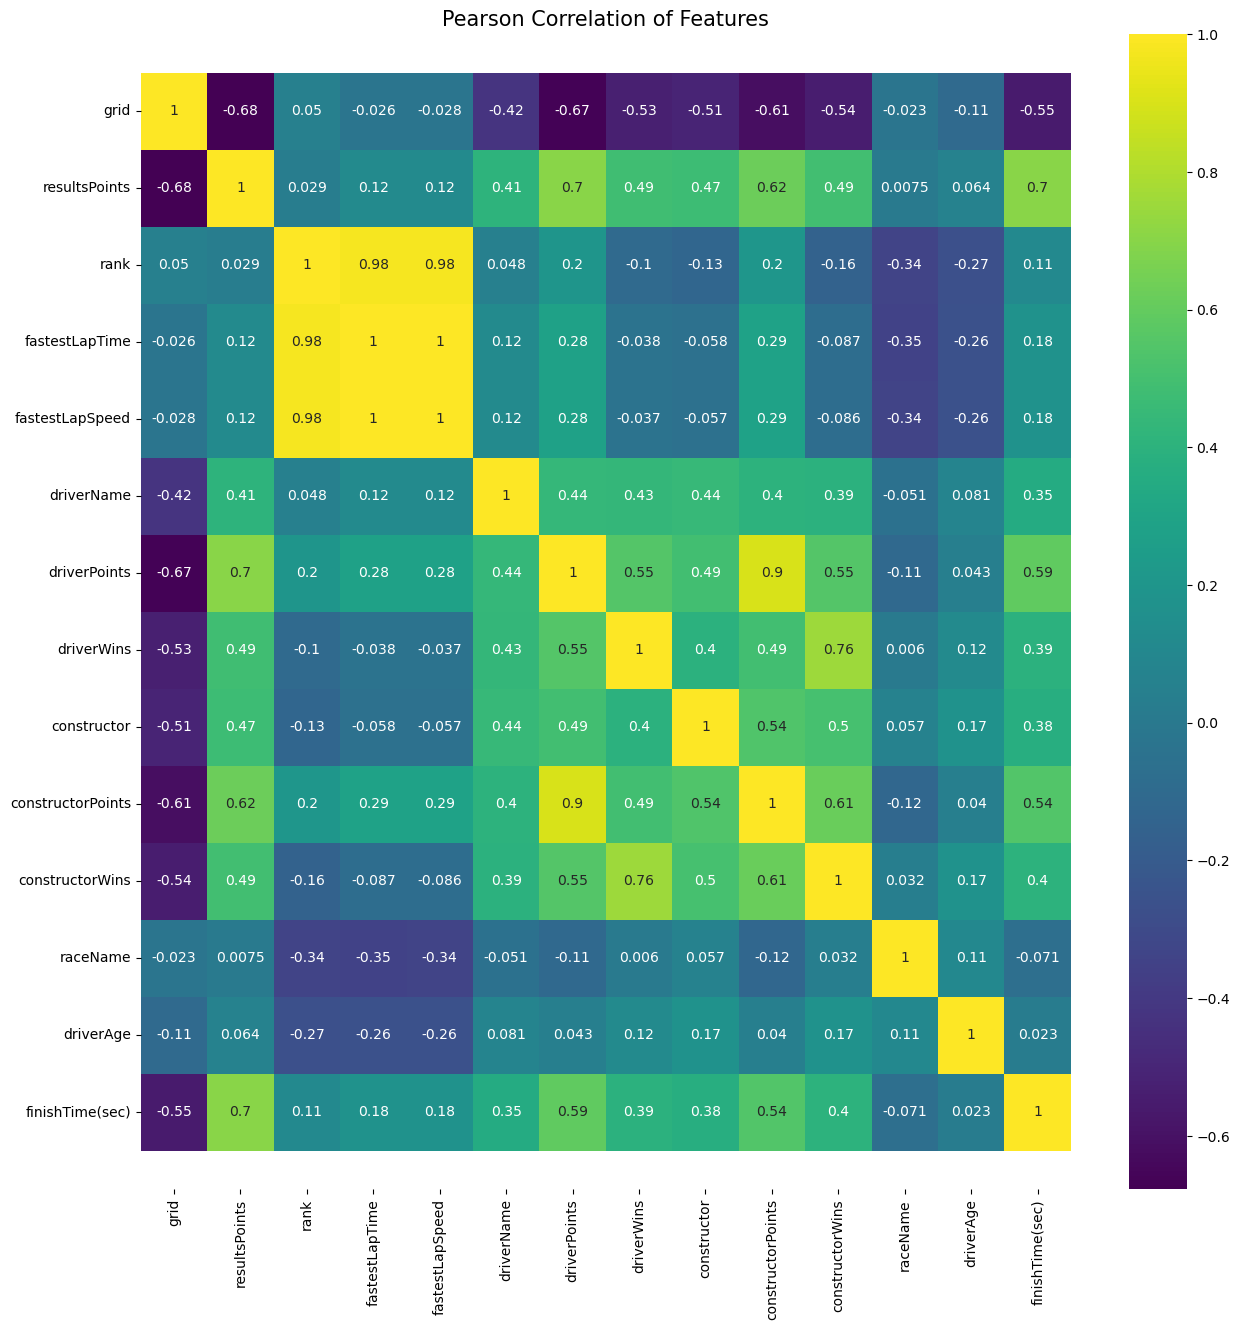

In [97]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(X_train.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [98]:
# set up the polynomial expansion transformer

poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

# train the polynomial expansion transformer

poly.fit(X_train[['resultsPoints', 'constructorPoints', 'driverPoints']])

PolynomialFeatures(degree=3, include_bias=False)

In [99]:
# create the new features

train_t = poly.transform(X_train[['resultsPoints', 'constructorPoints', 'driverPoints']])
test_t = poly.transform(X_test[['resultsPoints', 'constructorPoints', 'driverPoints']])

# visualise the name of the created features

poly.get_feature_names(['resultsPoints', 'constructorPoints', 'driverPoints'])

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['resultsPoints',
 'constructorPoints',
 'driverPoints',
 'resultsPoints^2',
 'resultsPoints constructorPoints',
 'resultsPoints driverPoints',
 'constructorPoints^2',
 'constructorPoints driverPoints',
 'driverPoints^2',
 'resultsPoints^3',
 'resultsPoints^2 constructorPoints',
 'resultsPoints^2 driverPoints',
 'resultsPoints constructorPoints^2',
 'resultsPoints constructorPoints driverPoints',
 'resultsPoints driverPoints^2',
 'constructorPoints^3',
 'constructorPoints^2 driverPoints',
 'constructorPoints driverPoints^2',
 'driverPoints^3']

In [100]:
# capture the returned features in a dataframe
test_t = pd.DataFrame(test_t)

# add column names of created features
test_t.columns = poly.get_feature_names(['resultsPoints', 'constructorPoints', 'driverPoints'])


test_t.head()

resultsPoints  constructorPoints  driverPoints  resultsPoints^2  \
0       0.000000           0.320312      0.258958         0.000000   
1       0.555556           0.224161      0.442121         0.308642   
2       0.000000           0.000000      0.258958         0.000000   
3       0.000000           0.364601      0.258958         0.000000   
4       0.000000           0.262097      0.258958         0.000000   

   resultsPoints constructorPoints  resultsPoints driverPoints  \
0                         0.000000                    0.000000   
1                         0.124534                    0.245623   
2                         0.000000                    0.000000   
3                         0.000000                    0.000000   
4                         0.000000                    0.000000   

   constructorPoints^2  constructorPoints driverPoints  driverPoints^2  \
0             0.102600                        0.082947        0.067059   
1             0.050248                        0.099106        0.195471   
2             0.000000                        0.000000        0.067059   
3             0.132934                        0.094416        0.067059   
4             0.068695                        0.067872        0.067059   

   resultsPoints^3  resultsPoints^2 constructorPoints  \
0         0.000000                           0.000000   
1         0.171468                           0.069185   
2         0.000000                           0.000000   
3         0.000000                           0.000000   
4         0.000000                           0.000000   

   resultsPoints^2 driverPoints  resultsPoints constructorPoints^2  \
0                      0.000000                           0.000000   
1                      0.136457                           0.027916   
2                      0.000000                           0.000000   
3                      0.000000                           0.000000   
4                      0.000000                           0.000000   

   resultsPoints constructorPoints driverPoints  resultsPoints driverPoints^2  \
0                                      0.000000                      0.000000   
1                                      0.055059                      0.108595   
2                                      0.000000                      0.000000   
3                                      0.000000                      0.000000   
4                                      0.000000                      0.000000   

   constructorPoints^3  constructorPoints^2 driverPoints  \
0             0.032864                          0.026569   
1             0.011264                          0.022216   
2             0.000000                          0.000000   
3             0.048468                          0.034424   
4             0.018005                          0.017789   

   constructorPoints driverPoints^2  driverPoints^3  
0                          0.021480        0.017366  
1                          0.043817        0.086422  
2                          0.000000        0.017366  
3                          0.024450        0.017366  
4                          0.017576        0.017366

In [101]:
# capture the returned features in a dataframe
train_t = pd.DataFrame(train_t)

# add column names of created features
train_t.columns = poly.get_feature_names(['resultsPoints', 'constructorPoints', 'driverPoints'])

train_t

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


resultsPoints  constructorPoints  driverPoints  resultsPoints^2  \
0          0.888889           0.817832      0.842676         0.790123   
1          1.000000           0.593012      0.649627         1.000000   
2          0.666667           0.224161      0.488903         0.444444   
3          0.000000           0.109647      0.258958         0.000000   
4          0.000000           0.000000      0.258958         0.000000   
...             ...                ...           ...              ...   
9626       0.000000           0.705056      0.375360         0.000000   
9627       0.000000           0.000000      0.258958         0.000000   
9628       0.666667           0.456802      0.599659         0.444444   
9629       0.333333           0.621847      0.663181         0.111111   
9630       0.888889           0.586725      0.734066         0.790123   

      resultsPoints constructorPoints  resultsPoints driverPoints  \
0                            0.726962                    0.749046   
1                            0.593012                    0.649627   
2                            0.149440                    0.325935   
3                            0.000000                    0.000000   
4                            0.000000                    0.000000   
...                               ...                         ...   
9626                         0.000000                    0.000000   
9627                         0.000000                    0.000000   
9628                         0.304535                    0.399772   
9629                         0.207282                    0.221060   
9630                         0.521533                    0.652503   

      constructorPoints^2  constructorPoints driverPoints  driverPoints^2  \
0                0.668850                        0.689168        0.710103   
1                0.351663                        0.385237        0.422015   
2                0.050248                        0.109593        0.239026   
3                0.012022                        0.028394        0.067059   
4                0.000000                        0.000000        0.067059   
...                   ...                             ...             ...   
9626             0.497104                        0.264650        0.140895   
9627             0.000000                        0.000000        0.067059   
9628             0.208668                        0.273925        0.359590   
9629             0.386693                        0.412397        0.439809   
9630             0.344246                        0.430695        0.538853   

      resultsPoints^3  resultsPoints^2 constructorPoints  \
0            0.702332                           0.646189   
1            1.000000                           0.593012   
2            0.296296                           0.099627   
3            0.000000                           0.000000   
4            0.000000                           0.000000   
...               ...                                ...   
9626         0.000000                           0.000000   
9627         0.000000                           0.000000   
9628         0.296296                           0.203023   
9629         0.037037                           0.069094   
9630         0.702332                           0.463585   

      resultsPoints^2 driverPoints  resultsPoints constructorPoints^2  \
0                         0.665818                           0.594533   
1                         0.649627                           0.351663   
2                         0.217290                           0.033499   
3                         0.000000                           0.000000   
4                         0.000000                           0.000000   
...                            ...                                ...   
9626                      0.000000                           0.000000   
9627                      0.000000                           0.000000 

In [102]:
X_train

grid  resultsPoints      rank  fastestLapTime  fastestLapSpeed  \
0     0.275427       0.888889  0.000000        0.000000              0.0   
1     0.434723       1.000000  0.777778        0.990527              1.0   
2     0.483092       0.666667  0.000000        0.000000              0.0   
3     0.893644       0.000000  0.000000        0.000000              0.0   
4     0.929731       0.000000  1.000000        0.960140              1.0   
...        ...            ...       ...             ...              ...   
9626  0.434723       0.000000  0.000000        0.000000              0.0   
9627  0.929731       0.000000  1.000000        0.980099              1.0   
9628  0.574625       0.666667  0.000000        0.000000              0.0   
9629  0.618192       0.333333  0.000000        0.000000              0.0   
9630  0.331328       0.888889  0.888889        0.938140              1.0   

      driverName  driverPoints  driverWins  constructor  constructorPoints  \
0       0.181818      0.842676         1.0     0.972973           0.817832   
1       0.696970      0.649627         0.0     0.756757           0.593012   
2       0.181818      0.488903         0.0     0.135135           0.224161   
3       0.181818      0.258958         0.0     0.216216           0.109647   
4       0.181818      0.258958         0.0     0.756757           0.000000   
...          ...           ...         ...          ...                ...   
9626    0.181818      0.375360         0.0     0.729730           0.705056   
9627    0.181818      0.258958         0.0     0.459459           0.000000   
9628    0.181818      0.599659         0.0     0.837838           0.456802   
9629    0.181818      0.663181         1.0     0.891892           0.621847   
9630    0.000000      0.734066         0.0     0.081081           0.586725   

      constructorWins  raceName  driverAge  finishTime(sec)  
0                 1.0  0.703704   0.654085              1.0  
1                 0.0  0.222222   0.505886              1.0  
2                 0.0  0.888889   0.693753              0.0  
3                 0.0  0.555556   0.615457              0.0  
4                 0.0  0.703704   0.505886              1.0  
...               ...       ...        ...              ...  
9626              1.0  0.777778   0.577876              0.0  
9627              0.0  0.111111   0.654085              0.0  
9628              0.0  0.962963   0.615457              0.0  
9629              1.0  0.666667   1.000000              1.0  
9630              0.0  0.518519   0.734454              1.0  

[9631 rows x 14 columns]

In [103]:
#PLACE TRAIN POLYNOMIAL EXPANSION BACK INTO ORIGINAL DATASET

X_train_poly = pd.DataFrame(train_t, columns=train_t.columns)
X_train_poly.index = X_train.index  # Set the index to match the original dataset

# Replace the scaled variables in X_train with the scaled values
X_train[train_t.columns] = X_train_poly[train_t.columns]

#PLACE TEST POLYNOMIAL EXPANSION BACK INTO ORIGINAL DATASET

X_test_poly = pd.DataFrame(test_t, columns=test_t.columns)
X_test_poly.index = X_test.index

# Replace the scaled variables in X_train with the scaled values
X_test[test_t.columns] = X_test_poly[test_t.columns]

X_test

grid  resultsPoints      rank  fastestLapTime  fastestLapSpeed  \
0     0.701674       0.000000  0.000000        0.000000              0.0   
1     0.660501       0.555556  0.000000        0.000000              0.0   
2     0.929731       0.000000  1.000000        0.941549              1.0   
3     0.483092       0.000000  0.000000        0.000000              0.0   
4     0.660501       0.000000  1.000000        0.989951              1.0   
...        ...            ...       ...             ...              ...   
4123  0.965170       0.000000  0.000000        0.000000              0.0   
4124  0.000000       1.000000  0.000000        0.000000              0.0   
4125  0.856863       0.000000  1.000000        0.945885              1.0   
4126  0.331328       1.000000  0.666667        0.938518              1.0   
4127  0.275427       0.666667  0.000000        0.000000              0.0   

      driverName  driverPoints  driverWins  constructor  constructorPoints  \
0       0.181818      0.258958         0.0     0.918919           0.320312   
1       0.181818      0.442121         0.0     0.459459           0.224161   
2       0.181818      0.258958         0.0     0.162162           0.000000   
3       0.181818      0.258958         0.0     0.783784           0.364601   
4       0.181818      0.258958         0.0     0.162162           0.262097   
...          ...           ...         ...          ...                ...   
4123    0.181818      0.258958         0.0     0.459459           0.109647   
4124    0.181818      0.813077         1.0     0.459459           0.642327   
4125    0.151515      0.258958         0.0     0.459459           0.000000   
4126    0.909091      0.931047         1.0     0.972973           0.872667   
4127    0.181818      0.769657         0.0     0.513514           0.682158   

      ...  resultsPoints^3  resultsPoints^2 constructorPoints  \
0     ...         0.000000                           0.000000   
1     ...         0.171468                           0.069185   
2     ...         0.000000                           0.000000   
3     ...         0.000000                           0.000000   
4     ...         0.000000                           0.000000   
...   ...              ...                                ...   
4123  ...         0.000000                           0.000000   
4124  ...         1.000000                           0.642327   
4125  ...         0.000000                           0.000000   
4126  ...         1.000000                           0.872667   
4127  ...         0.296296                           0.303181   

      resultsPoints^2 driverPoints  resultsPoints constructorPoints^2  \
0                         0.000000                           0.000000   
1                         0.136457                           0.027916   
2                         0.000000                           0.000000   
3                         0.000000                           0.000000   
4                         0.000000                           0.000000   
...                            ...                                ...   
4123                      0.000000                           0.000000   
4124                      0.813077                           0.412584   
4125                      0.000000                           0.000000   
4126                      0.931047                           0.761547   
4127                      0.342070                           0.310226   

      resultsPoints constructorPoints driverPoints  \
0                                         0.000000   
1                                         0.055059   
2                                         0.000000   
3                                         0.000000   
4                                         0.000000   
...                                            ...   
4123                                      0.000000   
4124                                      0.522261   
4125            

Logistic Regression:
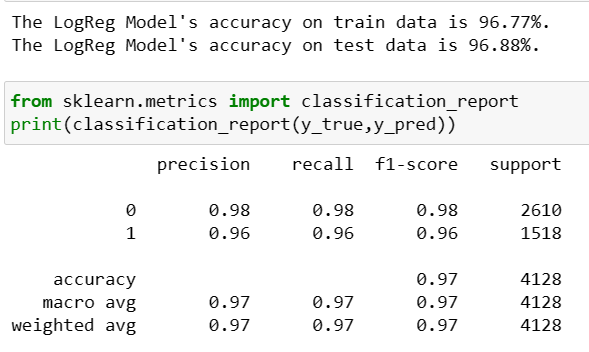

Scaled Logistic Regression:
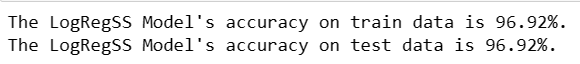

Decision Tree:
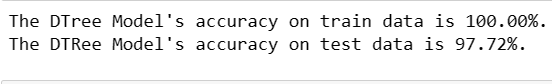

# Step 4: Machine Learning Modelling <a id="part4"></a>

In [104]:
data_model.shape #before

(13759, 15)

In [105]:
X_train.shape, X_test.shape #after

((9631, 30), (4128, 30))

In [106]:
y_train.shape, y_test.shape

((9631,), (4128,))

## Naiive Baseline

In [107]:
y_labels = ['top5_finish']

In [108]:
import numpy as np
from scipy import stats

# pick the modal class from train data
print(stats.mode(y_train))

modal_class_label = stats.mode(y_train)[0]

print(f"The modal class label is {int(modal_class_label)}, \
and the accompanying string value of this label is {y_labels}.")

C:\Users\chery\AppData\Local\Temp\ipykernel_19148\1311901028.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(stats.mode(y_train))


ModeResult(mode=array([0], dtype=int64), count=array([6198]))
The modal class label is 0, and the accompanying string value of this label is ['top5_finish'].


C:\Users\chery\AppData\Local\Temp\ipykernel_19148\1311901028.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  modal_class_label = stats.mode(y_train)[0]


In [109]:
y_train_preds_naive = [int(modal_class_label) for row in X_train.iloc[:,0]]
y_train_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [110]:
y_test_preds_naive = [int(modal_class_label) for row in X_test.iloc[:,0]]
y_test_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [111]:
# scoring accuracy of model
# note that other metrics exist, eg. AUC-ROC, Confusion Matrix-Based Metrics, but these matter more for imbalanced data
# where classes don't share same representation, eg. class 0 is 80%, class 1 is 10%, class 2 is 10%
# and are advanced Machine Learning topics

from sklearn.metrics import accuracy_score

# train accuracy score
y_true = y_train
y_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 64.35%.
The Naive Baseline Model's accuracy on test data is 63.23%.


# Logistic Regression Model

In [112]:
from sklearn.linear_model import LogisticRegression

#logreg = LogisticRegression(solver='liblinear') # you can experiment with different combinations of multi_class and solver
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs') # good option for larger datasets, fails here
logreg.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [113]:
y_train_preds_logreg = logreg.predict(X_train)
y_test_preds_logreg = logreg.predict(X_test)

In [114]:
# train accuracy score
y_true = y_train
y_pred = y_train_preds_logreg

train_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on train data is {train_accuracy_logreg:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_logreg

test_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on test data is {test_accuracy_logreg:.2f}%.")

The LogReg Model's accuracy on train data is 96.77%.
The LogReg Model's accuracy on test data is 96.88%.


In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2610
           1       0.96      0.96      0.96      1518

    accuracy                           0.97      4128
   macro avg       0.97      0.97      0.97      4128
weighted avg       0.97      0.97      0.97      4128



# Scaled Ver of LogReg

In [116]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler() #standardizing
sscaler.fit(X_train)

X_train_sscaled = sscaler.transform(X_train)
X_test_sscaled = sscaler.transform(X_test)

In [117]:
# logreg_ss = LogisticRegression(solver='liblinear') # alternative
logreg_ss = LogisticRegression(multi_class='multinomial', solver='lbfgs') # seems to work here after scaling
logreg_ss.fit(X_train_sscaled, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [118]:
y_train_preds_logreg_ss = logreg_ss.predict(X_train_sscaled)

# insert code here
y_test_preds_logreg_ss = logreg_ss.predict(X_test_sscaled)

In [119]:
# train accuracy score
y_true = y_train
y_pred = y_train_preds_logreg_ss

train_accuracy_logreg_ss = accuracy_score(y_true, y_pred) * 100
print(f"The LogRegSS Model's accuracy on train data is {train_accuracy_logreg_ss:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_logreg_ss

test_accuracy_logreg_ss = accuracy_score(y_true, y_pred) * 100
print(f"The LogRegSS Model's accuracy on test data is {test_accuracy_logreg_ss:.2f}%.")

The LogRegSS Model's accuracy on train data is 96.92%.
The LogRegSS Model's accuracy on test data is 96.92%.


# Decision Tree Model

In [120]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=404)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=404)

In [121]:
y_train_preds_dtree = dtree.predict(X_train)
y_test_preds_dtree = dtree.predict(X_test)

In [122]:
# train accuracy score
y_true = y_train
y_pred = y_train_preds_dtree

train_accuracy_dtree = accuracy_score(y_true, y_pred) * 100
print(f"The DTree Model's accuracy on train data is {train_accuracy_dtree:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_dtree

test_accuracy_dtree = accuracy_score(y_true, y_pred) * 100
print(f"The DTRee Model's accuracy on test data is {test_accuracy_dtree:.2f}%.")

The DTree Model's accuracy on train data is 100.00%.
The DTRee Model's accuracy on test data is 97.72%.


## Findings

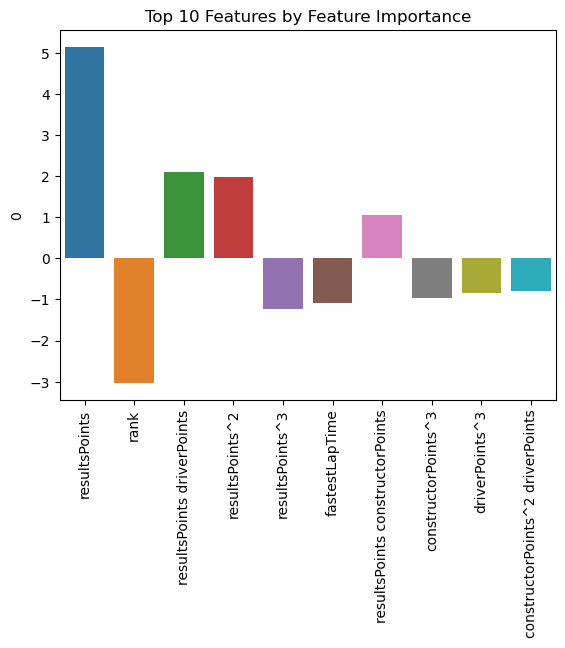

In [123]:
#The constructors are quite rare
coef=pd.DataFrame(logreg.coef_[0], index=X_test.columns)
coef['coef']=abs(coef[0])
temp_df=coef.sort_values(by='coef',ascending=False).head(10)
sns.barplot(x=temp_df.index,y=0,data=temp_df)
plt.title(label='Top 10 Features by Feature Importance')
plt.xticks(rotation=90)
plt.show()

# Report <a id="part5"></a>

### 1. Introduction with Value Based Problem Statement

Formula One, also referred to as Formula 1 or F1, is the highest level of worldwide competition for open-wheel, single-seater formula racing cars. In F1, constructors and drivers work together, and their individual results may or may not affect the result (positions) for them. As it is a worldwide competition, many drivers have sponsors coming to them. This prediction’s audience is therefore aimed towards sponsorships and brands, teams (to be able to strategise and maximise the driver’s chances of entering top 5), upcoming drivers who wish to learn strategies to get to top 5, fans who are involved in betting for the f1 driver who would win, and lastly, for the broadcast and media to have increased discussions and commentary. In conclusion, accurate predictions of drivers who will emerge in the top five positions can have an impact on a variety of components of the Formula 1 environment, including team strategy, fan engagement, potential sponsors, and general company decisions. Therefore, using past data of driver and constructor standings and information, past results, and past races, I am going to explore, clean, prepare and wrangle the datasets to be able to provide an accurate as possible prediction on whether a Formula 1 driver will finish in the top 5 positions in a race based on their performance in previous races and team standings. From this, we would be able to find out which factors potentially affects the positions most. My initial prediction problem was predicting whether the driver will be placed in top three. Even though Top 3 predictions appear to be more helpful for the business, but during my data wrangling procedure, it led to an unbalanced set of data. This indicates that it would introduce bias and could result in subpar performance on the minority class, which is represented by the top 3 positions, leading to an inaccurate prediction. (310 words)

### 2. Problem Formulation
- Load and Explore the Data
- Understand the Data
- Formulate a Prediction Problem

Right off the bat, after some analysis in excel, I’ve noticed the values that were used to represent missing values, and made them represent as NaN values in the data when loading the data in.  
In my exploratory data analysis, I started off by using .info of the datasets that I plan on merging into my final table later. This allowed me to identify the columns, null values (if any), and data types in each dataset. Then, I further analysed them by looking at unique values of some interesting columns. From this, I’ve found out that columns ‘position’ and ‘positionOrder’ has a position 99, which should not be possible. I’ve also noticed that there were some invalid year data such as ‘12005’, and realised from comparing from the url that these invalid years just had an additional ‘1’ in front of the year, and some text data mixed into a column that was supposed to be a numerical column (points). These were the columns that stood out that I had to handle later to ensure clean data. 
The next thing I did was to create charts related to me prediction problem so that I can find out what affects the position. From this, I can see that the higher the driver’s rank, the higher the position and the higher the grid number, the higher your position. Further analysis of factors that may affect the position was done after fixing position 99, so that the chart shows more accurate results. There, I created more scatterplots to show factors like driverAge, fastestLapTime, rank, cosntructorPoints, with positionOrder, to see how each factor affects the position. 
I also created some charts to show me the number of wins for constructors and drivers. I’ve found out that Ferrari, McLaren and Mercedes are the constructors with the highest number of wins, and Lewis Hamilton, Michael Schumacher, and Sebastian Vettel are the drivers with the highest number of wins. 
Part of the reason why this prediction problem was chosen was because I felt that I would have a wider variety of data to work with, which may allow me to demonstrate more of the skills taught from this module (such as time data, date data, etc) (369 words)


### 3. Data Wrangling on multiple tables 
- Extract and Create features from different tables
- Concatenate, Merge or Join the tables

In this step, I decided to fix the invalid years first. I discovered the year value in the date column in the table has a 1 before the actual year after comparing it to the year in the UR, hence I just found the dates with the incorrect year values and replaced them to make it right. I have decided to use 6 tables to merge, races, drivers, driver_standings, results, constructors, and constructor_standings. I had to alter some of the column names prior to merging the columns because some of the names are similar, making it difficult for me to remember what each column represents after the merge. Therefore, renaming the column names would allow greater clarity and understanding of our data. 
Then, I created some new columns. I first created a “driverName” column by concatenating ‘forename’ and ‘surname’ together. Driver name was created so that the number of columns can be reduced. The dataset gets less complicated and easier to work with when there are fewer columns, leading to increased productivity while preparing, analyzing, and modelling data.
Next, I created a “driverAge” column by capturing the elapsed time between 2 variables, which are ‘year’ (of the race) and the driver’s date of birth columns. This column was created as I am interested to know if age would affect the driver’s position as older drivers may have more experience compared to young ones.
Next, I managed to find out what position 99 represents by subsetting my data to a random race and looking at the positions of that race. In raceId 31, there was positions 2-20, and a position 99. Hence, this would indicate to me that position 99 refers to position 1. Therefore, I replaced all the values 99 with 1.
As I have also found out that driverPoints had mixed data (object and numeric), I fixed them by identifying how many objects there are and converted them.
While exploring, I also noticed that the time data that I needed to use had different time format, and I needed to make them consistent so that it is easily understandable. So, I converted time data of fastestLapTime (had mixed format) and finishTime (was in milliseconds) to seconds instead. This way, the numbers would not be too large either. 
After fixing these problems, I created my target column from ‘positionOrder’. The target column would show 1 if the driver were in positions 1 through 5, and 0 if they were past 5. Then, I removed all columns that were not necessary, including all primary keys, dates of birth, resultNumber, etc.; in other words, all the columns that would not be useful to my prediction model.
Before I can move on to handling outliers, there were some rows that I felt was better to drop. In positionText column, there were rows that contain text data which includes: ‘D’- Disqualified, ‘E’ – Excluded, ‘F’ – Failed to qualify, ‘N’ – Not classified, ‘R’ – Retired, or ‘W’ – Withdrew. In the rows that contain these data, some important columns such as positionOrder, finishTime(sec) and more has null values. This means that those rows would not provide much value to my prediction. Additionally, as my prediction requires knowing drivers that are still active and will qualify, I would not need data of drivers who are already retired, disqualified, or any of the categories mentioned. Therefore, I have chosen to drop all rows where its positionText contains ‘D’, ‘E’, ‘F’, ‘N’, ‘R’ or ‘W’. After this, I dropped the column positionText and positionOrder as well, as they are not needed anymore since I have already created my target variable. (599 words)


### 4. Data Cleansing and Transformation
- Missing Value and Outliers
- Categorical Data
- Numerical Data
- Others

The first outlier handling method I used was using Winsorization. Winsorization limits a variable's extreme values to a given percentile to lessen the impact of outliers while preserving the data's overall distribution. I used diagnostic plots so that we could compare the impact of the outlier handling strategy before and after. As 6 out of 11 of the numeric columns that will undergo outlier handling have skewed histograms, I decided to use Winsorization to mitigate biased results. After using Winsorisation compared to not using any outlier handling method, the logistic regression results (X_train) increased from 87.34% to 88.73%. The Scaled Logistic Regression Results also increased from 90.66% to 91.36%. I also tried the trimming method. However, not only did the logistic regression results decrease (87.7%), but I would also be losing data. As I have already lost a chunk of data from removing rows that has the text categories earlier, I do not wish to lose any more data. Even though the Naiive Baseline Model’s accuracy increased greatly, Logistic Regression’s (LogReg) results is more accurate and a better machine model overall. Hence, Winsorization would be used. 
After dealing with outliers, I would proceed to split my data into X_train, X_test, y_train and y_test, with “top5_finish” being the target.
Moving on the imputing missing data, the first method I tried was performing Median Imputation. I would do X_train.isnull().sum() first to check for missing data, the impute it. For this method, LogReg’s results for X_train is 88.73%. Next, I tried replacing missing values by an arbitrary number. In this case, the number that I’ve chosen is -1, as it is a common practice by data scientists, and it would not be mistaken as any of the numerical data. After imputing, LogReg’s accuracy increased to 92.26% for X_train.  Therefore, replacing missing values by -1 would be the method used to impute our missing data. 
For transforming numerical data, the most logical method I thought of was the Yeo-Johnson Transformation. This transformation is popular amongst many data scientists as it can be used for most of the cases (does not have many limitations). Again, I have created diagnostic charts before and after transformation so that we can observe the change. With this transformation, LogReg’s accuracy increased to 94.15%, indicating that it is a good method. 
There were 2 other methods I wanted to try, which were logarithmic and Box Cox transformation. However, as I have replaced missing value to be -1, logarithmic transformation cannot be used due to ValueError, and Box Cox cannot be used as I have data that contain the value 0, which caused a ValueError as well. In the end, Yeo-Johnson’s transformation was used. 
While I was trying to transform my categorical variables with ordered ordinal encoding, I have hit a warning which warns me that NaN values have been introduced to some of my columns. To prevent this from happening, I decided to group rare categories first. When working with categorical variables that have a lot of unique values, addressing unusual categories is a smart feature engineering approach as it may improve your data's quality and your machine learning model's performance. After grouping, I tried Target Mean Encoding first. Here, X_train’s LogReg results became 95.81%, and Scaled Logreg became 96.63%. Then, I tried using Ordered Ordinal Encoding, and X_train’s LogReg results was 94.15%, and Scaled LogReg is 96.72%. In this case, as we would want to pick the method with the best performance, I have chosen Ordered Ordinal Encoding as 96.72% is higher than any of the results in Target Mean Encoding. 
Variable discretization came next. Numerical data with nonlinear relationships should be used for this since discretization will aid to lower noise. Hence, I have used diagnostic plots to study the relationship of each variable, before picking a few to undergo discretization. The first way, equal width discretization, increased X_train’s LogReg accuracy to 96.12%, and X_train’s Scaled LogReg to 96.77%. When tested with equal frequency discretization instead, X_train’s LogReg accuracy reduced to 94.97%, and X_train’s Scaled LogReg to 95.06%. Hence, equal width discretization was used.
Lastly, I performed scaling on my data to transform numeric variables to a consistent scale. With MinMax Scaling, X_train’s LogReg accuracy became 96.75%, and X_train’s Scaled LogReg stayed consistent at 96.77%. When I tried with Robust Scaling, X_train’s LogReg accuracy became 96.73%, and X_train’s Scaled LogReg stayed consistent at 96.77%. Although both results are extremely similar, MinMax Scaling has a higher Decision Tree Accuracy of 97.99%, compared to Robust Scaling with only 97.97%. Therefore, MinMax Scaling is used.
Lastly, I also performed Polynomial Expansion for feature engineering. As I create a heatmap of the correlation of features, I can see which variables have high correlation (1, -1). Hence, I selected the top 3 features with the strongest correlation and performed Polynomial Expansion on them. At the end, I would place the created features into the X_train and X_test data set to pass into the machine models. With polynomial expansion, X_train LogReg increased to 96.77%, Scaled LogReg increased to 96.92%, and Decision Tree went up to 100%. (842 words)




### 5. Machine Learning Model
- Show Count of Rows and Columns
- Build and Evaluate the model against a Naïve Baseline 
Model

Before splitting our data into train and tests, including imputation, transformation, scaling, discretization, and feature engineering, we had 13759 rows and 15 columns. After the split, our X_train has 9631 rows and 30 columns, X_test has 4128 rows and 30 columns, y_train has 9631 rows and 1 column, and y_test has 4128 rows and 1 column. From here, we can see that our columns have increased from 15 to 30, which is 2 times the number of columns we had initially. The creation of more columns came from transforming our categorical variables and polynomial expansion (feature engineering). The number of rows would remain the same. As y_train and y_test consists of the target variable, it was not touched and hence, did not have any changes throughout. 
The machine models I have built for my classification problem are Naiive Baseline Model, Logistic Regression Model, Scaled Version of Logistic Regression Model, and Decision Tree Model. However, throughout the testing, we focused mainly on studying the Logistic Regression Model and sometimes the Scaled Logistic Regression Model because in general, logistic regression may identify patterns and relationships in the data that the naive baseline entirely misses, allowing for more accuracy. This can be seen as the Naiive Baseline accuracy tends to stay the same no matter what I do the the train and test data most of the time. Hence, I did not add Naiive Baseline scores into some of the results as it is not important. Logistic Regression is also preferred over Decision Tree Model as it suits our type of prediction, which is binary.
I also noticed that Scaled Logistic Regression tends to outperform Logistic Regression, indicating that scaling is beneficial for our dataset/modelling. (282 words)


### 6. Summary and Further Improvements
- Summarize your findings
- Explain the possible further improvements 

In summary, we can conclude that resultsPoints, rank, fastestLapTime, constructorPoints, driverPoints are the most important features when predicting whether a driver will emerge as the top 5 positions. This was expected as points (result points, constructor points, driver points), is the factor that determines a position. Rank and fastesLapTime are just other factors that affects position the most. 
For this prediction problem, I have found that for handling outliers, Winsorisation performed better than Trimming. For imputing missing values, replacing missing values by an arbitrary number gave the highest model accuracy. When transforming numerical data, even though I wanted to try more than 1 method, my choices were limited because I used -1 as an arbitrary number, which stopped me from using Logarithmic transformation, and because I have 0 in my data, I was unable to use Box Cox transformation as well. However, since Yeo-Johnson was able to improve the machine modelling scores, I used that. As for transforming categorical variables, I was met with a warning when I tried to transform them immediately. To solve this problem, I grouped the rare categories first, then proceeded on with the transformation. Out of the 2 encoding methods I tried, Ordered Ordinal Encoding was used in the end as it gave better results overall. During discretization, equal width discretization was implemented to reduce noise. I also used MinMax scaling as it can improve the model’s performance by making a consistent scale. Polynomial Expansion was also incorporated for feature engineering and seeing which features have high correlation. 
For possible improvements, I felt that I could have tried to perform more feature engineering and possibly use PCA to show more of what I have learnt so far. Doing these may also improve the performance of the models. I could have also used pipelines for some data transformation steps rather than using one method for all the variables. (282 words)
